# Segunda preentrega - Curso Data Science INGENIAS

## Integrantes

   * Cristina Betancur
   * Melani Caucota
   * Maribel Carrasco
   * Virginia Chirilá

## Dataset elegido

Encuesta Anual de Hogares del año 2019 de la Ciudad Autónoma de Buenos Aires (CABA) realizado por la Dirección General de Estadísticas y Censos.

### Fuente
https://data.buenosaires.gob.ar/dataset/encuesta-anual-hogares/resource/3a45c563-396d-42de-ba93-8a93729e0723

## Objetivo

El objetivo de este trabajo consiste en realizar un análisis exploratorio de los datos del dataset mencionado,  llevar adelante las transformaciones necesarias y la generación de nuevas variables y realizar un análisis predictivo sobre el nivel de ingresos de las personas de CABA, tomando como unidad de estudio a las personas y no a los hogares. En particular, se busca estudiar cómo inciden determinadas variables demográficas y socio-económicas en el nivel de ingresos de las personas tales como aspectos etarios y demográficos (edad, comuna, dominio y lugar de nacimiento), aspectos socio-laborales (estado_ocupacional, categoria ocupacional, calidad de ingresos laborables, calidad_ingresos_no_laborables, calidad de ingresos totales y calidad de ingresos familiars), aspectos educativos (estado educativo, sector educativo, nivel actual, nivel máximo educativo y años de escolaridad) , y de salud (afiliación de salud).


## Librerías

In [1]:
#Importando librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

## Data set

In [2]:
# Importo archivo csv
datos = pd.read_csv("encuesta-anual-hogares-2019.csv", delimiter=',')

In [3]:
# Inspecciono las 5 primeras filas
datos.head(5) 

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,5,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
1,1,1,2,5,Resto de la Ciudad,18,Mujer,Otro no familiar,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,Otra provincia,Solo plan de medicina prepaga por contratación...,No,No corresponde
2,2,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Universitario,Otras escuelas especiales,12,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
3,2,1,2,2,Resto de la Ciudad,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,...,33333,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,17,CABA,Solo prepaga o mutual via OS,Si,2
4,2,1,3,2,Resto de la Ciudad,17,Varon,Otro familiar,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Secundario/medio comun,EGB (1° a 9° año),10,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde


### Dimensiones data set

In [4]:
# Utilizamos el método .shape para obtener las dimensiones del data frame: cantidad de filas y columnas.
datos.shape

(14319, 31)

## Variables

El data frame brinda información sobre la situación socioeconómica de la población de la Ciudad de Buenos Aires, sus hogares y sus viviendas. Contiene variables relacionadas a vivienda y hábitat, hogares (tamaño y composición de los hogares), características demográficas básicas de la población (composición y estructura, situación conyugal, migración), trabajo y empleo (situación de la población en el mercado de trabajo, características ocupacionales), ingresos (laborales y no laborales), educación (asistencia al sistema de educación formal, nivel educativo de la población), salud (tipo de cobertura, consultas al
médico, estado general de salud) y fecundidad.

### Nombre de las variables

In [5]:
#Obtengo nombre de las columnas
datos.columns

Index(['id', 'nhogar', 'miembro', 'comuna', 'dominio', 'edad', 'sexo',
       'parentesco_jefe', 'situacion_conyugal', 'num_miembro_padre',
       'num_miembro_madre', 'estado_ocupacional', 'cat_ocupacional',
       'calidad_ingresos_lab', 'ingreso_total_lab', 'calidad_ingresos_no_lab',
       'ingreso_total_no_lab', 'calidad_ingresos_totales', 'ingresos_totales',
       'calidad_ingresos_familiares', 'ingresos_familiares',
       'ingreso_per_capita_familiar', 'estado_educativo', 'sector_educativo',
       'nivel_actual', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'afiliacion_salud', 'hijos_nacidos_vivos',
       'cantidad_hijos_nac_vivos'],
      dtype='object')

### Descripción de variables

1. **id:** Clave que identifica a la vivienda  
2. **nhogar:** La variable id + nhogar componen la clave que identifica a cada hogar  
3. **miembro:** Variables id + nhogar+ miembro componen la clave que identifica a cada persona  
4. **comuna:** Comuna donde reside la persona encuestada. _Variable categórica nominal con 15 niveles: números de comuna del uno al 15._
5. **dominio:** Variable categórica que indica si la vivienda se ubica en una villa de emergencia. _Variable categórica nominal con dos niveles: 'Resto de la Ciudad' y 'Villas de emergencia'_
6. **edad:**	Edad de la persona encuestada. _Variable cuantitativa discreta._
7. **sexo:**	Sexo de la persona encuestada. _Variable categórica binaria con dos niveles: 'Mujer' y 'Varon'._
8. **parentesco_jefe:** Variable categórica que indica la relación de parentesco entre la persona encuestada y el jefe/a de hogar. _Variable categórica nominal con 9 niveles: 'Jefe', 'Otro no familiar', 'Padre/Madre/Suegro/a','Otro familiar', 'Conyugue o pareja', 'Hijo/a - Hijastro/a', Nieto/a', 'Yerno/nuera' y 'Servicio domestico y sus familiares'._  
9. **situacion_conyugal:** Situación conyugal de la persona encuestada. _Variable categórica nominal con 7 niveles: 'Soltero/a', 'Viudo/a', 'Unido/a', 'No corresponde', 'Separado/a de unión o matrimonio', 'Divorciado/a' y 'Casado/a'._  
10. **num_miembro_padre:**	Número de miembro del hogar (variable miembro) que corresponde al padre del individuo.
11. **num_miembro_madre:**	Número de miembro del hogar (variable miembro) que corresponde a la madre del individuo. 
12. **estado_ocupacional:** Situación ocupacional de la persona encuestada. _Variable categórica nominal con 3 niveles: 'Inactivo', 'Ocupado' y 'Desocupado'._
13. **cat_ocupacional:** Categoría ocupacional de la persona encuestada. _Variable categórica nominal con 5 niveles: 'No corresponde', 'Asalariado', 'Trabajador por cuenta propia', 'Patron/empleador' y 'Trabajador familiar'._
14. **calidad_ingresos_lab:** Calidad de la declaración de ingresos laborales totales. _Variable categórica nominal con 4 niveles: 'No tuvo ingresos', 'Tuvo ingresos y declara monto','No corresponde'y 'Tuvo ingresos pero no declara monto'_
15. **ingreso_total_lab:**	Monto del ingreso total laboral percibido el mes anterior. _Variable cuantitativa continua._
16. **calidad_ingresos_no_lab:** Calidad de la declaración de ingresos no laborales totales. _Variable categórica nominal con 4 niveles: 'Tuvo ingresos y declara monto', 'No tuvo ingresos', 'Tuvo ingresos pero no declara monto' y 'No corresponde'._
17. **ingreso_total_no_lab:**	Monto del ingreso total no laboral percibido el mes anterior. _Variable cuantitativa continua._
18. **calidad_ingresos_totales:**	Calidad de ingresos totales individuales. _Variable categórica nominal con 4 niveles: 'Tuvo ingresos y declara monto', 'No tuvo ingresos','Tuvo ingresos pero no declara monto' y'No corresponde'._ 
19. **ingresos_totales:** Monto del ingreso total individual percibido el mes anterior. _Variable cuantitativa continua._
20. **calidad_ingresos_familiares:**	Calidad de ingresos totales familiares. _Variable categórica nominal con 3 niveles: 'Tuvo ingresos y declara monto','Tuvo ingresos pero no declara monto' y 'No tuvo ingresos'._
21. **ingresos_familiares:** Monto de ingresos totales familiares percibido el mes anterior. _Variable cuantitativa continua._
22. **ingreso_per_capita_familiar:** Monto de ingresos totales familiares percibido el mes anterior. _Variable cuantitativa continua._
23. **estado_educativo:** Asistencia (pasada o presente) o no a algún establecimiento educativo. _Variable categórica nominal con tres niveles: 'Nunca asistio', 'No asiste pero asistió' y 'Asiste'._ 
24. **sector_educativo:** Sector al que pertenece el establecimiento educativo al que asiste. _Variable categórica nominal con 4 niveles: 'Estatal/publico', 'Privado religioso', 'No corresponde' y 'Privado no religioso'._
25. **nivel_actual:** Nivel cursado al momento de la encuesta. _Variable categórica nominal con 14 niveles: 'Universitario', 'No corresponde', 'Secundario/medio comun', 'Terciario/superior no universitario', 'Jardin maternal','Secundario/medio adultos', 'Sala de 4', 'Primario comun', 'Sala de 5', 'Postgrado', 'Sala de 3', 'Primario adultos','Primario especial' y 'Otras escuelas especiales'._
26. **nivel_max_educativo:** Máximo nivel educativo que se cursó. _Variable categórica nominal con 7 niveles: 'Otras escuelas especiales', 'Secundario/medio comun','EGB (1° a 9° año)', 'Primario especial', 'Primario comun', 'Sala de 5' y 'No corresponde'._
27. **años_escolaridad:** Años de escolaridad alcanzados. _Variable cuantitativa discreta._
28. **lugar_nacimiento:** Lugar de nacimiento de la persona encuestada. _Variable categórica nominal con 7 niveles: 'PBA excepto GBA', 'Otra provincia', 'CABA', 'Partido GBA', 'Pais no limitrofe', 'Pais limitrofe' y 'PBA sin especificar'._
29. **afiliacion_salud:** Afiliación de salud de la persona encuestada. _Variable categórica nominal con 5 niveles: 'Solo obra social', 'Solo plan de medicina prepaga por contratación voluntaria', 'Solo prepaga o mutual via OS', 'Solo sistema publico' y 'Otros'._
30. **hijos_nacidos_vivos:** Tiene o tuvo hijos nacidos vivos. _Variable categórica binaria. Dos niveles: 'Si' y 'No'._
31. **cantidad_hijos_nac_vivos:** Cantidad de hijos nacidos vivos. _Variable cuantitativa discreta._

### Tipo de datos de cada columna

In [6]:
# Exploramos los tipos de datos de cada columna
datos.dtypes

id                              int64
nhogar                          int64
miembro                         int64
comuna                          int64
dominio                        object
edad                            int64
sexo                           object
parentesco_jefe                object
situacion_conyugal             object
num_miembro_padre              object
num_miembro_madre              object
estado_ocupacional             object
cat_ocupacional                object
calidad_ingresos_lab           object
ingreso_total_lab               int64
calidad_ingresos_no_lab        object
ingreso_total_no_lab            int64
calidad_ingresos_totales       object
ingresos_totales                int64
calidad_ingresos_familiares    object
ingresos_familiares             int64
ingreso_per_capita_familiar     int64
estado_educativo               object
sector_educativo               object
nivel_actual                   object
nivel_max_educativo            object
años_escolar

## Análisis exploratorio y procesamiento de los datos

El data frame contiene 31 columnas de las cuales 5 corresponden a índices (id, nhogar, miembro,num_miembro_padre y num_miembro_madre), 18 son categóricas y 8 son cuantitativas. 

   


### Cantidad de valores nulos

In [7]:
# Obtengo cantidad de nulos por variable
datos.isnull().sum()

id                                0
nhogar                            0
miembro                           0
comuna                            0
dominio                           0
edad                              0
sexo                              0
parentesco_jefe                   0
situacion_conyugal                1
num_miembro_padre                 0
num_miembro_madre                 0
estado_ocupacional                0
cat_ocupacional                   0
calidad_ingresos_lab              0
ingreso_total_lab                 0
calidad_ingresos_no_lab           0
ingreso_total_no_lab              0
calidad_ingresos_totales          0
ingresos_totales                  0
calidad_ingresos_familiares       0
ingresos_familiares               0
ingreso_per_capita_familiar       0
estado_educativo                  0
sector_educativo                  3
nivel_actual                      0
nivel_max_educativo            1054
años_escolaridad                 62
lugar_nacimiento            

### Exploración de valores nulos presentes


La variable **hijos_nacidos_vivos** contiene la mayor cantidad de valores nulos del data frame, 54% de los registros de la variable son nulos (7784/len(datos)). La información contenida en esta variable es similar a la de la variable **cantidad_hijos_nac_vivos**. Se podría considerar eliminar la variable **hijos_nacidos_vivos** y utilizar **cantidad_hijos_nac_vivos** , que no posee nulos, en los análisis si es necesario.  

In [8]:
datos.head(5)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,5,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
1,1,1,2,5,Resto de la Ciudad,18,Mujer,Otro no familiar,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,Otra provincia,Solo plan de medicina prepaga por contratación...,No,No corresponde
2,2,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Universitario,Otras escuelas especiales,12,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
3,2,1,2,2,Resto de la Ciudad,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,...,33333,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,17,CABA,Solo prepaga o mutual via OS,Si,2
4,2,1,3,2,Resto de la Ciudad,17,Varon,Otro familiar,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Secundario/medio comun,EGB (1° a 9° año),10,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde


# Analisis de hijos nacidos vivos y cantidad de hijos nacidos vivos

In [9]:
datos['hijos_nacidos_vivos'].unique() 

array(['No', nan, 'Si'], dtype=object)

In [10]:
datos['cantidad_hijos_nac_vivos'].unique()

array(['No corresponde', '2', '1', '3', '5', '7', '4', '6', '9', '8',
       '11', '12', '10', '15'], dtype=object)

In [11]:
datos[(datos['hijos_nacidos_vivos'].isnull()) & (datos["cantidad_hijos_nac_vivos"]=='No corresponde')].head(5)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
2,2,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Universitario,Otras escuelas especiales,12,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
4,2,1,3,2,Resto de la Ciudad,17,Varon,Otro familiar,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Secundario/medio comun,EGB (1° a 9° año),10,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
6,3,1,2,10,Resto de la Ciudad,21,Varon,Conyugue o pareja,Unido/a,Padre no vive en el hogar,...,15500,No asiste pero asistió,No corresponde,No corresponde,Primario especial,12,CABA,Solo obra social,NaN,No corresponde
7,3,1,3,10,Resto de la Ciudad,1,Mujer,Hijo/a - Hijastro/a,No corresponde,2,...,15500,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado,CABA,Solo obra social,NaN,No corresponde
14,7,1,1,12,Resto de la Ciudad,19,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,20000,Asiste,Privado no religioso,Universitario,Otras escuelas especiales,12,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde


In [12]:
#Confirmamos que cuando existe un valor nulo en hijos_nacidos_vivos, en la columna cantidad no señala otro valor
#que no sea No correponde
datos[(datos['hijos_nacidos_vivos'].isnull()) & (datos["cantidad_hijos_nac_vivos"]!='No corresponde')].head(5)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos


In [13]:
#Evidencia para aclarar mejor el punto de que cantidad_hijos_nac_vivos muestra la misma informacion que hijos_nacidos_vivos
cant_sinHijos_nulos = len(datos[(datos['hijos_nacidos_vivos'].isnull())])
cant_sinHijos_noCorresponde = len(datos[(datos['hijos_nacidos_vivos'] == 'No')])
cant_hijosNacidos_noCorresponde = len(datos[(datos['cantidad_hijos_nac_vivos'] == 'No corresponde')])
print(f'Cantidad de encuestados sin hijos cuyo valor es nulo {cant_sinHijos_nulos}')
print(f'Cantidad de encuestados sin hijos cuyo valor es No {cant_sinHijos_noCorresponde}')
print(f'sumatoria total de las personas sin hijos {cant_sinHijos_noCorresponde+cant_sinHijos_nulos}')
print(f'Cantidad de valores No Corresponde en la columna Cantidad_hijos_nac_vivos {cant_hijosNacidos_noCorresponde}')

Cantidad de encuestados sin hijos cuyo valor es nulo 7784
Cantidad de encuestados sin hijos cuyo valor es No 2502
sumatoria total de las personas sin hijos 10286
Cantidad de valores No Corresponde en la columna Cantidad_hijos_nac_vivos 10286


In [14]:
datos.groupby('hijos_nacidos_vivos')['cantidad_hijos_nac_vivos'].value_counts()

hijos_nacidos_vivos  cantidad_hijos_nac_vivos
No                   No corresponde              2502
Si                   2                           1633
                     1                           1168
                     3                            765
                     4                            269
                     5                             94
                     6                             48
                     7                             31
                     8                              8
                     9                              6
                     11                             5
                     10                             3
                     12                             2
                     15                             1
Name: count, dtype: int64

In [15]:
# Elimino columna 'hijos_nacidos_vivos'
datos.drop(columns=['hijos_nacidos_vivos'], inplace=True)

En la columna 'hijos_nacidos_vivos' cuando existe un valor nulo o su valor es 'No', se puede ver reflejado la misma informacion en la columna 'cantidad_hijos_nac_vivos' con el valor 'No corresponde'.

# Analisis de nivel max educativo y estado educativo
- Se decide eliminar los valores nulos de la variable nivel educativo alcanzado cuando se encuentra en personas mayores a 5 años, pero antes se visualizó una relacion del valor nulocon que aún no realizó estudios. Esto parece sugerir que esos nulos que se eliminan son personas que no accedieron a educación, al eliminarlos se podría estar eliminando un sector de interes de los datos, más cuando después se quiere relacionar nivel educativo con nivel de ingresos. No obstante se podría justificar con que representa un bajo porcentaje de los datos (mostrar estos porcentajes).

In [16]:
#Averiguamos la cantidad de valores 'nulos' y 'No corresponde' que existen en la columna nivel_max_educativo y nivel_actual
#En personas que tengan 7 años hasta los 100 años, los infantes de 6 años estan cursando Sala de 5 obsevando la columna 'Nivel_actual'.
cant_secundario_no_corresponde= len(datos[(datos["edad"]<=100) & (datos["edad"]>=7) & (datos['nivel_max_educativo']=='No corresponde')])
cant_estado_educativo_asiste= len(datos[(datos["edad"]<=100) & (datos["edad"]>=7) & (datos['estado_educativo']=='Asiste')])
print(f'Cantidad de valores No Corresponde en nivel_max_educativo {cant_secundario_no_corresponde}')
print(f'Cantidad de valores asiste en estado educativo {cant_estado_educativo_asiste}')

cant_nulos_max_educativo = len(datos[(datos['nivel_max_educativo'].isnull()) & (datos["edad"]<=100) & (datos["edad"]>=7)])
cant_nulos_estado_educativo = len(datos[(datos['estado_educativo'].isnull()) & (datos["edad"]<=100) & (datos["edad"]>=7)])
print(f'Cantidad de nulos en nivel max educativo alcanzado {cant_nulos_max_educativo}')
print(f'Cantidad de nulos en estado educativo {cant_nulos_estado_educativo}')

Cantidad de valores No Corresponde en nivel_max_educativo 42
Cantidad de valores asiste en estado educativo 3674
Cantidad de nulos en nivel max educativo alcanzado 48
Cantidad de nulos en estado educativo 0


### Pero ¿A que corresponden los valores No corresponde o nulos en nivel_max_educativo?
Las personas cuyo valor son 'No correponden' o nulos (sin tener en cuenta a los niños de 6 años o menos), son personas que nunca asistio a un nivel educativo, asistio o asistio pero abandono.

In [17]:
columnas_temporales = ['id','nhogar','miembro','comuna','dominio','edad','sexo','estado_educativo','sector_educativo','nivel_actual','nivel_max_educativo','años_escolaridad']
datos_temporales = datos[columnas_temporales].copy()


In [18]:
datos_temporales[(datos_temporales["edad"]<=100) & (datos_temporales["edad"]>=6) & (datos_temporales['nivel_max_educativo'].isnull()) & (datos_temporales['nivel_max_educativo']=='No corresponde')].head(5)
#al observar los valores nulos y obsevando a su vez el estado educativo y nivel actual, se puede ver que asisten
# a clases (muy extraño que sean nulos) aunque no tengan un valor.

,id,nhogar,miembro,comuna,dominio,edad,sexo,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad


In [19]:
datos['nivel_actual'].unique()

array(['Universitario', 'No corresponde', 'Secundario/medio comun',
       'Terciario/superior no universitario', 'Jardin maternal',
       'Secundario/medio adultos', 'Sala de 4', 'Primario comun',
       'Sala de 5', 'Postgrado', 'Sala de 3', 'Primario adultos',
       'Primario especial', 'Otras escuelas especiales'], dtype=object)

In [20]:
edad_min = datos[(datos['nivel_actual']=='Primario adultos')]['edad'].min()
edad_max = datos[(datos['nivel_actual']=='Primario adultos')]['edad'].max()
print(f'En una primaria para adultos asisten de {edad_min} hasta los {edad_max} años')

En una primaria para adultos asisten de 15 hasta los 48 años


In [21]:
datos[(datos["edad"]<=100) & (datos["edad"]>=7) & (datos['nivel_actual']=='Primario adultos')].head(5)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,cantidad_hijos_nac_vivos
707,330,1,1,8,Villas de emergencia,27,Mujer,Jefe,Separado/a de unión o matrimonio,No corresponde,...,15000,5000,Asiste,Estatal/publico,Primario adultos,Sala de 5,Ningun año de escolaridad aprobado,Pais limitrofe,Solo sistema publico,2
2330,1035,1,2,9,Villas de emergencia,32,Mujer,Conyugue o pareja,Casado/a,No corresponde,...,19200,4800,Asiste,Estatal/publico,Primario adultos,Sala de 5,NaN,Pais limitrofe,Solo sistema publico,2
3447,1438,1,1,1,Villas de emergencia,38,Varon,Jefe,Separado/a de unión o matrimonio,No corresponde,...,31700,10567,Asiste,Estatal/publico,Primario adultos,Sala de 5,Ningun año de escolaridad aprobado,Partido GBA,Solo sistema publico,No corresponde
3448,1438,1,2,1,Villas de emergencia,42,Varon,Otro no familiar,Soltero/a,No corresponde,...,31700,10567,Asiste,Estatal/publico,Primario adultos,Sala de 5,2,Otra provincia,Solo sistema publico,No corresponde
3449,1438,1,3,1,Villas de emergencia,33,Varon,Otro no familiar,Soltero/a,No corresponde,...,31700,10567,Asiste,Estatal/publico,Primario adultos,Sala de 5,2,PBA excepto GBA,Solo sistema publico,No corresponde


In [22]:
edad_min = datos[(datos['nivel_actual']=='Primario especial')]['edad'].min()
edad_max = datos[(datos['nivel_actual']=='Primario especial')]['edad'].max()
print(f'En una primaria especial asisten de {edad_min} hasta los {edad_max} años')

En una primaria especial asisten de 8 hasta los 29 años


In [23]:
datos[(datos["edad"]<=100) & (datos["edad"]>=10) & (datos['nivel_actual']=='Primario especial')].head(5)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,cantidad_hijos_nac_vivos
1125,511,1,3,9,Villas de emergencia,11,Varon,Otro familiar,No corresponde,Padre no vive en el hogar,...,10200,2550,Asiste,Estatal/publico,Primario especial,Sala de 5,1,CABA,Solo sistema publico,No corresponde
1754,799,1,2,7,Villas de emergencia,29,Mujer,Conyugue o pareja,Unido/a,No corresponde,...,15000,2500,Asiste,Estatal/publico,Primario especial,Sala de 5,2,Pais limitrofe,Solo sistema publico,4
1799,815,1,5,3,Resto de la Ciudad,10,Mujer,Hijo/a - Hijastro/a,No corresponde,1,...,64000,10667,Asiste,Estatal/publico,Primario especial,Sala de 5,4,CABA,Solo obra social,No corresponde
4126,1668,1,5,1,Villas de emergencia,12,Varon,Hijo/a - Hijastro/a,No corresponde,1,...,35000,5833,Asiste,Privado no religioso,Primario especial,Sala de 5,2,CABA,Solo sistema publico,No corresponde
5220,2007,1,4,1,Villas de emergencia,12,Mujer,Hijo/a - Hijastro/a,No corresponde,5,...,88000,17600,Asiste,Privado no religioso,Primario especial,Sala de 5,6,Pais limitrofe,Solo obra social,No corresponde


In [24]:
edad_min = datos[(datos['nivel_actual']=='Otras escuelas especiales')]['edad'].min()
edad_max = datos[(datos['nivel_actual']=='Otras escuelas especiales')]['edad'].max()
print(f'En otras escuelas especiales asisten de {edad_min} hasta los {edad_max}')

En otras escuelas especiales asisten de 7 hasta los 59


- Otras escuelas especiales: se refieren a instituciones educativos que imparten clases a personas adultas que no pudieron acceder a un nivel educativo en su momento, y estan retomando su educacion. 
- Primario adultos: primaria para adultos
- Primario especial: hay personas de entre 8 e incluso 29 años

In [25]:
datos['estado_educativo'].unique()

array(['Asiste', 'No asiste pero asistió', 'Nunca asistio'], dtype=object)

In [26]:
cant_nunca_asistio = len(datos[(datos["edad"]<=17) & (datos["edad"]>=7) & (datos['estado_educativo']=='Nunca asistio')])
print(f'Cantidad de personas de entre 7 a 17 años que nunca accedieron a la educacion {cant_nunca_asistio}')
cant_nunca_asistio_adultos = len(datos[(datos["edad"]<=100) & (datos["edad"]>=18) & (datos['estado_educativo']=='Nunca asistio')])
print(f'Cantidad de personas mayores a 18 años que nunca accedieron a la educacion {cant_nunca_asistio_adultos}')

Cantidad de personas de entre 7 a 17 años que nunca accedieron a la educacion 2
Cantidad de personas mayores a 18 años que nunca accedieron a la educacion 43


In [27]:
datos[(datos["edad"]<=100) & (datos["edad"]>=7) & (datos['estado_educativo']=='Nunca asistio')].head(5)
#Veamos que valores corresponden en las columnas nivel_max_educativo las personas que nunca asistieron

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,cantidad_hijos_nac_vivos
59,35,1,2,7,Villas de emergencia,42,Mujer,Padre/Madre/Suegro/a,Soltero/a,No corresponde,...,14400,3600,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado,CABA,Solo obra social,2
595,271,1,2,7,Villas de emergencia,69,Mujer,Padre/Madre/Suegro/a,Separado/a de unión o matrimonio,No corresponde,...,9800,3267,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado,Pais limitrofe,Solo sistema publico,7
1052,480,1,1,7,Villas de emergencia,28,Varon,Jefe,Unido/a,No corresponde,...,27000,6750,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado,Pais limitrofe,Solo sistema publico,No corresponde
1075,488,1,2,10,Resto de la Ciudad,27,Varon,Otro familiar,Soltero/a,No corresponde,...,66000,33000,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado,CABA,Solo sistema publico,No corresponde
1800,815,1,6,3,Resto de la Ciudad,84,Mujer,Otro familiar,Viudo/a,No corresponde,...,64000,10667,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado,Otra provincia,Solo obra social,3


In [28]:
cant_no_asiste_pero_asistio = len(datos[(datos["edad"]<=17) & (datos["edad"]>=7) & (datos['estado_educativo']=='No asiste pero asistió') & (datos['nivel_max_educativo']=='No corresponde')])
cant_nulos_no_asiste_pero_asistio = len(datos[(datos["edad"]<=17) & (datos["edad"]>=7) & (datos['estado_educativo']=='No asiste pero asistió') & (datos['nivel_max_educativo'].isnull())])

print(f'Cantidad de personas de entre 7 años a 17 que asistieron pero abandonaron los estudios {cant_no_asiste_pero_asistio + cant_nulos_no_asiste_pero_asistio}')

cant_no_asiste_pero_asistio_adultos = len(datos[(datos["edad"]<=100) & (datos["edad"]>=18) & (datos['estado_educativo']=='No asiste pero asistió')& (datos['nivel_max_educativo']=='No corresponde')])
cant_nulos_no_asiste_pero_asistio_adultos = len(datos[(datos["edad"]<=100) & (datos["edad"]>=18) & (datos['estado_educativo']=='No asiste pero asistió')& (datos['nivel_max_educativo'].isnull())])

print(f'Cantidad total de personas mayores a 18 años que asistieron pero abandonaron los estudios {cant_no_asiste_pero_asistio_adultos + cant_nulos_no_asiste_pero_asistio_adultos}')
#Si quitamos la condicion de No Corresponde, se pueden obsrvar adultos que solo completaron el primario y no cursando un nivel secundario

Cantidad de personas de entre 7 años a 17 que asistieron pero abandonaron los estudios 0
Cantidad total de personas mayores a 18 años que asistieron pero abandonaron los estudios 22


In [29]:
datos[(datos["edad"]<=100) & (datos["edad"]>=7) & (datos['estado_educativo']=='No asiste pero asistió')& (datos['nivel_max_educativo']=='No corresponde')].head(5)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,cantidad_hijos_nac_vivos
7009,2566,1,2,1,Resto de la Ciudad,24,Varon,Hijo/a - Hijastro/a,Soltero/a,Padre no vive en el hogar,...,16300,8150,No asiste pero asistió,No corresponde,No corresponde,No corresponde,NaN,CABA,Solo sistema publico,No corresponde
8210,2948,1,3,9,Villas de emergencia,29,Mujer,Hijo/a - Hijastro/a,Soltero/a,No corresponde,...,28600,9533,No asiste pero asistió,No corresponde,No corresponde,No corresponde,NaN,CABA,Solo sistema publico,No corresponde
8594,3076,1,3,4,Resto de la Ciudad,20,Varon,Hijo/a - Hijastro/a,Soltero/a,1,...,61000,20333,No asiste pero asistió,No corresponde,No corresponde,No corresponde,NaN,CABA,Solo prepaga o mutual via OS,No corresponde
9260,3312,1,4,2,Resto de la Ciudad,22,Varon,Hijo/a - Hijastro/a,Soltero/a,1,...,101900,25475,No asiste pero asistió,No corresponde,No corresponde,No corresponde,NaN,CABA,Solo plan de medicina prepaga por contratación...,No corresponde
9614,3439,1,2,9,Resto de la Ciudad,29,Mujer,Hijo/a - Hijastro/a,Soltero/a,No corresponde,...,41500,10375,No asiste pero asistió,No corresponde,No corresponde,No corresponde,NaN,CABA,Solo obra social,No corresponde


In [30]:
datos[(datos["edad"]<=12) & (datos["edad"]>=6) & (datos['estado_educativo']=='Asiste') & (datos['nivel_max_educativo'].isnull())]#.head(5)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,cantidad_hijos_nac_vivos
356,165,1,3,4,Resto de la Ciudad,6,Mujer,Hijo/a - Hijastro/a,No corresponde,2,...,21500,5375,Asiste,Estatal/publico,Sala de 5,NaN,Ningun año de escolaridad aprobado,Pais no limitrofe,Solo sistema publico,No corresponde
469,216,1,4,1,Villas de emergencia,6,Mujer,Hijo/a - Hijastro/a,No corresponde,2,...,31000,4429,Asiste,Privado religioso,Sala de 5,NaN,Ningun año de escolaridad aprobado,Pais limitrofe,Solo sistema publico,No corresponde
487,221,1,3,3,Resto de la Ciudad,6,Mujer,Hijo/a - Hijastro/a,No corresponde,1,...,45000,15000,Asiste,Estatal/publico,Sala de 5,NaN,Ningun año de escolaridad aprobado,CABA,Solo obra social,No corresponde
591,270,1,3,8,Resto de la Ciudad,6,Varon,Hijo/a - Hijastro/a,No corresponde,Padre no vive en el hogar,...,17500,3500,Asiste,Estatal/publico,Sala de 5,NaN,Ningun año de escolaridad aprobado,CABA,Solo sistema publico,No corresponde
763,349,1,3,3,Resto de la Ciudad,6,Varon,Hijo/a - Hijastro/a,No corresponde,1,...,33000,11000,Asiste,Privado religioso,Sala de 5,NaN,Ningun año de escolaridad aprobado,CABA,Solo obra social,No corresponde
977,437,1,4,1,Resto de la Ciudad,6,Mujer,Hijo/a - Hijastro/a,No corresponde,Padre no vive en el hogar,...,52000,13000,Asiste,Estatal/publico,Sala de 5,NaN,Ningun año de escolaridad aprobado,Partido GBA,Solo sistema publico,No corresponde
1190,534,1,4,8,Villas de emergencia,6,Varon,Hijo/a - Hijastro/a,No corresponde,2,...,17450,4363,Asiste,Estatal/publico,Sala de 5,NaN,Ningun año de escolaridad aprobado,CABA,Solo obra social,No corresponde
1574,707,1,4,9,Resto de la Ciudad,6,Mujer,Hijo/a - Hijastro/a,No corresponde,1,...,52000,13000,Asiste,Privado religioso,Sala de 5,NaN,Ningun año de escolaridad aprobado,CABA,Solo obra social,No corresponde
1822,821,1,4,3,Resto de la Ciudad,6,Mujer,Hijo/a - Hijastro/a,No corresponde,1,...,62000,12400,Asiste,Privado no religioso,Sala de 5,NaN,Ningun año de escolaridad aprobado,CABA,Solo obra social,No corresponde
2278,1021,1,4,6,Resto de la Ciudad,6,Mujer,Hijo/a - Hijastro/a,No corresponde,1,...,25000,5000,Asiste,Estatal/publico,Sala de 5,NaN,Ningun año de escolaridad aprobado,CABA,Solo sistema publico,No corresponde


### Tratamiento de nulos para edades en nivel_max_educativo
A partir de la columna 'nivel_actual' se concluye incorporar a los infantes de 6 años, quienes estan cursando la sala de 5 pero que en la columna 'nivel_max_educativo tienen un valor nulo. 

### Columna Estado_educativo
Es una columna bastante util en relacion al momento de observar el 'nivel_max_educativo' y 'edad', las personas cuyos valores sean nulos o No corresponde en nivel_max_educativo, son las mismas personas cuyo valor es 'Nunca asistio' o 'No asiste pero asistio'. Entonces, son personas que nunca pudieron acceder a los estudios, puede ser relevante para mas adelante cuando se mida el nivel de ingresos en relacion al nivel educativo alcanzado.

In [31]:
datos.groupby('estado_educativo')['nivel_max_educativo'].value_counts()

estado_educativo        nivel_max_educativo      
Asiste                  Otras escuelas especiales    1304
                        Sala de 5                    1251
                        EGB (1° a 9° año)            1015
                        Secundario/medio comun        180
                        No corresponde                 23
No asiste pero asistió  Secundario/medio comun       3492
                        Primario especial            2194
                        EGB (1° a 9° año)            1289
                        Otras escuelas especiales    1266
                        Primario comun                943
                        Sala de 5                     289
                        No corresponde                 19
Name: count, dtype: int64

# Nuevos cambios para hacer
Se puede observar en la columna 'Nivel_max_educativo' en los casos que el valor sea 'No corresponde', a su vez en la columna 'estado educativo' se puede observar que las personas estan asistiendo en ese momento pero no alcanzaron un nivel educativo completo. Por otro lado, el valor 'no asiste pero asistio' señala que la persona asistio pero no llego a finalizar un nivel educativo.

Entonces..
Se puede cambiar el valor de 'No corresponde' por valores mas representativos de acuerdo al estado educativo que presente la persona. // Hay que averiguar como se clasifica el nivel educativo en otras escuelas especiales, donde asisten adultos para completar su nivel de estudio.

Opciones de No corresponde:
- Menores de 7 (1-6): 'Cursando jardin'
- Mayores de 18 que asisten: 'Cursando un nivel educativo'
- Mayores de 18 que asistieron pero abandonaron 'No pudieron completar o finalizar un nivel educativo'
- Mayores de 6 (7 en adelante) que nunca asistieron 'No pudieron acceder a la educacion'

Otra opciones es continuar sin estas personas pero demostrando que representan un porcentaje muy bajo, dicho porcentaje lo saco en el siguiente codigo de abajo: 0.006285355122564425

In [32]:
datos_temporales[(datos_temporales["edad"]>6)  & (datos_temporales['nivel_max_educativo']=='No corresponde') & (datos_temporales['estado_educativo']=='Asiste')]

,id,nhogar,miembro,comuna,dominio,edad,sexo,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad
1544,699,1,3,12,Resto de la Ciudad,7,Varon,Asiste,Privado no religioso,Otras escuelas especiales,No corresponde,NaN
3053,1309,1,3,6,Resto de la Ciudad,10,Varon,Asiste,Privado no religioso,Otras escuelas especiales,No corresponde,NaN
3967,1603,1,4,8,Resto de la Ciudad,17,Varon,Asiste,Estatal/publico,Otras escuelas especiales,No corresponde,NaN
6622,2442,1,6,4,Villas de emergencia,18,Varon,Asiste,Estatal/publico,Otras escuelas especiales,No corresponde,NaN
7314,2664,1,3,7,Villas de emergencia,22,Varon,Asiste,Estatal/publico,Otras escuelas especiales,No corresponde,NaN
7762,2809,1,2,3,Resto de la Ciudad,23,Mujer,Asiste,Estatal/publico,Otras escuelas especiales,No corresponde,NaN
8674,3109,1,3,3,Resto de la Ciudad,20,Mujer,Asiste,Privado religioso,Otras escuelas especiales,No corresponde,NaN
8700,3115,1,6,11,Resto de la Ciudad,10,Mujer,Asiste,Estatal/publico,Otras escuelas especiales,No corresponde,NaN
9007,3221,1,2,4,Resto de la Ciudad,21,Varon,Asiste,Estatal/publico,Otras escuelas especiales,No corresponde,NaN
9360,3343,1,4,7,Villas de emergencia,13,Varon,Asiste,Estatal/publico,Otras escuelas especiales,No corresponde,NaN


In [33]:
datos_temporales[(datos_temporales["edad"]>6)  & (datos_temporales['nivel_max_educativo'].isnull()) & (datos_temporales['estado_educativo']=='Nunca asistio')]

,id,nhogar,miembro,comuna,dominio,edad,sexo,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad
59,35,1,2,7,Villas de emergencia,42,Mujer,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado
595,271,1,2,7,Villas de emergencia,69,Mujer,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado
1052,480,1,1,7,Villas de emergencia,28,Varon,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado
1075,488,1,2,10,Resto de la Ciudad,27,Varon,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado
1800,815,1,6,3,Resto de la Ciudad,84,Mujer,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado
2477,1093,1,1,1,Villas de emergencia,34,Varon,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado
2478,1093,1,2,1,Villas de emergencia,29,Mujer,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado
2520,1111,1,2,13,Resto de la Ciudad,40,Varon,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado
3154,1336,1,2,8,Villas de emergencia,72,Mujer,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado
3533,1462,1,5,8,Resto de la Ciudad,71,Varon,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado


In [34]:
datos_temporales[(datos_temporales["edad"]>6)  & (datos_temporales['nivel_max_educativo'].isnull()) & (datos_temporales['estado_educativo']=='No asiste pero asistió')]

,id,nhogar,miembro,comuna,dominio,edad,sexo,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad
3455,1440,1,2,8,Villas de emergencia,36,Varon,No asiste pero asistió,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado
8379,3012,1,1,4,Resto de la Ciudad,53,Varon,No asiste pero asistió,No corresponde,No corresponde,NaN,NaN
11736,4339,1,3,3,Resto de la Ciudad,31,Mujer,No asiste pero asistió,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado


In [35]:
datos_temporales[(datos_temporales["edad"]>6)  & (datos_temporales['nivel_max_educativo']=='No corresponde') & (datos_temporales['estado_educativo']=='No asiste pero asistió')]

,id,nhogar,miembro,comuna,dominio,edad,sexo,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad
7009,2566,1,2,1,Resto de la Ciudad,24,Varon,No asiste pero asistió,No corresponde,No corresponde,No corresponde,NaN
8210,2948,1,3,9,Villas de emergencia,29,Mujer,No asiste pero asistió,No corresponde,No corresponde,No corresponde,NaN
8594,3076,1,3,4,Resto de la Ciudad,20,Varon,No asiste pero asistió,No corresponde,No corresponde,No corresponde,NaN
9260,3312,1,4,2,Resto de la Ciudad,22,Varon,No asiste pero asistió,No corresponde,No corresponde,No corresponde,NaN
9614,3439,1,2,9,Resto de la Ciudad,29,Mujer,No asiste pero asistió,No corresponde,No corresponde,No corresponde,NaN
9838,3524,1,3,5,Resto de la Ciudad,26,Mujer,No asiste pero asistió,No corresponde,No corresponde,No corresponde,NaN
10332,3724,1,2,4,Resto de la Ciudad,35,Varon,No asiste pero asistió,No corresponde,No corresponde,No corresponde,NaN
10339,3727,1,2,3,Resto de la Ciudad,30,Varon,No asiste pero asistió,No corresponde,No corresponde,No corresponde,NaN
10628,3843,1,2,4,Resto de la Ciudad,25,Mujer,No asiste pero asistió,No corresponde,No corresponde,No corresponde,NaN
11349,4177,1,2,10,Resto de la Ciudad,37,Varon,No asiste pero asistió,No corresponde,No corresponde,No corresponde,NaN


In [36]:
cantidad_personas_sin_valor_max_educativo = len(datos[(datos["edad"]<=100) & (datos["edad"]>6) & (datos['nivel_max_educativo']=='No corresponde')])
cantidad_personas_sin_valor_max_educativo_nulos = len(datos[(datos["edad"]<=100) & (datos["edad"]>6) & (datos['nivel_max_educativo'].isnull())])
total_personas_sin_nivel_max_educativo = cantidad_personas_sin_valor_max_educativo + cantidad_personas_sin_valor_max_educativo_nulos

print(f'cantidad de personas a partir de los 7 cuyo valor es No corresponde o nulo en la columna nivel_max_educativo: {total_personas_sin_nivel_max_educativo + cantidad_personas_sin_valor_max_educativo_nulos}')
#Las personas con 6 años estan cursando sala de 5, hay un niña de 7 que nunca asistio, asi que lo tomo de ahi
total_personas = len(datos['nivel_max_educativo'])
print(f'Total de personas {total_personas}')

print(f'{total_personas_sin_nivel_max_educativo/total_personas}') 

cantidad de personas a partir de los 7 cuyo valor es No corresponde o nulo en la columna nivel_max_educativo: 138
Total de personas 14319
0.006285355122564425


In [37]:
#Se puede observar las personas asisten a clases pero su valor en nivel_max_educativo es 'No corresponde'
datos[(datos["edad"]<=100) & (datos["edad"]>6) & (datos['nivel_max_educativo']=='No corresponde')].head(5)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,cantidad_hijos_nac_vivos
1544,699,1,3,12,Resto de la Ciudad,7,Varon,Hijo/a - Hijastro/a,No corresponde,2,...,47600,15867,Asiste,Privado no religioso,Otras escuelas especiales,No corresponde,NaN,CABA,Solo obra social,No corresponde
3053,1309,1,3,6,Resto de la Ciudad,10,Varon,Hijo/a - Hijastro/a,No corresponde,Padre no vive en el hogar,...,106000,35333,Asiste,Privado no religioso,Otras escuelas especiales,No corresponde,NaN,Partido GBA,Solo obra social,No corresponde
3967,1603,1,4,8,Resto de la Ciudad,17,Varon,Hijo/a - Hijastro/a,Soltero/a,2,...,28500,7125,Asiste,Estatal/publico,Otras escuelas especiales,No corresponde,NaN,CABA,Solo obra social,No corresponde
6622,2442,1,6,4,Villas de emergencia,18,Varon,Hijo/a - Hijastro/a,Soltero/a,Padre no vive en el hogar,...,60000,10000,Asiste,Estatal/publico,Otras escuelas especiales,No corresponde,NaN,PBA excepto GBA,Solo sistema publico,No corresponde
7009,2566,1,2,1,Resto de la Ciudad,24,Varon,Hijo/a - Hijastro/a,Soltero/a,Padre no vive en el hogar,...,16300,8150,No asiste pero asistió,No corresponde,No corresponde,No corresponde,NaN,CABA,Solo sistema publico,No corresponde


In [38]:
datos[(datos["edad"]<=100) & (datos["edad"]>6) & (datos['nivel_max_educativo']=='No corresponde') & (datos['estado_educativo']=='Asiste') ].head(5)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,cantidad_hijos_nac_vivos
1544,699,1,3,12,Resto de la Ciudad,7,Varon,Hijo/a - Hijastro/a,No corresponde,2,...,47600,15867,Asiste,Privado no religioso,Otras escuelas especiales,No corresponde,NaN,CABA,Solo obra social,No corresponde
3053,1309,1,3,6,Resto de la Ciudad,10,Varon,Hijo/a - Hijastro/a,No corresponde,Padre no vive en el hogar,...,106000,35333,Asiste,Privado no religioso,Otras escuelas especiales,No corresponde,NaN,Partido GBA,Solo obra social,No corresponde
3967,1603,1,4,8,Resto de la Ciudad,17,Varon,Hijo/a - Hijastro/a,Soltero/a,2,...,28500,7125,Asiste,Estatal/publico,Otras escuelas especiales,No corresponde,NaN,CABA,Solo obra social,No corresponde
6622,2442,1,6,4,Villas de emergencia,18,Varon,Hijo/a - Hijastro/a,Soltero/a,Padre no vive en el hogar,...,60000,10000,Asiste,Estatal/publico,Otras escuelas especiales,No corresponde,NaN,PBA excepto GBA,Solo sistema publico,No corresponde
7314,2664,1,3,7,Villas de emergencia,22,Varon,Hijo/a - Hijastro/a,Soltero/a,1,...,22000,7333,Asiste,Estatal/publico,Otras escuelas especiales,No corresponde,NaN,Pais limitrofe,Solo sistema publico,No corresponde


In [39]:
datos['años_escolaridad'].unique()

array(['12', '17', '10', '8', 'Ningun año de escolaridad aprobado', '11',
       '9', '13', '7', '16', '14', '15', '5', '6', '2', '19', '4', '1',
       '3', '18', nan], dtype=object)

Hacer un grafico o tabla que justique de manera visual el id 3472, mostrar evidencias y una explicacion textual mas 
desarrollada

In [40]:
datos['nivel_max_educativo'].unique()

array(['Otras escuelas especiales', 'Secundario/medio comun',
       'EGB (1° a 9° año)', 'Primario especial', nan, 'Primario comun',
       'Sala de 5', 'No corresponde'], dtype=object)

En la variable **nivel_max_educativo** los valores nulos estan concentrados en los primeros años de edad. Desde los 0 a los 6 años el número de personas registradas coincide con el número de nulos para cada una de esas edades. Se podría considerar ubicar a los datos para esas edades dentro de una nueva categoría que describa correctamente su situacion por ej: "Todavía no alcanzó ninguno" o utilizar una categoría ya existente como "No corresponde"

In [41]:
# Obtengo la cantidad de valores nulos de la variable nivel_max_educativo por edad y la exploro para los primeros años
count_nulls = datos.groupby('edad')['nivel_max_educativo'].apply(lambda x: x.isnull().sum()) #Calcular el número de nulos por edad
nulls = count_nulls.to_frame() #Convertir serie en data frame
nulls = nulls.reset_index()
nulls = nulls.rename(columns={'nivel_max_educativo': 'nulls_nivel_max_educativo'})
print(nulls.head(10))

   edad  nulls_nivel_max_educativo
0     0                        128
1     1                        148
2     2                        158
3     3                        160
4     4                        177
5     5                        182
6     6                         53
7     7                          1
8     8                          0
9     9                          0


In [42]:
# Obtengo la cantidad deregistros de la variable nivel_max_educativo por edad y la exploro para los primeros años
edades =[0,1,2,3,4,5,6,7,8]
for i in edades:
    numero = (datos['edad'] == i).sum()
    print(i, numero)
    
# Hasta los 5 años los valores nulos coindicen con el numero de personas registradas en ese rango de edades

0 128
1 148
2 158
3 160
4 177
5 182
6 152
7 176
8 176


Text(0.5, 0, 'Edad')

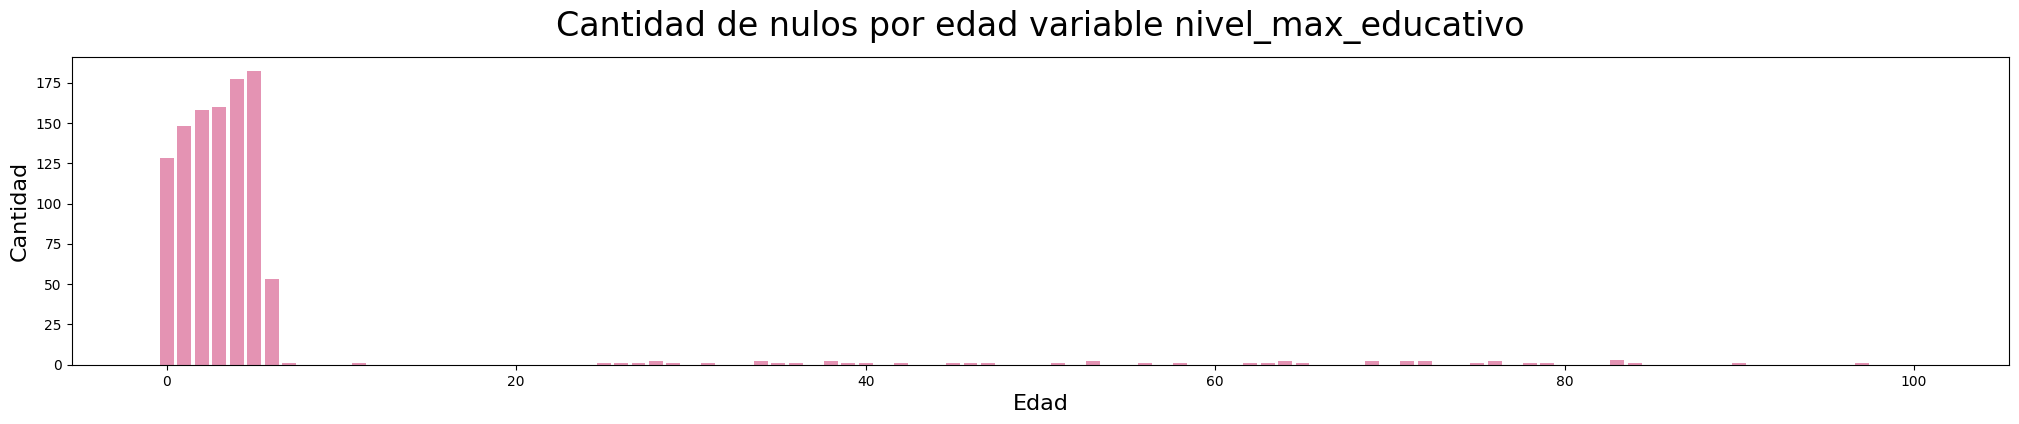

In [43]:
#Gráfico de cantidad de valores nulos por edad
plt.figure(figsize=(25, 4))
plt.bar("edad", "nulls_nivel_max_educativo", data=nulls, color="#E493B3")
plt.title('Cantidad de nulos por edad variable nivel_max_educativo', size=24, pad=15)
plt.ylabel('Cantidad', size=16)
plt.xlabel('Edad', size=16)

### Completando valores nulos en nivel_max_educativo

Entonces decimos crear una nueva categoría llamada "Cursando Jardin" para la variable **nivel_max_educativo** que agrupe a los niños menores de 6 años, considerando su valor en 'Nivel_actual': Jardin maternal, Sala de 3, Sala de 4, Sala de 5

In [44]:
# Creamos una nueva categoría dentro de la variable nivel_max_educativo que contemple a todas las edades cuyo valor es nulo o 'No corresponde'
datos.loc[(datos["edad"]<3) & (datos['estado_educativo']=='Nunca asistio') & (datos['nivel_max_educativo'].isnull()),'nivel_max_educativo'] = 'Proximamente en jardin'
datos.loc[(datos["edad"]<3) & (datos['estado_educativo']=='Nunca asistio') & (datos['nivel_max_educativo']=='No corresponde'),'nivel_max_educativo'] = 'Proximamente en jardin'
datos.loc[(datos["edad"]<6) & (datos["edad"]>2) & (datos['estado_educativo']=='Nunca asistio') & (datos['nivel_max_educativo'].isnull()),'nivel_max_educativo'] = 'Complicaciones para entrar a jardin'
datos.loc[(datos["edad"]<6) & (datos["edad"]>2) & (datos['estado_educativo']=='Nunca asistio') & (datos['nivel_max_educativo']=='No corresponde'),'nivel_max_educativo'] = 'Complicaciones para entrar a jardin'
datos.loc[(datos["edad"]<6) & (datos['estado_educativo']=='No asiste pero asistió') & (datos['nivel_max_educativo']=='No corresponde'),'nivel_max_educativo'] = 'Fue retirado del jardin'
datos.loc[(datos["edad"]<6) & (datos['estado_educativo']=='No asiste pero asistió') & (datos['nivel_max_educativo'].isnull()),'nivel_max_educativo'] = 'Fue retirado del jardin'

datos.loc[(datos["edad"]<7) & (datos['estado_educativo']=='Asiste') & (datos['nivel_max_educativo'].isnull()),'nivel_max_educativo'] = 'Cursando jardin'
datos.loc[(datos["edad"]>6)&(datos['nivel_max_educativo'].isnull()) & (datos['estado_educativo']=='Nunca asistio'),'nivel_max_educativo'] = 'Nunca pudo acceder a una educacion'
datos.loc[(datos["edad"]>6)&(datos['nivel_max_educativo'].isnull()) & (datos['estado_educativo']=='No asiste pero asistió'),'nivel_max_educativo'] = 'No pudo finalizar un nivel educativo'
datos.loc[(datos["edad"]>6)&(datos['nivel_max_educativo']=='No corresponde') & (datos['estado_educativo']=='No asiste pero asistió'),'nivel_max_educativo'] = 'No pudo finalizar un nivel educativo'
datos.loc[(datos["edad"]>6)&(datos['nivel_max_educativo']=='No corresponde') & (datos['estado_educativo']=='Asiste'),'nivel_max_educativo'] = 'Cursando un nivel educativo'

In [45]:
datos[(datos["edad"]<7) & (datos['nivel_max_educativo']=='No corresponde')]
#Observamos que se logro llenar todos los valores nulos o 'No corresponde' de nivel_max_educativo

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,cantidad_hijos_nac_vivos


In [46]:
cant_infantes = len(datos[(datos['nivel_max_educativo']=='Complicaciones para entrar a jardin')])

print(cant_infantes)

35


### Completando valores nulos en años_escolarias
Gracias a la correcta identificacion de No corresponde en la columna nivel_max_educativo, podemos completar los valores faltantes en la columna. Teniendo en cuenta los siguientes casos:
- Cursando un nivel educativo:
- No pudo finalizar un nivel educativo:
- Nunca pudo acceder a una educacion:
- Sala de 5:

En los casos que el nivel_max_educativo sea otro que no este dentro de los mencionados, se descartara este registro por que no se puede atribuir con un numero el año de escolaridad,

pero hay personas cuyo valor max educativo alcanzado es EGB (1° a 9° año), entonces se puede completar el año de escolaridad, comparandolo con otras personas con el mismo nivel max educativo.

### Explorando y analisando la años_escolaridad
Observando en detalle los valores nulos de esta columna, notamos que las personas en su mayoria tienen Sala de 5 como nivel_max_educativo, sin embargo presentan un valor nulo en la siguiente columna. La razon es, no se cuentan los años de jardin como valido.

In [47]:
datos[(datos['años_escolaridad'].isnull()) & (datos['nivel_max_educativo']!='Sala de 5')]


,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,cantidad_hijos_nac_vivos
1544,699,1,3,12,Resto de la Ciudad,7,Varon,Hijo/a - Hijastro/a,No corresponde,2,...,47600,15867,Asiste,Privado no religioso,Otras escuelas especiales,Cursando un nivel educativo,NaN,CABA,Solo obra social,No corresponde
2865,1235,1,1,1,Villas de emergencia,36,Varon,Jefe,Unido/a,No corresponde,...,41600,13867,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),NaN,Pais limitrofe,Solo sistema publico,No corresponde
3053,1309,1,3,6,Resto de la Ciudad,10,Varon,Hijo/a - Hijastro/a,No corresponde,Padre no vive en el hogar,...,106000,35333,Asiste,Privado no religioso,Otras escuelas especiales,Cursando un nivel educativo,NaN,Partido GBA,Solo obra social,No corresponde
3967,1603,1,4,8,Resto de la Ciudad,17,Varon,Hijo/a - Hijastro/a,Soltero/a,2,...,28500,7125,Asiste,Estatal/publico,Otras escuelas especiales,Cursando un nivel educativo,NaN,CABA,Solo obra social,No corresponde
5177,1993,1,7,8,Villas de emergencia,25,Mujer,Otro familiar,Soltero/a,No corresponde,...,14050,2007,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),NaN,CABA,Solo sistema publico,No corresponde
5974,2243,1,8,15,Villas de emergencia,18,Varon,Otro no familiar,Unido/a,Padre no vive en el hogar,...,147100,16344,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),NaN,Otra provincia,Solo obra social,No corresponde
6622,2442,1,6,4,Villas de emergencia,18,Varon,Hijo/a - Hijastro/a,Soltero/a,Padre no vive en el hogar,...,60000,10000,Asiste,Estatal/publico,Otras escuelas especiales,Cursando un nivel educativo,NaN,PBA excepto GBA,Solo sistema publico,No corresponde
7009,2566,1,2,1,Resto de la Ciudad,24,Varon,Hijo/a - Hijastro/a,Soltero/a,Padre no vive en el hogar,...,16300,8150,No asiste pero asistió,No corresponde,No corresponde,No pudo finalizar un nivel educativo,NaN,CABA,Solo sistema publico,No corresponde
7314,2664,1,3,7,Villas de emergencia,22,Varon,Hijo/a - Hijastro/a,Soltero/a,1,...,22000,7333,Asiste,Estatal/publico,Otras escuelas especiales,Cursando un nivel educativo,NaN,Pais limitrofe,Solo sistema publico,No corresponde
7466,2714,1,3,6,Resto de la Ciudad,65,Varon,Conyugue o pareja,Casado/a,No corresponde,...,95000,31667,No asiste pero asistió,No corresponde,No corresponde,Otras escuelas especiales,NaN,Otra provincia,Otros,No corresponde


In [48]:
datos[(datos['edad']> 6) & (datos['nivel_max_educativo']!='Sala de 5') & (datos['estado_educativo']=='Nunca asistio') ]


,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,cantidad_hijos_nac_vivos
59,35,1,2,7,Villas de emergencia,42,Mujer,Padre/Madre/Suegro/a,Soltero/a,No corresponde,...,14400,3600,Nunca asistio,No corresponde,No corresponde,Nunca pudo acceder a una educacion,Ningun año de escolaridad aprobado,CABA,Solo obra social,2
595,271,1,2,7,Villas de emergencia,69,Mujer,Padre/Madre/Suegro/a,Separado/a de unión o matrimonio,No corresponde,...,9800,3267,Nunca asistio,No corresponde,No corresponde,Nunca pudo acceder a una educacion,Ningun año de escolaridad aprobado,Pais limitrofe,Solo sistema publico,7
1052,480,1,1,7,Villas de emergencia,28,Varon,Jefe,Unido/a,No corresponde,...,27000,6750,Nunca asistio,No corresponde,No corresponde,Nunca pudo acceder a una educacion,Ningun año de escolaridad aprobado,Pais limitrofe,Solo sistema publico,No corresponde
1075,488,1,2,10,Resto de la Ciudad,27,Varon,Otro familiar,Soltero/a,No corresponde,...,66000,33000,Nunca asistio,No corresponde,No corresponde,Nunca pudo acceder a una educacion,Ningun año de escolaridad aprobado,CABA,Solo sistema publico,No corresponde
1800,815,1,6,3,Resto de la Ciudad,84,Mujer,Otro familiar,Viudo/a,No corresponde,...,64000,10667,Nunca asistio,No corresponde,No corresponde,Nunca pudo acceder a una educacion,Ningun año de escolaridad aprobado,Otra provincia,Solo obra social,3
2477,1093,1,1,1,Villas de emergencia,34,Varon,Jefe,Casado/a,No corresponde,...,11800,2950,Nunca asistio,No corresponde,No corresponde,Nunca pudo acceder a una educacion,Ningun año de escolaridad aprobado,Pais limitrofe,Solo sistema publico,No corresponde
2478,1093,1,2,1,Villas de emergencia,29,Mujer,Conyugue o pareja,Casado/a,No corresponde,...,11800,2950,Nunca asistio,No corresponde,No corresponde,Nunca pudo acceder a una educacion,Ningun año de escolaridad aprobado,Pais limitrofe,Solo sistema publico,2
2520,1111,1,2,13,Resto de la Ciudad,40,Varon,Conyugue o pareja,Casado/a,No corresponde,...,60000,20000,Nunca asistio,No corresponde,No corresponde,Nunca pudo acceder a una educacion,Ningun año de escolaridad aprobado,Otra provincia,Solo obra social,No corresponde
3154,1336,1,2,8,Villas de emergencia,72,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,...,8000,2000,Nunca asistio,No corresponde,No corresponde,Nunca pudo acceder a una educacion,Ningun año de escolaridad aprobado,Pais limitrofe,Solo sistema publico,7
3533,1462,1,5,8,Resto de la Ciudad,71,Varon,Otro familiar,Soltero/a,No corresponde,...,44000,8800,Nunca asistio,No corresponde,No corresponde,Nunca pudo acceder a una educacion,Ningun año de escolaridad aprobado,Otra provincia,Solo obra social,No corresponde


In [49]:
datos[(datos['años_escolaridad'].isnull()) & (datos['nivel_max_educativo']=='Sala de 5')]
# ¿Se puede completar este valor nulo comparandolo con otras personas que hayan alcanzado el mismo nivel maximo?
#EGB (1° a 9° año)
#Sala de 5	

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,cantidad_hijos_nac_vivos
886,412,1,3,1,Villas de emergencia,8,Varon,Hijo/a - Hijastro/a,No corresponde,2,...,30050,7513,Asiste,Estatal/publico,Primario especial,Sala de 5,NaN,CABA,Solo obra social,No corresponde
2330,1035,1,2,9,Villas de emergencia,32,Mujer,Conyugue o pareja,Casado/a,No corresponde,...,19200,4800,Asiste,Estatal/publico,Primario adultos,Sala de 5,NaN,Pais limitrofe,Solo sistema publico,2
8398,3016,1,2,3,Resto de la Ciudad,9,Mujer,Hijo/a - Hijastro/a,No corresponde,Padre no vive en el hogar,...,15700,7850,Asiste,Privado religioso,Primario especial,Sala de 5,NaN,CABA,Solo obra social,No corresponde
13638,5376,1,1,10,Resto de la Ciudad,80,Mujer,Jefe,Viudo/a,No corresponde,...,62000,15500,No asiste pero asistió,No corresponde,No corresponde,Sala de 5,NaN,Pais no limitrofe,Solo obra social,3
14101,5656,1,1,13,Resto de la Ciudad,87,Varon,Jefe,Viudo/a,No corresponde,...,22500,22500,No asiste pero asistió,No corresponde,No corresponde,Sala de 5,NaN,Pais no limitrofe,Solo obra social,No corresponde


In [50]:
datos[(datos['edad'] < 7)&(datos['nivel_max_educativo']=='Sala de 5')] 


,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,cantidad_hijos_nac_vivos
274,130,1,4,4,Villas de emergencia,6,Mujer,Hijo/a - Hijastro/a,No corresponde,2,...,26500,4417,Asiste,Estatal/publico,Primario comun,Sala de 5,Ningun año de escolaridad aprobado,CABA,Solo obra social,No corresponde
415,191,1,4,4,Resto de la Ciudad,6,Mujer,Hijo/a - Hijastro/a,No corresponde,Padre no vive en el hogar,...,43500,10875,Asiste,Estatal/publico,Primario comun,Sala de 5,Ningun año de escolaridad aprobado,CABA,Solo sistema publico,No corresponde
456,211,1,3,9,Resto de la Ciudad,6,Varon,Hijo/a - Hijastro/a,No corresponde,1,...,36000,9000,Asiste,Estatal/publico,Primario comun,Sala de 5,Ningun año de escolaridad aprobado,CABA,Solo obra social,No corresponde
522,234,1,4,8,Resto de la Ciudad,6,Varon,Hijo/a - Hijastro/a,No corresponde,Padre no vive en el hogar,...,49000,9800,Asiste,Estatal/publico,Primario comun,Sala de 5,Ningun año de escolaridad aprobado,Pais no limitrofe,Solo obra social,No corresponde
543,244,1,3,4,Villas de emergencia,6,Mujer,Hijo/a - Hijastro/a,No corresponde,1,...,10200,3400,Asiste,Estatal/publico,Primario comun,Sala de 5,Ningun año de escolaridad aprobado,CABA,Solo sistema publico,No corresponde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,3584,1,3,13,Resto de la Ciudad,6,Varon,Hijo/a - Hijastro/a,No corresponde,1,...,65000,16250,Asiste,Estatal/publico,Primario comun,Sala de 5,Ningun año de escolaridad aprobado,CABA,Solo prepaga o mutual via OS,No corresponde
10436,3765,1,3,3,Resto de la Ciudad,6,Mujer,Nieto/a,No corresponde,Padre no vive en el hogar,...,54000,18000,Asiste,Estatal/publico,Primario comun,Sala de 5,Ningun año de escolaridad aprobado,CABA,Solo obra social,No corresponde
11664,4306,1,5,12,Resto de la Ciudad,6,Mujer,Nieto/a,No corresponde,Padre no vive en el hogar,...,18900,3150,Asiste,Estatal/publico,Primario comun,Sala de 5,Ningun año de escolaridad aprobado,CABA,Solo obra social,No corresponde
11754,4344,1,6,14,Resto de la Ciudad,6,Mujer,Nieto/a,No corresponde,3,...,574000,95667,Asiste,Privado religioso,Primario comun,Sala de 5,Ningun año de escolaridad aprobado,CABA,Solo obra social,No corresponde


Se observa que los niños de 6 años cuyo nivel max es la Sala de 5, asisten a una primaria comun y su valor en años de escolaridad es Ningun año de escolaridad aprobado, se concluye que estos niños estan asistiendo al primer año de primaria y por ende su valor es 0 pues no completaron su primer año de escolaridad. La segunda conclusion es que años de escolaridad no toma en cuenta los años cursados en el jardin

In [51]:
datos['nivel_max_educativo'].unique()

array(['Otras escuelas especiales', 'Secundario/medio comun',
       'EGB (1° a 9° año)', 'Primario especial', 'Proximamente en jardin',
       'Primario comun', 'Nunca pudo acceder a una educacion',
       'Sala de 5', 'Cursando jardin', 'Fue retirado del jardin',
       'Complicaciones para entrar a jardin',
       'Cursando un nivel educativo',
       'No pudo finalizar un nivel educativo'], dtype=object)

### Analisis de numeros de miembros por padre y madre

In [52]:
datos['num_miembro_padre'].unique()

array(['Padre no vive en el hogar', 'No corresponde', '2', '1', '3', '4',
       '5', '7', '6'], dtype=object)

In [53]:
datos['num_miembro_madre'].unique()

array(['Madre no vive en el hogar', '2', 'No corresponde', '1', '3', '4',
       '5', '7', '6', '9', '15'], dtype=object)

In [54]:
len(datos[(datos['num_miembro_padre']=='Padre no vive en el hogar')])

1781

In [55]:
len(datos[(datos['num_miembro_madre']=='Madre no vive en el hogar')])

678

In [56]:
#Exploramos los valores nulos nuevamente
datos.isnull().sum()

id                              0
nhogar                          0
miembro                         0
comuna                          0
dominio                         0
edad                            0
sexo                            0
parentesco_jefe                 0
situacion_conyugal              1
num_miembro_padre               0
num_miembro_madre               0
estado_ocupacional              0
cat_ocupacional                 0
calidad_ingresos_lab            0
ingreso_total_lab               0
calidad_ingresos_no_lab         0
ingreso_total_no_lab            0
calidad_ingresos_totales        0
ingresos_totales                0
calidad_ingresos_familiares     0
ingresos_familiares             0
ingreso_per_capita_familiar     0
estado_educativo                0
sector_educativo                3
nivel_actual                    0
nivel_max_educativo             0
años_escolaridad               62
lugar_nacimiento                1
afiliacion_salud                4
cantidad_hijos

Hechos los cambios decidimos eliminar los datos faltantes restantes

In [57]:
# Eliminamos los datos faltantes existentes en todo el data frame
datos = datos.dropna()

In [58]:
#Exploramos los valores nulos nuevamente
datos.isnull().sum()

id                             0
nhogar                         0
miembro                        0
comuna                         0
dominio                        0
edad                           0
sexo                           0
parentesco_jefe                0
situacion_conyugal             0
num_miembro_padre              0
num_miembro_madre              0
estado_ocupacional             0
cat_ocupacional                0
calidad_ingresos_lab           0
ingreso_total_lab              0
calidad_ingresos_no_lab        0
ingreso_total_no_lab           0
calidad_ingresos_totales       0
ingresos_totales               0
calidad_ingresos_familiares    0
ingresos_familiares            0
ingreso_per_capita_familiar    0
estado_educativo               0
sector_educativo               0
nivel_actual                   0
nivel_max_educativo            0
años_escolaridad               0
lugar_nacimiento               0
afiliacion_salud               0
cantidad_hijos_nac_vivos       0
dtype: int

### Creación de nuevas variables

El data frame contiene variables de ingresos laborales en pesos argentinos para el año 2019. Consideramos pertinente crear nuevas variables con los valores de ingresos en dólares estadounidenses a fin de poder extrapolar los datos a la actualidad y comparar con valores en otros países.
Utilizamos el valor alcanzado por el dólar al 30 de diciembre de 2019 que fue de $63.35.   

**Las variables a crear serían:**

- ingreso_total_lab_USD (creada a partir de ingreso_total_lab)     
- ingreso_total_no_lab_USD (creada a partir de ingreso_total_no_lab)  
- ingresos_totales_USD (creada a partir de ingresos_totales)                 
- ingresos_familiares_USD  (creada a partir de ingresos_familiares)          
- ingreso_per_capita_familiar_USD (creada a partir de ingreso_per_capita_familiar)  

In [59]:
# Creamos las variables de ingreso en USD
datos['ingreso_total_lab_USD'] = datos['ingreso_total_lab']/63.35
datos['ingreso_total_no_lab_USD'] = datos['ingreso_total_no_lab']/[63.35]
datos['ingresos_totales_USD'] = datos['ingresos_totales']/63.35
datos['ingresos_familiares_USD'] = datos['ingresos_familiares']/63.35
datos['ingreso_per_capita_familiar_USD'] = datos['ingreso_per_capita_familiar']/63.35

### Transformación de tipos de datos 


In [60]:
#Exploramos nuevamente los tipos de datos antes de analizar los estadisticos descriptivos
datos.dtypes

id                                   int64
nhogar                               int64
miembro                              int64
comuna                               int64
dominio                             object
edad                                 int64
sexo                                object
parentesco_jefe                     object
situacion_conyugal                  object
num_miembro_padre                   object
num_miembro_madre                   object
estado_ocupacional                  object
cat_ocupacional                     object
calidad_ingresos_lab                object
ingreso_total_lab                    int64
calidad_ingresos_no_lab             object
ingreso_total_no_lab                 int64
calidad_ingresos_totales            object
ingresos_totales                     int64
calidad_ingresos_familiares         object
ingresos_familiares                  int64
ingreso_per_capita_familiar          int64
estado_educativo                    object
sector_educ

La variable **años_escolaridad** debería tratarse como una variable cuantitativa discreta. Sin embargo, en los datos existen registros con el siguiente string: _'Ningun año de escolaridad aprobado'_, por esto la columna aparece como un tipo de dato object. Se considera reemplazar estos registros por el valor numérico 0.

In [61]:
# Exploramos los valores de la variable
datos['años_escolaridad'].unique() 

array(['12', '17', '10', '8', 'Ningun año de escolaridad aprobado', '11',
       '9', '13', '7', '16', '14', '15', '5', '6', '2', '19', '4', '1',
       '3', '18'], dtype=object)

In [62]:
# Vemos que tipo de dato es la variable
datos['años_escolaridad'].dtype

dtype('O')

In [63]:
# Cambiamos el valor 'Ningun año de escolaridad aprobado' por 0
datos['años_escolaridad'] = datos['años_escolaridad'].replace({'Ningun año de escolaridad aprobado': 0})

In [64]:
#Cambiamos tipo de dato de la columna de objet a int64
datos['años_escolaridad'] = datos['años_escolaridad'].astype('int64')

In [65]:
# Exploramos el tipo de dato nuevamente
datos['años_escolaridad'].dtype

dtype('int64')

La variable **cantidad_hijos_nac_vivos** debería tratarse como una variable cuantitativa discreta. Sin embargo, en los datos existen registros con el siguiente string: _'No corresponde'_, por esto la columna aparece como un tipo de dato object. Se considera reemplazar estos registros por el valor numérico 0.

In [66]:
# Exploramos los valores de la variable
datos['cantidad_hijos_nac_vivos'].unique()

array(['No corresponde', '2', '1', '3', '5', '7', '4', '6', '9', '8',
       '11', '12', '10', '15'], dtype=object)

In [67]:
# Vemos que tipo de dato es la variable
datos['cantidad_hijos_nac_vivos'].dtype

dtype('O')

In [68]:
# # Cambiamos el valor 'No corresponde' por 0
datos['cantidad_hijos_nac_vivos'] = datos['cantidad_hijos_nac_vivos'].replace({'No corresponde': 0})

In [69]:
#Cambiar tipo de dato de la columna de objet a int64
datos['cantidad_hijos_nac_vivos'] = datos['cantidad_hijos_nac_vivos'].astype('int64')

In [70]:
#Exploramos nuevamente los tipos de datos antes de analizar los estadisticos descriptivos
datos['cantidad_hijos_nac_vivos'].dtype 

dtype('int64')

## Descripción estadistica de las variables

In [71]:
#Obtenemos los estadísticos descriptivos de las variables numéricas
datos.describe()

,id,nhogar,miembro,comuna,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ingreso_per_capita_familiar,años_escolaridad,cantidad_hijos_nac_vivos,ingreso_total_lab_USD,ingreso_total_no_lab_USD,ingresos_totales_USD,ingresos_familiares_USD,ingreso_per_capita_familiar_USD
count,14248.000000,14248.000000,14248.000000,14248.000000,14248.000000,14248.000000,14248.000000,14248.000000,14248.000000,14248.000000,14248.000000,14248.000000,14248.000000,14248.000000,14248.000000,14248.000000,14248.000000
mean,2706.893810,1.009686,2.141774,7.626474,38.837100,20161.464907,6025.046533,26186.511440,70309.116859,26236.967294,10.908549,0.631948,318.255168,95.107285,413.362454,1109.851884,414.158915
std,1535.148306,0.126688,1.354165,4.238338,23.109687,34757.459581,16099.398921,37214.988917,62777.115443,27512.064666,5.354033,1.218927,548.657610,254.134158,587.450496,990.956834,434.286735
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1471.000000,1.000000,1.000000,4.000000,20.000000,0.000000,0.000000,0.000000,30000.000000,10500.000000,7.000000,0.000000,0.000000,0.000000,0.000000,473.559590,165.745856
50%,2605.500000,1.000000,2.000000,8.000000,37.000000,3000.000000,0.000000,16000.000000,54400.000000,20000.000000,12.000000,0.000000,47.355959,0.000000,252.565114,858.721389,315.706393
75%,3894.250000,1.000000,3.000000,11.000000,57.000000,30000.000000,4000.000000,37000.000000,90000.000000,33500.000000,15.000000,1.000000,473.559590,63.141279,584.056827,1420.678769,528.808208
max,5795.000000,7.000000,19.000000,15.000000,100.000000,1000000.000000,500000.000000,1000000.000000,1000000.000000,1000000.000000,19.000000,15.000000,15785.319653,7892.659826,15785.319653,15785.319653,15785.319653


Del resumen estadístico podemos destacar:
*  **id:** el valor máximo nos da la cantidad de hogares muestreados: 5795
*  **miembro:** el número mínimo registrado de personas por hogar es 1 y el máximo es 19 
*  **comuna:** el valor máximo nos informa que el muestreo tuvo en cuenta el total de comunas de la Ciudad de Buenos Aires: 15 en total
*  **edad:** la edad promedio de las personas encuestadas fue de aproximadamente 39 años. La edad mínima fue de 0 años y la máxima de 100 años. Los valores de la media y la mediana nos informan que la muestra tuvo una mayor proporción de personas jóvenes(ver histograma) que determinó que los datos estuvieran concentrados hacia la izquierda 
*  **años_escolaridad:** los años de escolaridad promedio de los encuestados fueron de aproximadamente 11 años. El mínimo fue cero y el máximo 19. El 50% de las personas se ubicó por debajo de los 12 años de escolaridad.
*  **cantidad_hijos_nac_vivos:** el promedio de cantidad de hijos nacidos vivos fue de aproximadamente 1. El mínimo fue cero y el máximo 15. El 75% de los registros se encontraron por debajo de 1 (Q3).

**Para observar la distribución de los datos de cada variable mirar los boxplots abajo**

### Datos de personas en edad laboral

Los estadísticos descriptivos para las variables de ingresos incluyen registros de personas en edad no laboral (menores de edad), por lo que gran parte de los ceros en esas variables derivan, no de registros de gente en desempleo, si no más bien de individuos que no alcanzan la mayoría de edad para tener un trabajo. Si observamos las medias de ingresos por edad (tabla abajo) vemos que parece que existen individuos menores de entre los 11 y 17 años que perciben algún tipo de ingreso a pesar de ser menores de edad. 

In [72]:
# Calculamos el salario medio por  grupo etario y exploramos 
mediasalario = datos.groupby('edad')['ingresos_totales_USD'].mean() #Calcular el número de nulos por edad
medsalarios = mediasalario.to_frame() #Convertir serie en data frame
medsalarios = medsalarios.reset_index()
medsalarios = medsalarios.rename(columns={'ingresos_totales_USD': 'media_ingresos_totales_USD'})
medsalarios.head(19)

,edad,media_ingresos_totales_USD
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,4,0.000000
5,5,0.000000
6,6,0.000000
7,7,0.000000
8,8,0.000000
9,9,0.000000


Text(0.5, 0, 'Edad')

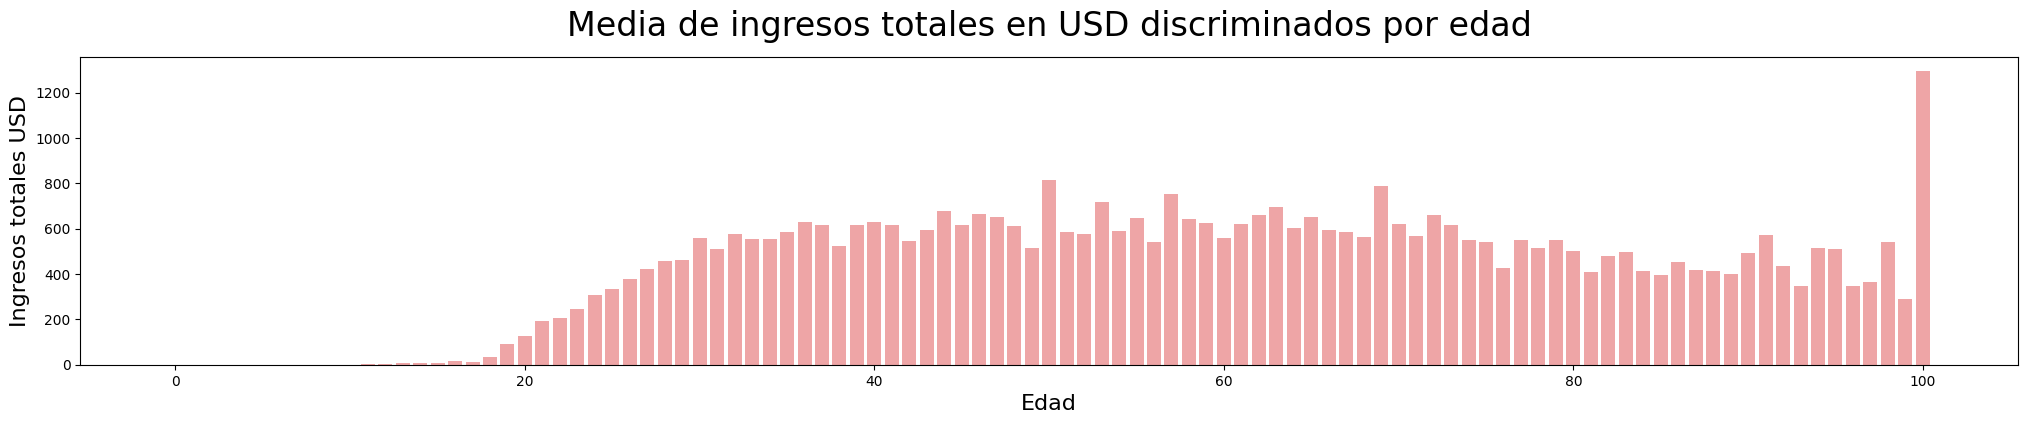

In [73]:
# Graficamos los salarios medios por grupo etario y vemos que los grupos etarios menores a 18 años poseen salarios igual a cero o
# muy bajos
plt.figure(figsize=(25, 4))
plt.bar("edad", "media_ingresos_totales_USD", data=medsalarios, color="#EEA5A6")
plt.title('Media de ingresos totales en USD discriminados por edad', size=24, pad=15)
plt.ylabel('Ingresos totales USD', size=16)
plt.xlabel('Edad', size=16)

Para evitar una subestimación de las medias de las variables de ingresos. Estimamos los estadísticos teniendo en cuenta sólo los individuos en edad laboral (>=18) 

In [74]:
 # Creamos un nuevo data frame con los datos solo de individuos en edad laboral
datoslab = datos[(datos['edad']>=18)]
datoslab.describe()

,id,nhogar,miembro,comuna,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ingreso_per_capita_familiar,años_escolaridad,cantidad_hijos_nac_vivos,ingreso_total_lab_USD,ingreso_total_no_lab_USD,ingresos_totales_USD,ingresos_familiares_USD,ingreso_per_capita_familiar_USD
count,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000
mean,2902.027758,1.009193,1.700107,7.696358,47.012406,25628.012496,7621.154320,33249.166815,71468.649054,28896.822385,12.938772,0.803285,404.546369,120.302357,524.848726,1128.155470,456.145578
std,1584.258247,0.130931,0.943478,4.285606,18.957615,37367.694983,17816.704225,39082.008455,62906.626195,29294.988633,3.703363,1.323523,589.861010,281.242371,616.921996,993.001203,462.430760
min,1.000000,1.000000,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1612.000000,1.000000,1.000000,4.000000,31.000000,0.000000,0.000000,12000.000000,31700.000000,12250.000000,12.000000,0.000000,0.000000,0.000000,189.423836,500.394633,193.370166
50%,2937.500000,1.000000,1.000000,8.000000,44.000000,16000.000000,0.000000,25000.000000,55800.000000,22000.000000,13.000000,0.000000,252.565114,0.000000,394.632991,880.820837,347.277032
75%,4180.000000,1.000000,2.000000,11.000000,62.000000,38000.000000,11000.000000,44000.000000,90000.000000,36362.250000,16.000000,2.000000,599.842147,173.638516,694.554065,1420.678769,573.989740
max,5795.000000,7.000000,15.000000,15.000000,100.000000,1000000.000000,500000.000000,1000000.000000,1000000.000000,1000000.000000,19.000000,15.000000,15785.319653,7892.659826,15785.319653,15785.319653,15785.319653


Del resumen estadístico para los datos de mayores de 18 años podemos destacar: 
*  **edad:** la edad promedio de las personas mayores de edad fue de aproximadamente 47 años. La edad mínima fue de 18 años y la máxima de 100 años. El 50% de las personas se ubicó por debajo de los 44 años de edad.
*  **ingreso_total_lab_USD:** el ingreso en blanco promedio por individuo en edad laboral fue de 403 USD, el 50 % de las personas tuvo un sueldo menor a 253 USD (mediana). El ingreso máximo registrado fue de 15785 USD.
*  **ingreso_total_no_lab_USD:** el ingreso en negro promedio por individuo en edad laboral fue de 120 USD, el 50 % de las personas tuvo sueldos iguales a 0 USD (mediana). El ingreso en negro máximo registrado fue de 7893 USD.
*  **ingresos_totales_USD:** el ingreso total promedio por individuo en edad laboral fue de 522 USD, el 50 % de las personas tuvo sueldos menores a 395 USD (mediana). El ingreso total máximo registrado fue de 15785 USD.
*  **ingresos_familiares_USD:** el ingreso total promedio por familia fue de 1127 USD, el 50 % de los registros tuvo ingresos menores a 876 USD (mediana). El ingreso familiar máximo registrado fue de 15785 USD.
*  **ingreso_per_capita_familiar_USD:** el ingreso total percibido por persona en una familia fue de 455 USD, el 50 % de los registros tuvo ingresos menores a 344 USD (mediana). El ingreso per cápita máximo registrado fue de 15785 USD.

**Para observar la distribución de los datos de cada variable mirar los boxplots abajo**

## Outliers

En el data set tenemos un valor atípico en las variables de ingreso que corresponde a un hogar compuesto por un sólo miembro (id = 3472). Decidimos eliminarlo. 

In [75]:
#Eliminamos el registro con el valor atípico
datos = datos[datos['id'] != 3472]

In [76]:
#Volvemos a filtrar los datos para mayores de edad
datoslab = datos[(datos['edad']>=18)]

In [99]:
datoslab['parentesco_jefe'].unique()


array(['Jefe', 'Otro no familiar', 'Padre/Madre/Suegro/a',
       'Conyugue o pareja', 'Otro familiar', 'Hijo/a - Hijastro/a',
       'Yerno/nuera', 'Servicio domestico y sus familiares', 'Nieto/a'],
      dtype=object)

In [101]:
#Filtramos dos bases de datos de acuerdo al sexo
datoslab_fem = datos[(datos['edad']>=18)& (datos['sexo']=='Mujer')]
datoslab_masc = datos[(datos['edad']>=18)&(datos['sexo']=='Varon')]

datoslab_fem_jefa = datos[(datos['edad']>=18)& (datos['sexo']=='Mujer') & (datos['parentesco_jefe']=='Jefe') ]
datoslab_masc_jefe = datos[(datos['edad']>=18)&(datos['sexo']=='Varon') & (datos['parentesco_jefe']=='Jefe')]

### Gráficos

#### Variables demográficas y educativas (Todos los datos)

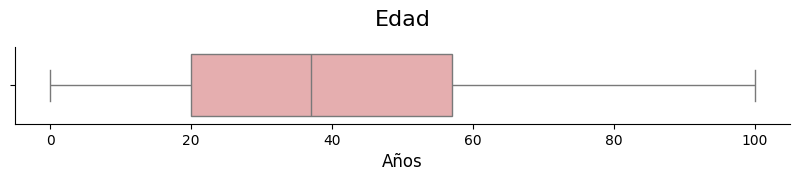

<Figure size 640x480 with 0 Axes>

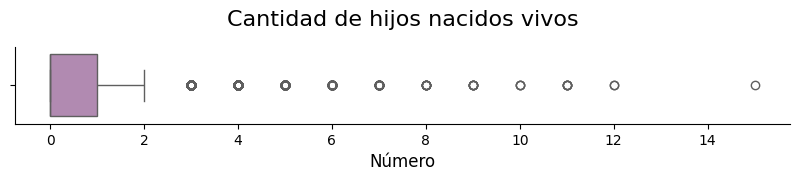

<Figure size 640x480 with 0 Axes>

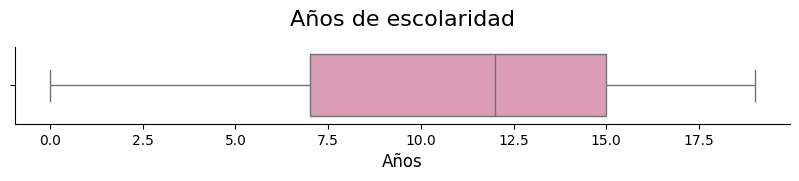

<Figure size 640x480 with 0 Axes>

In [102]:
plt.figure(figsize=(10, 1)) # tamaño de figura

# Subgráfico 1
sns.boxplot(x="edad", data=datos, color="#EEA5A6")
plt.title('Edad', size=16, pad=15)
plt.xlabel('Años', size=12)
plt.ylabel('', size=12)
sns.despine()
plt.show()
sns.despine()

plt.figure(figsize=(10, 1)) 
# Subgráfico 2
sns.boxplot(x="cantidad_hijos_nac_vivos", data=datos, color="#B784B7")
plt.title('Cantidad de hijos nacidos vivos', size=16, pad=15)
plt.xlabel('Número', size=12)
plt.ylabel('', size=12)
sns.despine()
plt.show()
sns.despine()

plt.figure(figsize=(10, 1)) 
# Subgráfico 3
sns.boxplot(x="años_escolaridad", data=datos,color="#E493B3")
plt.title('Años de escolaridad', size=16, pad=15)
plt.xlabel('Años', size=12)
plt.ylabel('', size=12)
plt
sns.despine()
plt.show()
sns.despine()

plt.tight_layout()  #  ajustar automáticamente el diseño de los subgráficos para evitar solapamientos
plt.show()

#### Variables económicas (Datos mayores de edad)

In [103]:
mediatotales= round(datoslab['ingresos_totales_USD'].mean(),2)
mediatotaleslab= round(datoslab['ingreso_total_lab_USD'].mean(),2)
mediatotalesnolab= round(datoslab['ingreso_total_no_lab_USD'].mean(),2)
mediatotalesfam= round(datoslab['ingresos_familiares_USD'].mean(),2)
mediatotalespercap= round(datoslab['ingreso_per_capita_familiar_USD'].mean(),2)

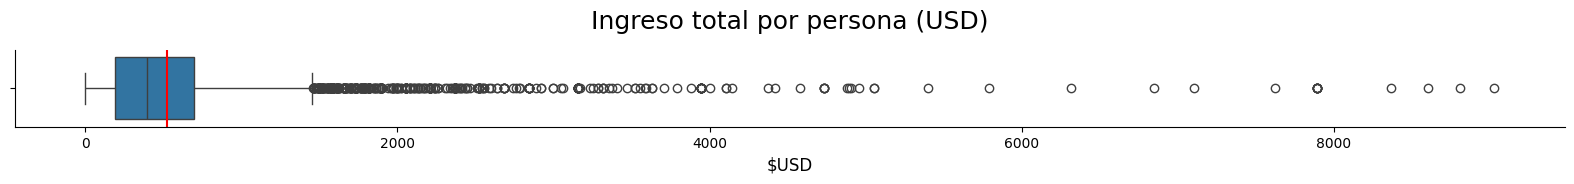

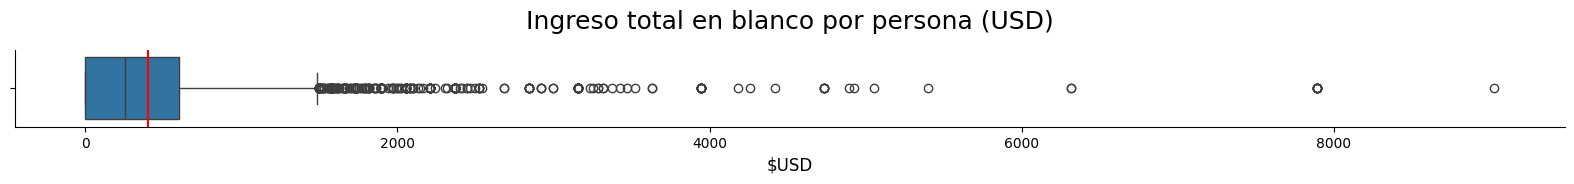

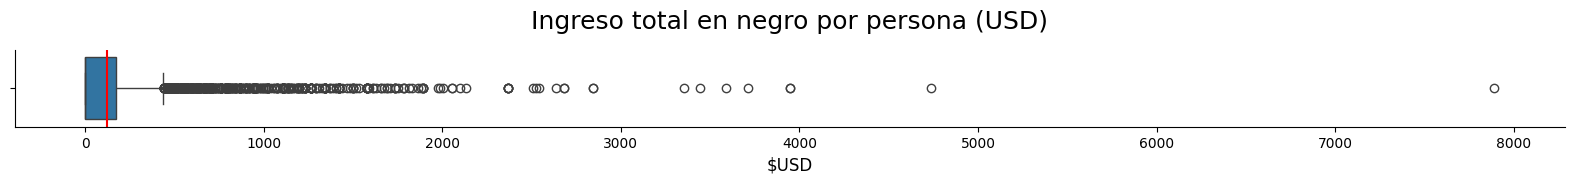

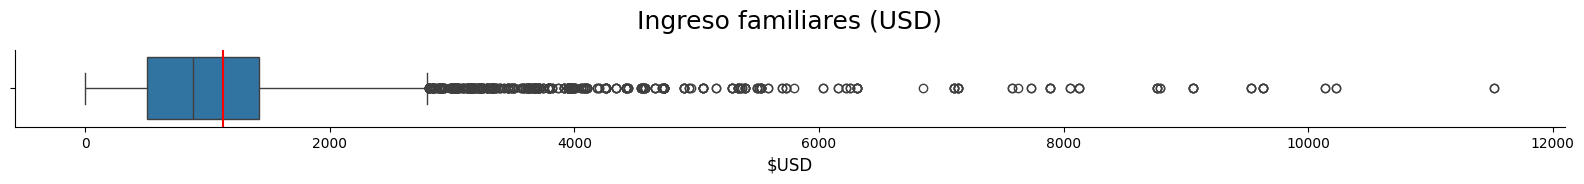

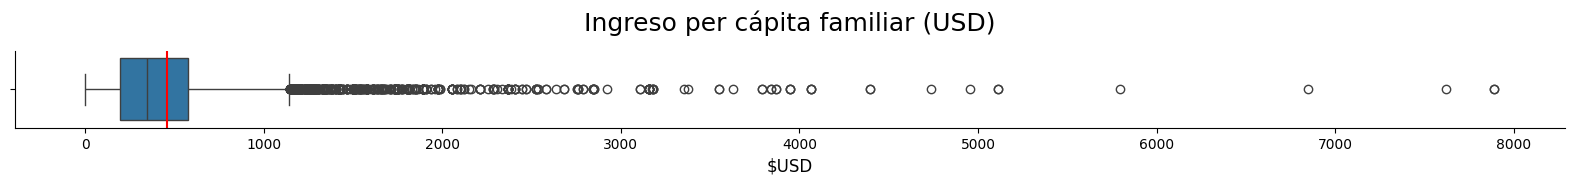

<Figure size 640x480 with 0 Axes>

In [104]:

plt.figure(figsize=(20, 1)) # tamaño de figura

# Subgráfico 1
totales = sns.boxplot(x="ingresos_totales_USD", data=datoslab)
plt.title('Ingreso total por persona (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
totales.axvline(x = mediatotales, color="red")
sns.despine()
plt.show()

plt.figure(figsize=(20, 1)) 
# Subgráfico 2
lab = sns.boxplot(x="ingreso_total_lab_USD", data=datoslab)
plt.title('Ingreso total en blanco por persona (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
lab.axvline(x = mediatotaleslab, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(20, 1)) 
# Subgráfico 3
nolab=sns.boxplot(x="ingreso_total_no_lab_USD", data=datoslab)
plt.title('Ingreso total en negro por persona (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
nolab.axvline(x = mediatotalesnolab, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(20, 1)) 
# Subgráfico 4
fam=sns.boxplot(x="ingresos_familiares_USD", data=datoslab)
plt.title('Ingreso familiares (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
fam.axvline(x = mediatotalesfam, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(20, 1))
# Subgráfico 5
percap=sns.boxplot(x="ingreso_per_capita_familiar_USD", data=datoslab)
plt.title('Ingreso per cápita familiar (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
percap.axvline(x = mediatotalespercap, color="red")
sns.despine()
plt.show()


plt.tight_layout()  #  ajustar automáticamente el diseño de los subgráficos para evitar solapamientos
plt.show()


Línea roja vertical es la media de cada variable
A partir de los gráficos de caja podemos deducir que todas las variables de ingresos presentan una asimetría marcada hacia la derecha. Es decir que la mayoría de los datos se concentran en valores bajos de ingresos.

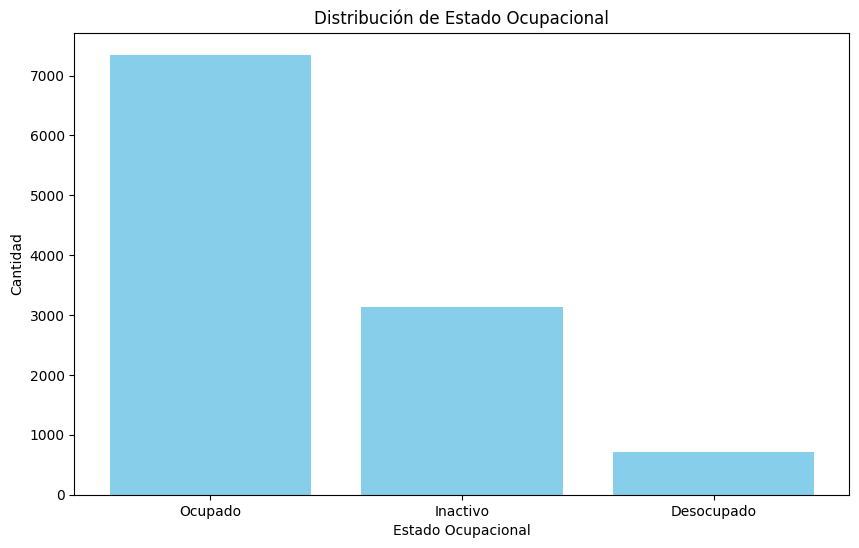

In [105]:
conteo = datoslab['estado_ocupacional'].value_counts()
valores = conteo.values
etiquetas = conteo.index

plt.figure(figsize=(10, 6))  # Tamaño opcional del gráfico
plt.bar(etiquetas, valores, color='skyblue')
plt.title('Distribución de Estado Ocupacional')
plt.xlabel('Estado Ocupacional')
plt.ylabel('Cantidad')

plt.show()

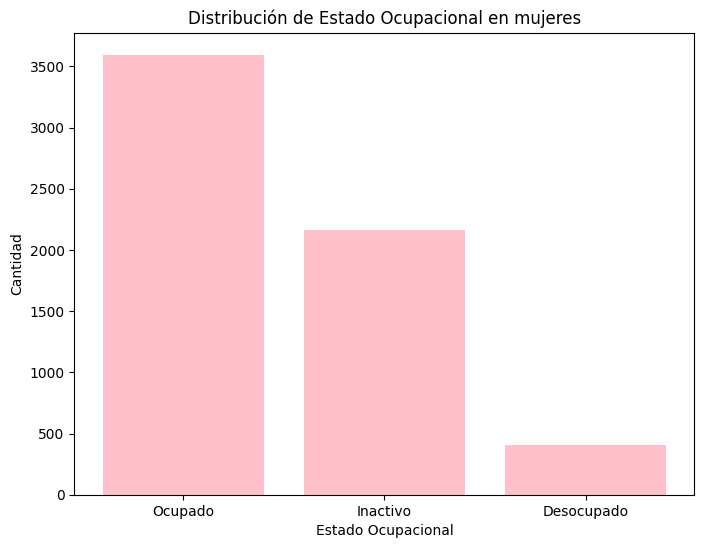

In [106]:
conteo = datoslab_fem['estado_ocupacional'].value_counts()
valores = conteo.values
etiquetas = conteo.index

plt.figure(figsize=(8, 6))  # Tamaño opcional del gráfico
plt.bar(etiquetas, valores, color='pink')
plt.title('Distribución de Estado Ocupacional en mujeres')
plt.xlabel('Estado Ocupacional')
plt.ylabel('Cantidad')

plt.show()

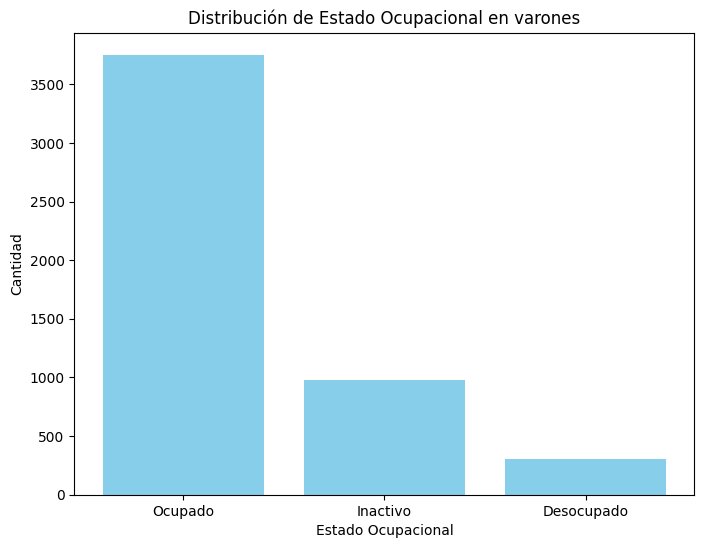

In [107]:
conteo = datoslab_masc['estado_ocupacional'].value_counts()
valores = conteo.values
etiquetas = conteo.index

plt.figure(figsize=(8, 6))  # Tamaño opcional del gráfico
plt.bar(etiquetas, valores, color='skyblue')
plt.title('Distribución de Estado Ocupacional en varones')
plt.xlabel('Estado Ocupacional')
plt.ylabel('Cantidad')

plt.show()

Text(23.616902777777767, 0.5, 'Cantidad')

<Figure size 800x600 with 0 Axes>

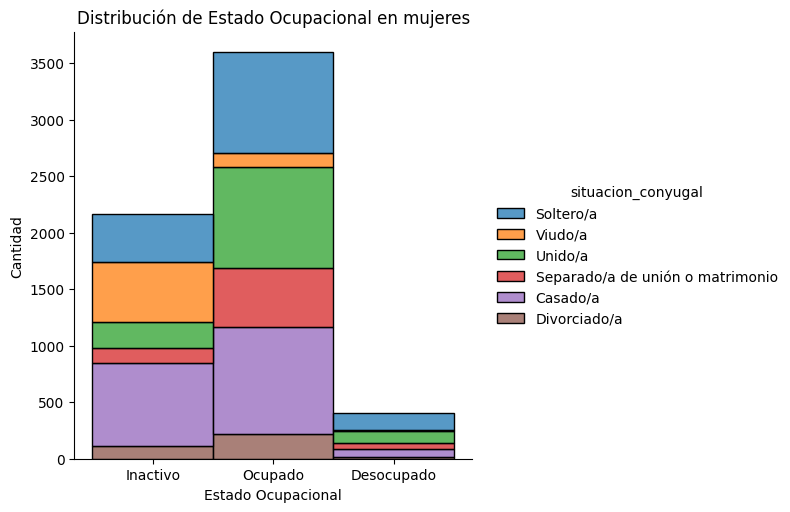

In [108]:
plt.figure(figsize=(8, 6))  # Tamaño opcional del gráfico
sns.displot( data=datoslab_fem, x='estado_ocupacional', hue="situacion_conyugal", multiple="stack", color='skyblue')
plt.title('Distribución de Estado Ocupacional en mujeres')
plt.xlabel('Estado Ocupacional')
plt.ylabel('Cantidad')

Text(23.616902777777767, 0.5, 'Cantidad')

<Figure size 800x600 with 0 Axes>

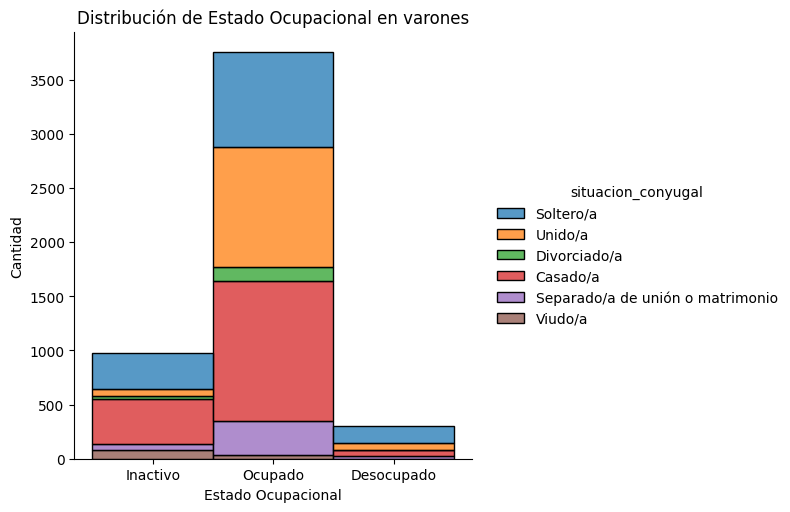

In [109]:
plt.figure(figsize=(8, 6))  # Tamaño opcional del gráfico
sns.displot( data=datoslab_masc, x='estado_ocupacional', hue="situacion_conyugal", multiple="stack", color='skyblue')
plt.title('Distribución de Estado Ocupacional en varones')
plt.xlabel('Estado Ocupacional')
plt.ylabel('Cantidad')


Text(19.90248611111111, 0.5, 'Cantidad')

<Figure size 800x600 with 0 Axes>

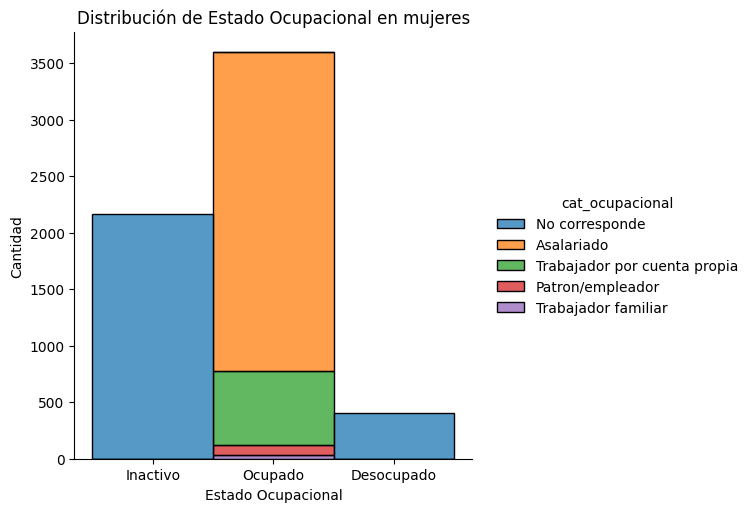

In [110]:
plt.figure(figsize=(8, 6))  # Tamaño opcional del gráfico
sns.displot( data=datoslab_fem, x='estado_ocupacional', hue="cat_ocupacional", multiple="stack", color='skyblue')
plt.title('Distribución de Estado Ocupacional en mujeres')
plt.xlabel('Estado Ocupacional')
plt.ylabel('Cantidad')


Text(19.90248611111111, 0.5, 'Cantidad')

<Figure size 800x600 with 0 Axes>

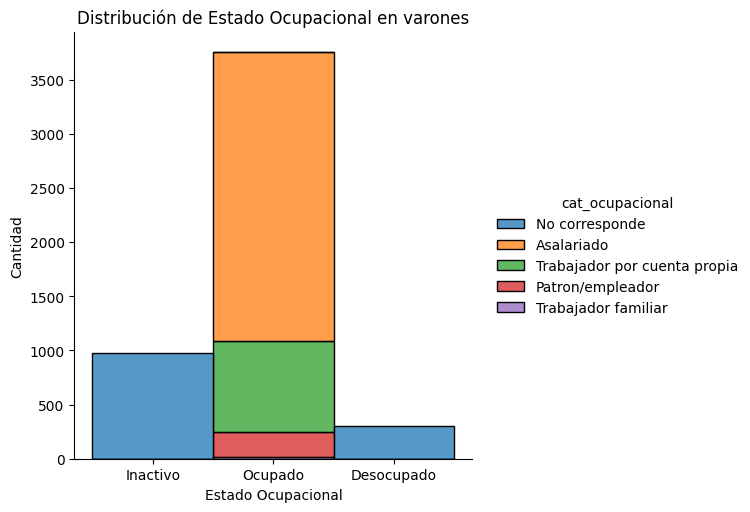

In [111]:
plt.figure(figsize=(8, 6))  # Tamaño opcional del gráfico
sns.displot( data=datoslab_masc, x='estado_ocupacional', hue="cat_ocupacional", multiple="stack", color='skyblue')
plt.title('Distribución de Estado Ocupacional en varones')
plt.xlabel('Estado Ocupacional')
plt.ylabel('Cantidad')


In [112]:
conteo = datoslab_masc.groupby('estado_ocupacional')['situacion_conyugal'].value_counts()
valores = conteo.values
etiquetas = conteo.index

print(conteo)

estado_ocupacional  situacion_conyugal              
Desocupado          Soltero/a                            157
                    Unido/a                               63
                    Casado/a                              54
                    Separado/a de unión o matrimonio      25
                    Divorciado/a                           5
Inactivo            Casado/a                             410
                    Soltero/a                            335
                    Viudo/a                               85
                    Unido/a                               66
                    Separado/a de unión o matrimonio      54
                    Divorciado/a                          30
Ocupado             Casado/a                            1294
                    Unido/a                             1111
                    Soltero/a                            871
                    Separado/a de unión o matrimonio     312
                    Divorciado/a

In [113]:
cant_inactivo = len(datos[(datos['edad']>= 18) & (datos['estado_ocupacional'] == 'Inactivo') ])
cant_ocupado = len(datos[(datos['edad']>= 18) & (datos['estado_ocupacional'] == 'Ocupado') ])
cant_desocupado = len(datos[(datos['edad']>= 18) & (datos['estado_ocupacional'] == 'Desocupado') ])

cant_inactivo_fem = len(datos[(datos['edad']>= 18) & (datos['estado_ocupacional'] == 'Inactivo') & (datos['sexo'] == 'Mujer')])
cant_ocupado_fem = len(datos[(datos['edad']>= 18) & (datos['estado_ocupacional'] == 'Ocupado') & (datos['sexo'] == 'Mujer') ])
cant_desocupado_fem = len(datos[(datos['edad']>= 18) & (datos['estado_ocupacional'] == 'Desocupado') & (datos['sexo'] == 'Mujer') ])

cant_inactivo_masc = len(datos[(datos['edad']>= 18) & (datos['estado_ocupacional'] == 'Inactivo') & (datos['sexo'] == 'Varon') ])
cant_ocupado_masc = len(datos[(datos['edad']>= 18) & (datos['estado_ocupacional'] == 'Ocupado') & (datos['sexo'] == 'Varon')])
cant_desocupado_masc = len(datos[(datos['edad']>= 18) & (datos['estado_ocupacional'] == 'Desocupado') & (datos['sexo'] == 'Varon')])

print(f'Cantidad total de personas cuyo estado ocupacional es inactivo: {cant_inactivo}')
print(f'Cantidad total de personas cuyo estado ocupacional es ocupado: {cant_ocupado}')
print(f'Cantidad total de personas cuyo estado ocupacional es desocupado: {cant_desocupado}')
print()
print('Mujeres')
print(f'Cantidad total de mujeres cuyo estado ocupacional es inactivo: {cant_inactivo_fem}')
print(f'Cantidad total de mujeres cuyo estado ocupacional es ocupado: {cant_ocupado_fem}')
print(f'Cantidad total de mujeres cuyo estado ocupacional es desocupado: {cant_desocupado_fem}')
print()
print('Varones')
print(f'Cantidad total de varones cuyo estado ocupacional es inactivo: {cant_inactivo_masc}')
print(f'Cantidad total de varones cuyo estado ocupacional es ocupado: {cant_ocupado_masc}')
print(f'Cantidad total de varones cuyo estado ocupacional es desocupado: {cant_desocupado_masc}')

Cantidad total de personas cuyo estado ocupacional es inactivo: 3142
Cantidad total de personas cuyo estado ocupacional es ocupado: 7348
Cantidad total de personas cuyo estado ocupacional es desocupado: 713

Mujeres
Cantidad total de mujeres cuyo estado ocupacional es inactivo: 2162
Cantidad total de mujeres cuyo estado ocupacional es ocupado: 3595
Cantidad total de mujeres cuyo estado ocupacional es desocupado: 409

Varones
Cantidad total de varones cuyo estado ocupacional es inactivo: 980
Cantidad total de varones cuyo estado ocupacional es ocupado: 3753
Cantidad total de varones cuyo estado ocupacional es desocupado: 304


#### Ingresos totales por sexo (datos mayores de edad)

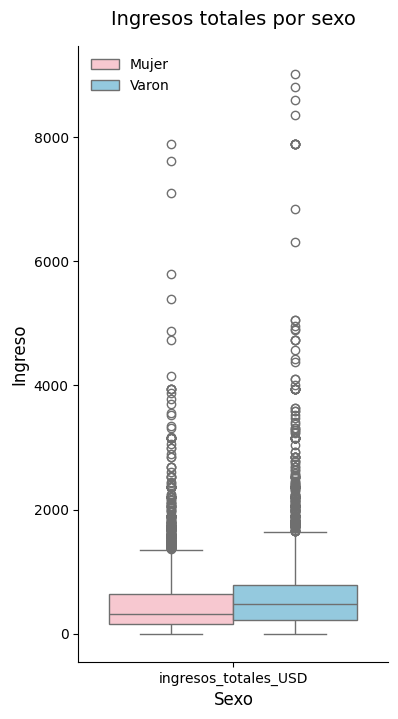

In [114]:
# Ingresos totales por sexo
boxplot_sexo = datoslab.melt(id_vars='sexo', value_vars=['ingresos_totales_USD'])
boxplot_sexo

paleta = {'Varon': 'skyblue', 'Mujer': 'pink'}
plt.figure(figsize=(4, 8))
sns.boxplot(x="variable", y="value", data=boxplot_sexo, palette= paleta, hue='sexo')
plt.title('Ingresos totales por sexo', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('Sexo', size=12)
plt.ylabel('Ingreso', size=12)
sns.despine()
plt.show()

A partir del gráfico podemos decir que la mayoría de los varones parecen percibir un sueldo total mayor al de las mujeres. La dispersión de los datos fue similar para ambos grupos, pero los varones tuvieron valores atípicos superiores a los de las mujeres.

### Ingresos por comuna

Text(0, 0.5, 'Cantidad de personas')

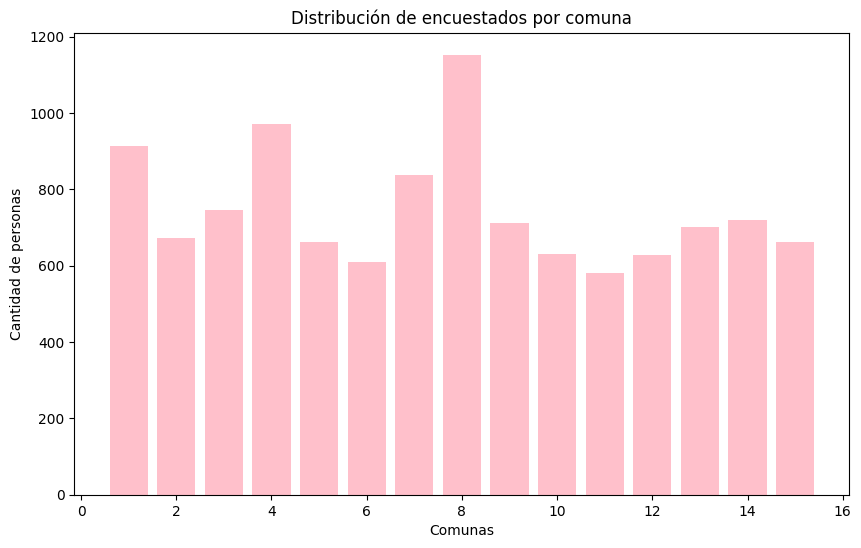

In [115]:
conteo = datoslab['comuna'].value_counts()
valores = conteo.values
etiquetas = conteo.index

plt.figure(figsize=(10, 6))  # Tamaño opcional del gráfico
plt.bar(etiquetas, valores, color='pink')
plt.title('Distribución de encuestados por comuna')
plt.xlabel('Comunas')
plt.ylabel('Cantidad de personas')


Text(4.706083333333334, 0.5, 'Cantidad de personas')

<Figure size 1000x600 with 0 Axes>

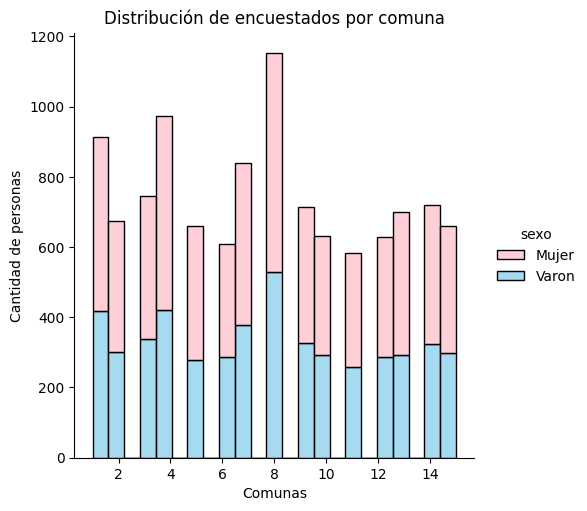

In [116]:
paleta = {'Varon': 'skyblue', 'Mujer': 'pink'}

plt.figure(figsize=(10, 6))  # Tamaño opcional del gráfico
sns.displot(data=datoslab, x="comuna", hue="sexo", multiple="stack",palette= paleta)
plt.title('Distribución de encuestados por comuna')
plt.xlabel('Comunas')
plt.ylabel('Cantidad de personas')


In [117]:
#cant_comuna_fem = len(datos[(datos['edad']>= 18) & (datos['sexo'] == 'Mujer') ])
conteo = datoslab.groupby('sexo')['comuna'].value_counts()
valores = conteo.values
etiquetas = conteo.index

print(conteo)

sexo   comuna
Mujer  8         623
       4         550
       1         495
       7         460
       13        409
       3         407
       14        395
       9         385
       5         382
       2         372
       15        362
       12        342
       10        339
       11        323
       6         322
Varon  8         530
       4         422
       1         419
       7         379
       3         338
       9         328
       14        324
       2         301
       15        299
       10        292
       13        292
       6         288
       12        287
       5         279
       11        259
Name: count, dtype: int64


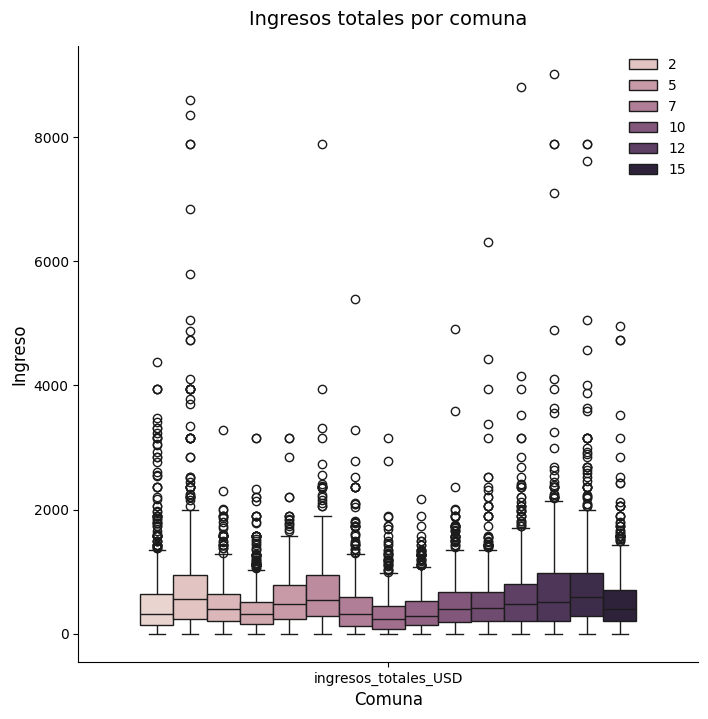

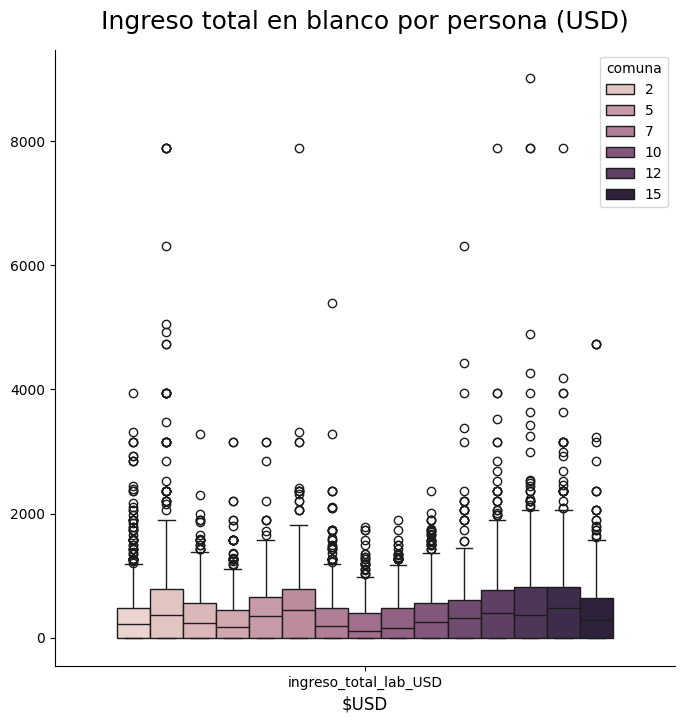

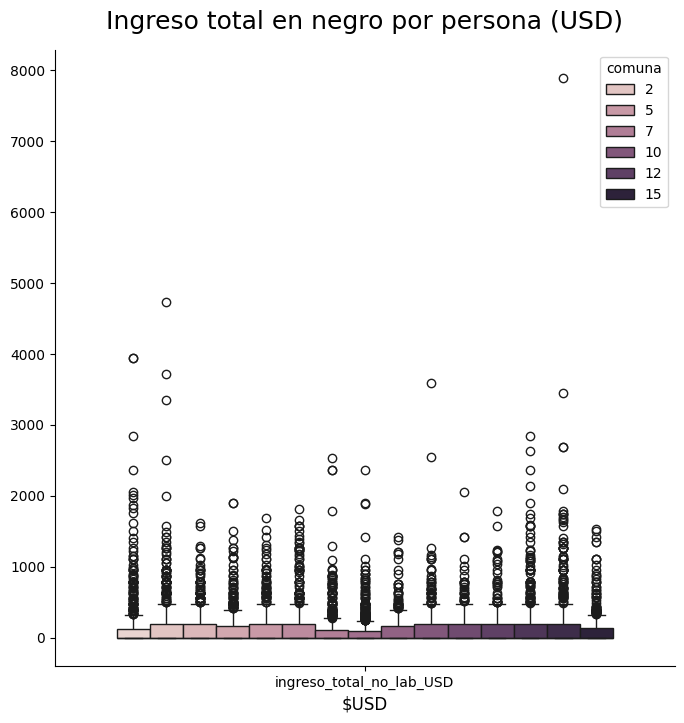

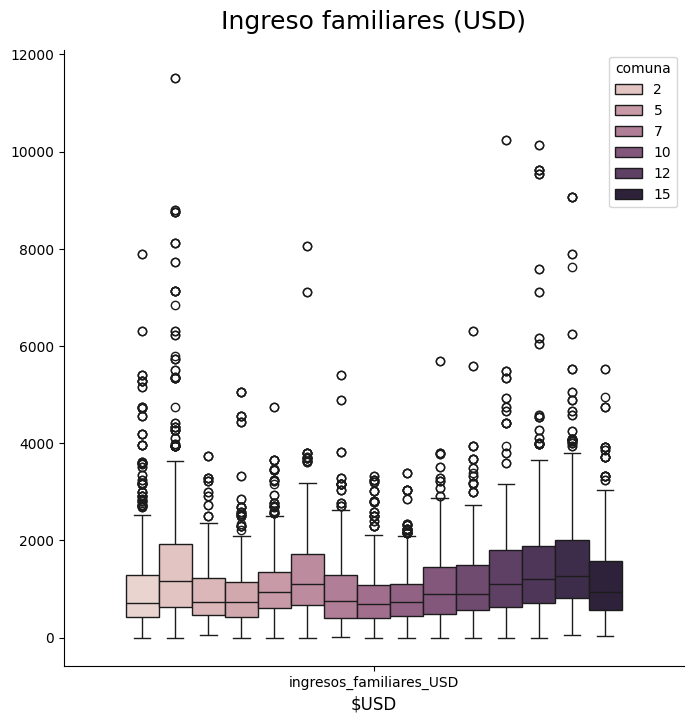

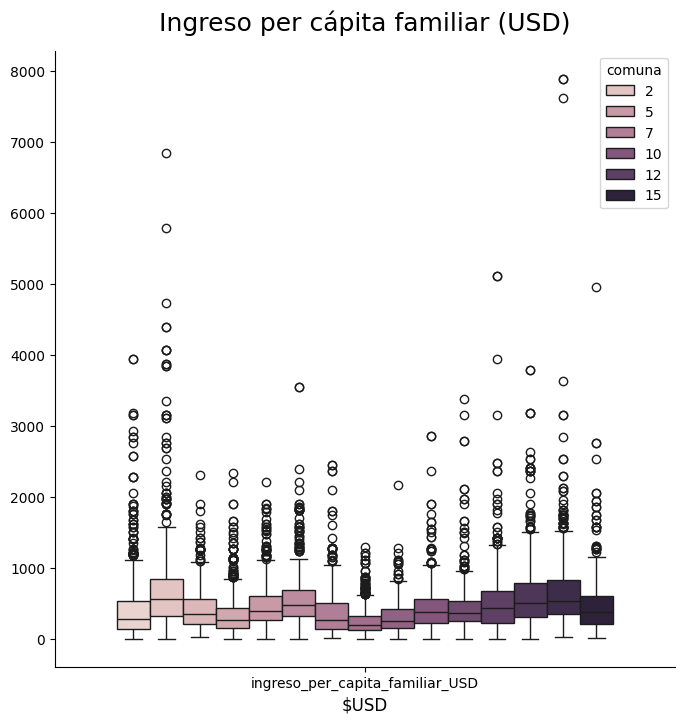

<Figure size 640x480 with 0 Axes>

In [118]:
# Ingresos totales por comuna
boxplot_comuna_ingresos_totales = datoslab.melt(id_vars='comuna', value_vars=['ingresos_totales_USD'])
boxplot_comuna_ingresos_totales

plt.figure(figsize=(8, 8))
sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_totales, hue='comuna')
plt.title('Ingresos totales por comuna', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('Comuna', size=12)
plt.ylabel('Ingreso', size=12)
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_comuna_ingresos_total_lab = datoslab.melt(id_vars='comuna', value_vars=['ingreso_total_lab_USD'])

# Subgráfico 2
lab = sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_total_lab, hue='comuna')
plt.title('Ingreso total en blanco por persona (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#lab.axvline(x = mediatotaleslab, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_comuna_ingresos_total_no_lab = datoslab.melt(id_vars='comuna', value_vars=['ingreso_total_no_lab_USD'])

# Subgráfico 3
nolab=sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_total_no_lab, hue='comuna')
plt.title('Ingreso total en negro por persona (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#nolab.axvline(x = mediatotalesnolab, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_comuna_ingresos_familiares = datoslab.melt(id_vars='comuna', value_vars=['ingresos_familiares_USD'])

# Subgráfico 4
fam=sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_familiares, hue='comuna')
plt.title('Ingreso familiares (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#fam.axvline(x = mediatotalesfam, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_comuna_ingresos_per_capita_familiar = datoslab.melt(id_vars='comuna', value_vars=['ingreso_per_capita_familiar_USD'])

# Subgráfico 5
percap=sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_per_capita_familiar, hue='comuna')
plt.title('Ingreso per cápita familiar (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#percap.axvline(x = mediatotalespercap, color="red")
sns.despine()
plt.show()


plt.tight_layout()  #  ajustar automáticamente el diseño de los subgráficos para evitar solapamientos
plt.show()


### Ingresos por comuna (division por sexo)

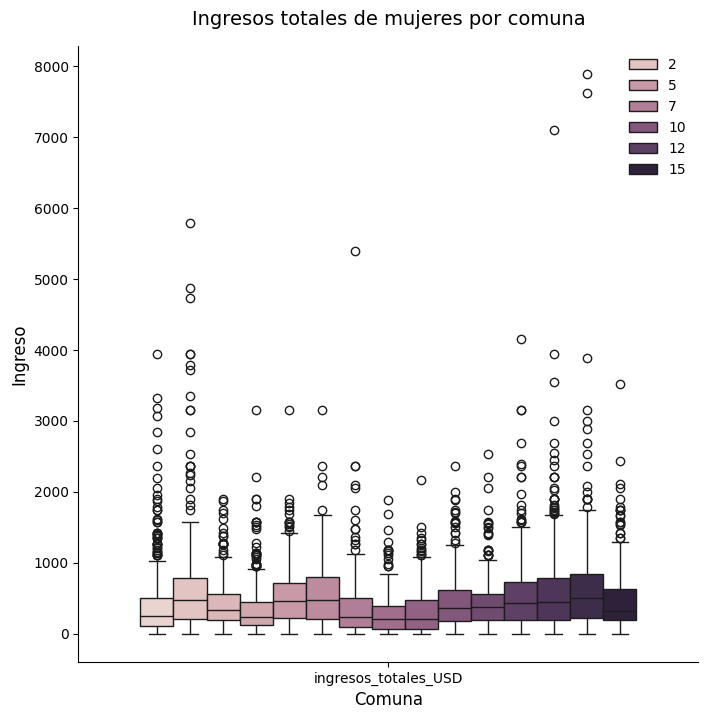

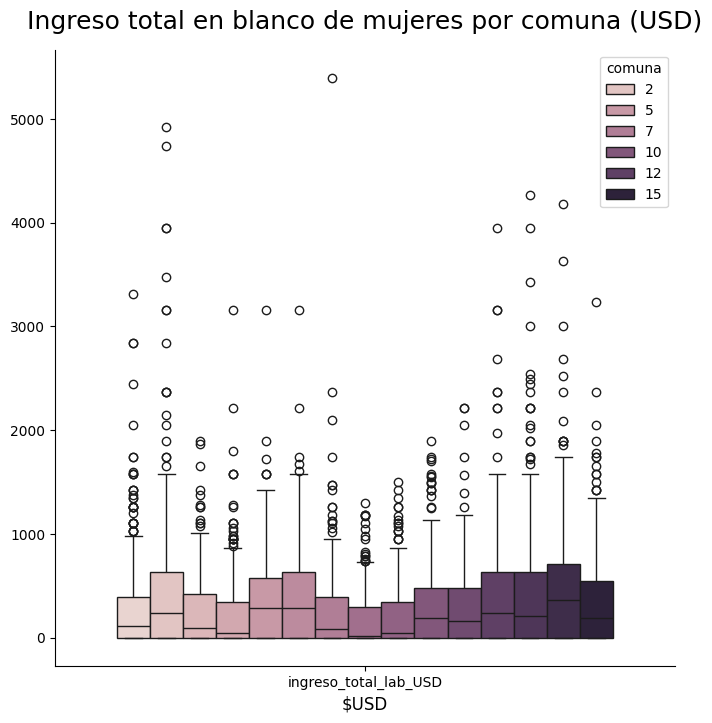

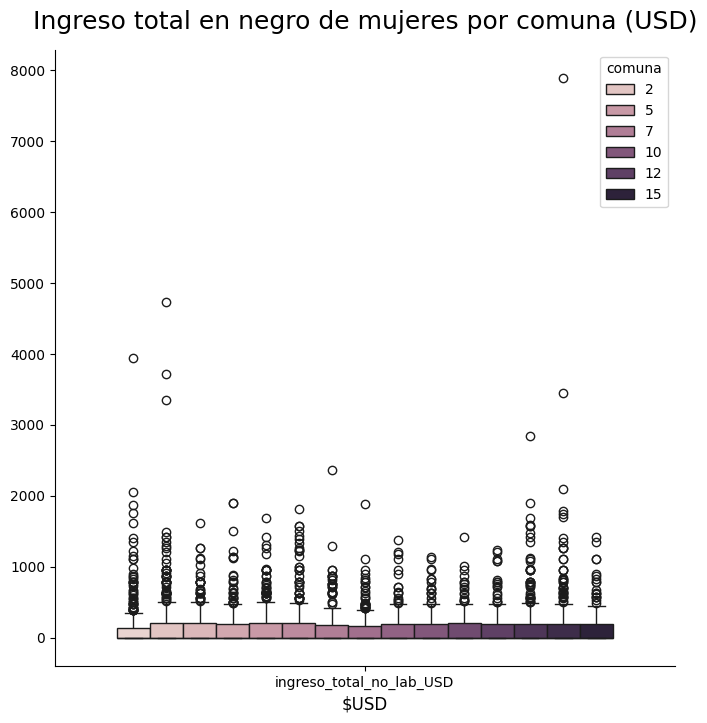

<Figure size 640x480 with 0 Axes>

In [119]:
# Ingresos totales por comuna
boxplot_comuna_ingresos_totales = datoslab_fem.melt(id_vars='comuna', value_vars=['ingresos_totales_USD'])

plt.figure(figsize=(8, 8))
sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_totales, hue='comuna')
plt.title('Ingresos totales de mujeres por comuna', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('Comuna', size=12)
plt.ylabel('Ingreso', size=12)
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_comuna_ingresos_total_lab = datoslab_fem.melt(id_vars='comuna', value_vars=['ingreso_total_lab_USD'])

# Subgráfico 2
lab = sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_total_lab, hue='comuna')
plt.title('Ingreso total en blanco de mujeres por comuna (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#lab.axvline(x = mediatotaleslab, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_comuna_ingresos_total_no_lab = datoslab_fem.melt(id_vars='comuna', value_vars=['ingreso_total_no_lab_USD'])

# Subgráfico 3
nolab=sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_total_no_lab, hue='comuna')
plt.title('Ingreso total en negro de mujeres por comuna (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#nolab.axvline(x = mediatotalesnolab, color="red")
sns.despine()
plt.show()

"""

plt.figure(figsize=(8, 8)) 
boxplot_comuna_ingresos_familiares = datoslab_fem.melt(id_vars='comuna', value_vars=['ingresos_familiares_USD'])

# Subgráfico 4
fam=sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_familiares, hue='comuna')
plt.title('Ingreso familiares (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#fam.axvline(x = mediatotalesfam, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_comuna_ingresos_per_capita_familiar = datoslab_fem.melt(id_vars='comuna', value_vars=['ingreso_per_capita_familiar_USD'])

# Subgráfico 5
percap=sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_per_capita_familiar, hue='comuna')
plt.title('Ingreso per cápita familiar (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#percap.axvline(x = mediatotalespercap, color="red")
sns.despine()
plt.show()
"""


plt.tight_layout()  #  ajustar automáticamente el diseño de los subgráficos para evitar solapamientos
plt.show()


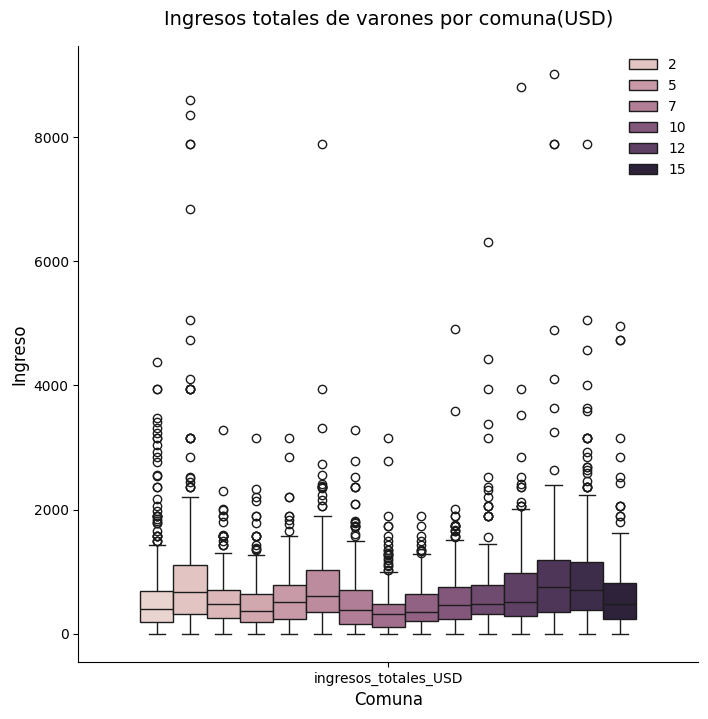

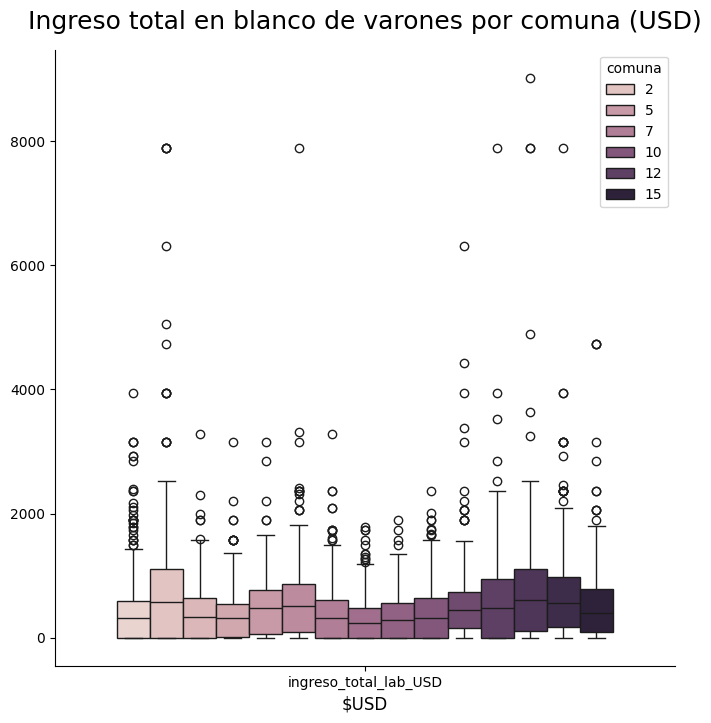

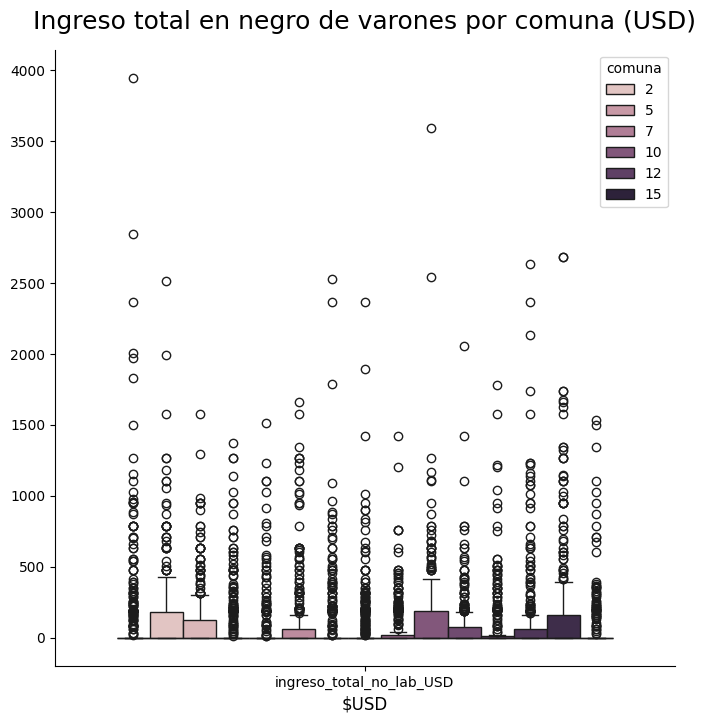

<Figure size 640x480 with 0 Axes>

In [120]:
# Ingresos totales por comuna y filtrados por varones de hogar
boxplot_comuna_ingresos_totales = datoslab_masc.melt(id_vars='comuna', value_vars=['ingresos_totales_USD'])

plt.figure(figsize=(8, 8))
sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_totales, hue='comuna')
plt.title('Ingresos totales de varones por comuna(USD)', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('Comuna', size=12)
plt.ylabel('Ingreso', size=12)
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_comuna_ingresos_total_lab = datoslab_masc.melt(id_vars='comuna', value_vars=['ingreso_total_lab_USD'])

# Subgráfico 2
lab = sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_total_lab, hue='comuna')
plt.title('Ingreso total en blanco de varones por comuna (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#lab.axvline(x = mediatotaleslab, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_comuna_ingresos_total_no_lab = datoslab_masc.melt(id_vars='comuna', value_vars=['ingreso_total_no_lab_USD'])

# Subgráfico 3
nolab=sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_total_no_lab, hue='comuna')
plt.title('Ingreso total en negro de varones por comuna (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#nolab.axvline(x = mediatotalesnolab, color="red")
sns.despine()
plt.show()

"""
plt.figure(figsize=(8, 8)) 
boxplot_comuna_ingresos_familiares = datoslab_masc.melt(id_vars='comuna', value_vars=['ingresos_familiares_USD'])

# Subgráfico 4
fam=sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_familiares, hue='comuna')
plt.title('Ingreso familiares (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#fam.axvline(x = mediatotalesfam, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_comuna_ingresos_per_capita_familiar = datoslab_masc.melt(id_vars='comuna', value_vars=['ingreso_per_capita_familiar_USD'])

# Subgráfico 5
percap=sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_per_capita_familiar, hue='comuna')
plt.title('Ingreso per cápita familiar (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#percap.axvline(x = mediatotalespercap, color="red")
sns.despine()
plt.show()
"""

plt.tight_layout()  #  ajustar automáticamente el diseño de los subgráficos para evitar solapamientos
plt.show()


### Ingresos por comuna (por sexo y filtrando por jefe o jefa de hogar)

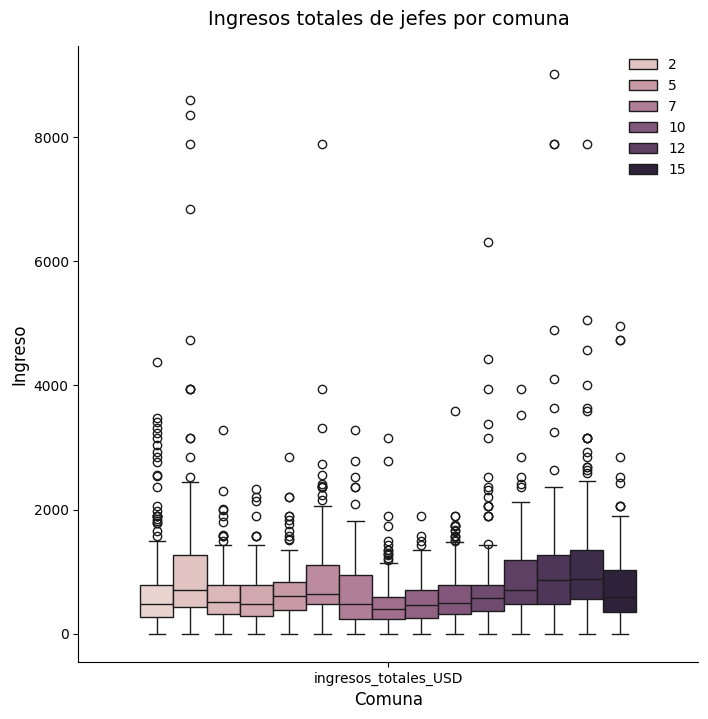

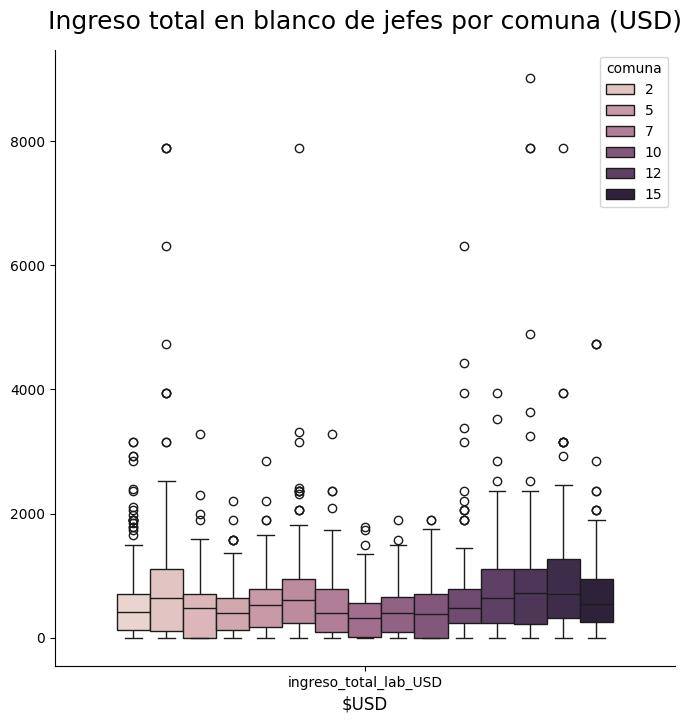

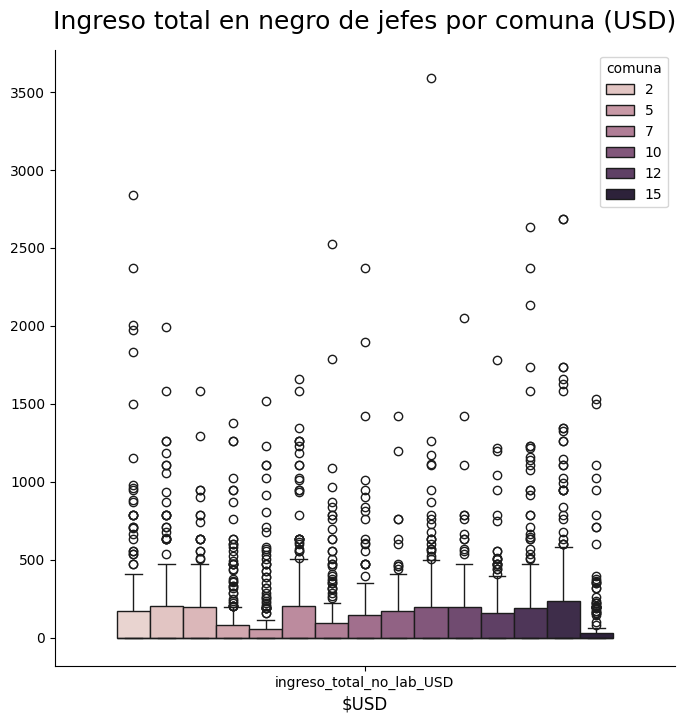

In [137]:
# Ingresos totales por comuna
boxplot_comuna_ingresos_totales = datoslab_masc_jefe.melt(id_vars='comuna', value_vars=['ingresos_totales_USD'])

plt.figure(figsize=(8, 8))
sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_totales, hue='comuna')
plt.title('Ingresos totales de jefes por comuna', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('Comuna', size=12)
plt.ylabel('Ingreso', size=12)
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_comuna_ingresos_total_lab = datoslab_masc_jefe.melt(id_vars='comuna', value_vars=['ingreso_total_lab_USD'])

# Subgráfico 2
lab = sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_total_lab, hue='comuna')
plt.title('Ingreso total en blanco de jefes por comuna (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#lab.axvline(x = mediatotaleslab, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_comuna_ingresos_total_no_lab = datoslab_masc_jefe.melt(id_vars='comuna', value_vars=['ingreso_total_no_lab_USD'])

# Subgráfico 3
nolab=sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_total_no_lab, hue='comuna')
plt.title('Ingreso total en negro de jefes por comuna (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#nolab.axvline(x = mediatotalesnolab, color="red")
sns.despine()
plt.show()

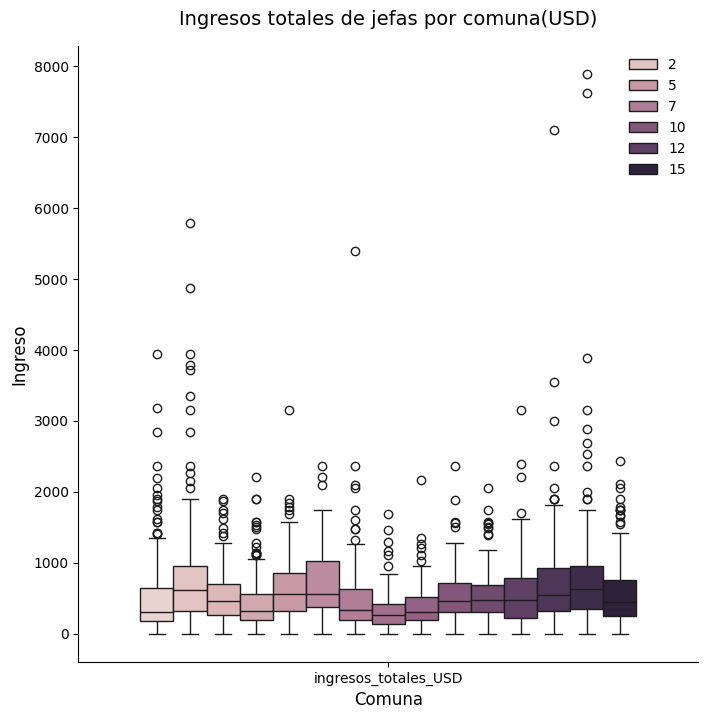

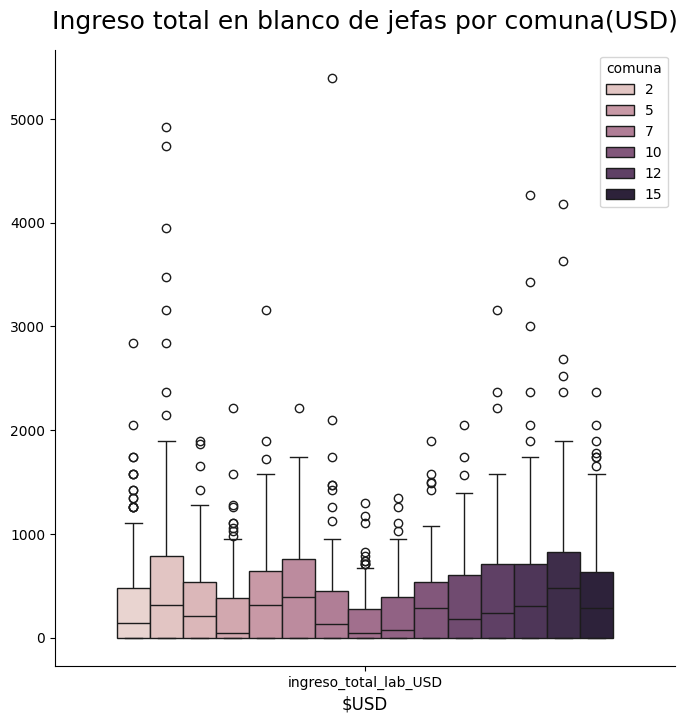

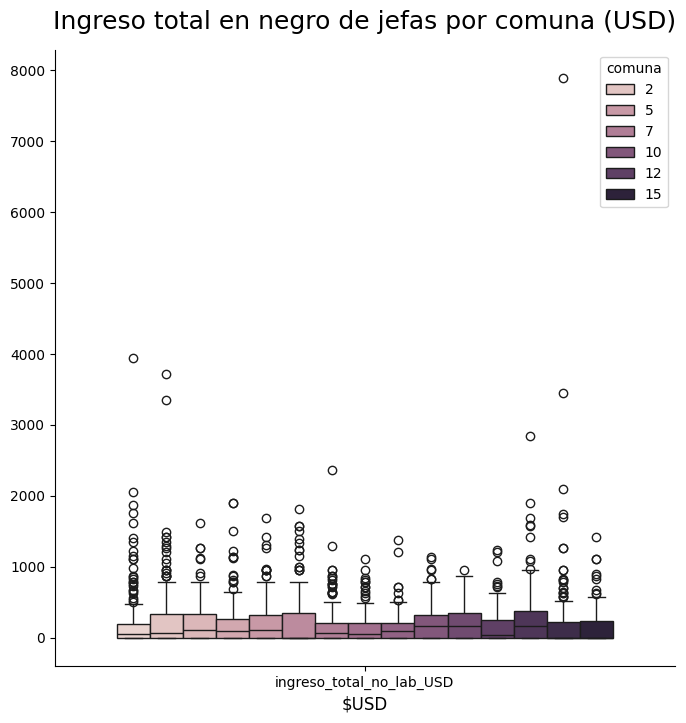

In [138]:
# Ingresos totales por comuna
boxplot_comuna_ingresos_totales = datoslab_fem_jefa.melt(id_vars='comuna', value_vars=['ingresos_totales_USD'])

plt.figure(figsize=(8, 8))
sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_totales, hue='comuna')
plt.title('Ingresos totales de jefas por comuna(USD)', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('Comuna', size=12)
plt.ylabel('Ingreso', size=12)
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_comuna_ingresos_total_lab = datoslab_fem_jefa.melt(id_vars='comuna', value_vars=['ingreso_total_lab_USD'])

# Subgráfico 2
lab = sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_total_lab, hue='comuna')
plt.title('Ingreso total en blanco de jefas por comuna(USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#lab.axvline(x = mediatotaleslab, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_comuna_ingresos_total_no_lab = datoslab_fem_jefa.melt(id_vars='comuna', value_vars=['ingreso_total_no_lab_USD'])

# Subgráfico 3
nolab=sns.boxplot(x="variable", y="value", data=boxplot_comuna_ingresos_total_no_lab, hue='comuna')
plt.title('Ingreso total en negro de jefas por comuna (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#nolab.axvline(x = mediatotalesnolab, color="red")
sns.despine()
plt.show()

### Ingresos por Situacion Conyugal (dividido por sexo, NO son jefes o jefas del hogar)

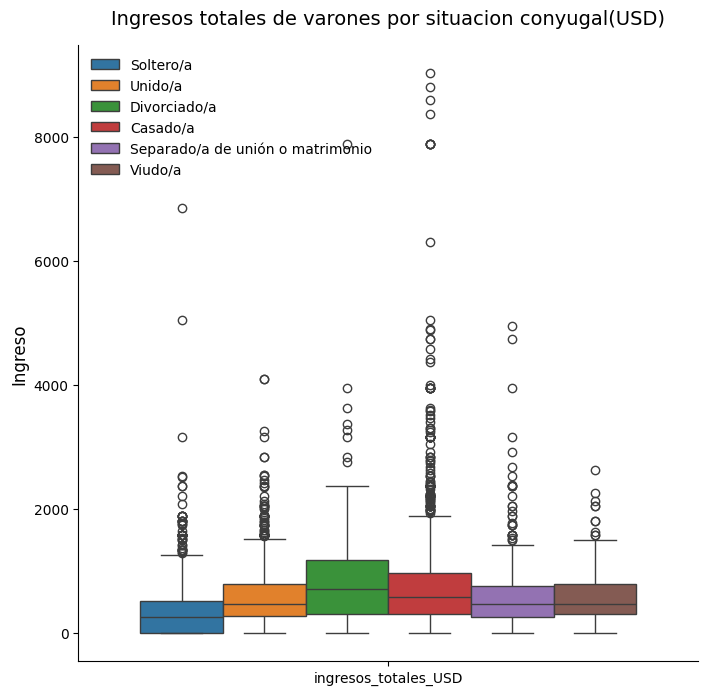

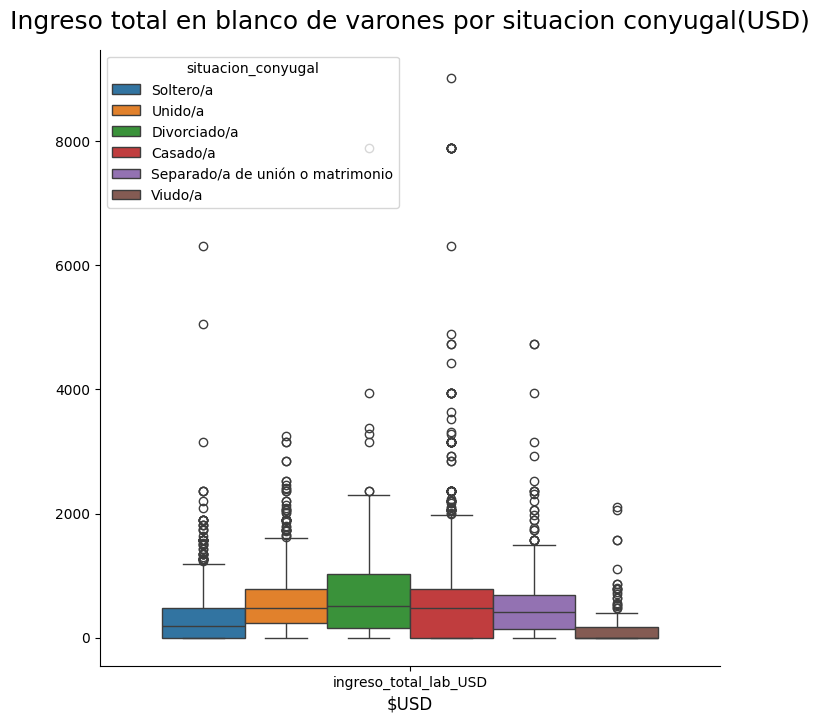

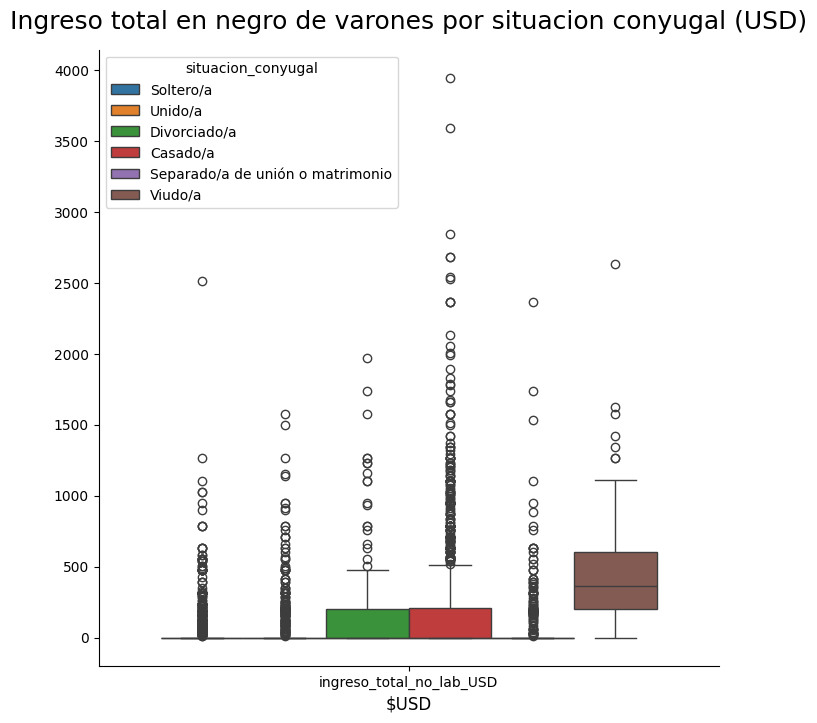

In [143]:
boxplot_situacionConyugal_ingresos_totales = datoslab_masc.melt(id_vars='situacion_conyugal', value_vars=['ingresos_totales_USD'])

plt.figure(figsize=(8, 8))
sns.boxplot(x="variable", y="value", data=boxplot_situacionConyugal_ingresos_totales, hue='situacion_conyugal')
plt.title('Ingresos totales de varones por situacion conyugal(USD)', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('', size=12)
plt.ylabel('Ingreso', size=12)
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_situacionConyugal_ingresos_total_lab = datoslab_masc.melt(id_vars='situacion_conyugal', value_vars=['ingreso_total_lab_USD'])

# Subgráfico 2
lab = sns.boxplot(x="variable", y="value", data=boxplot_situacionConyugal_ingresos_total_lab, hue='situacion_conyugal')
plt.title('Ingreso total en blanco de varones por situacion conyugal(USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#lab.axvline(x = mediatotaleslab, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_situacionConyugal_ingresos_total_no_lab = datoslab_masc.melt(id_vars='situacion_conyugal', value_vars=['ingreso_total_no_lab_USD'])

# Subgráfico 3
nolab=sns.boxplot(x="variable", y="value", data=boxplot_situacionConyugal_ingresos_total_no_lab, hue='situacion_conyugal')
plt.title('Ingreso total en negro de varones por situacion conyugal (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#nolab.axvline(x = mediatotalesnolab, color="red")
sns.despine()
plt.show()


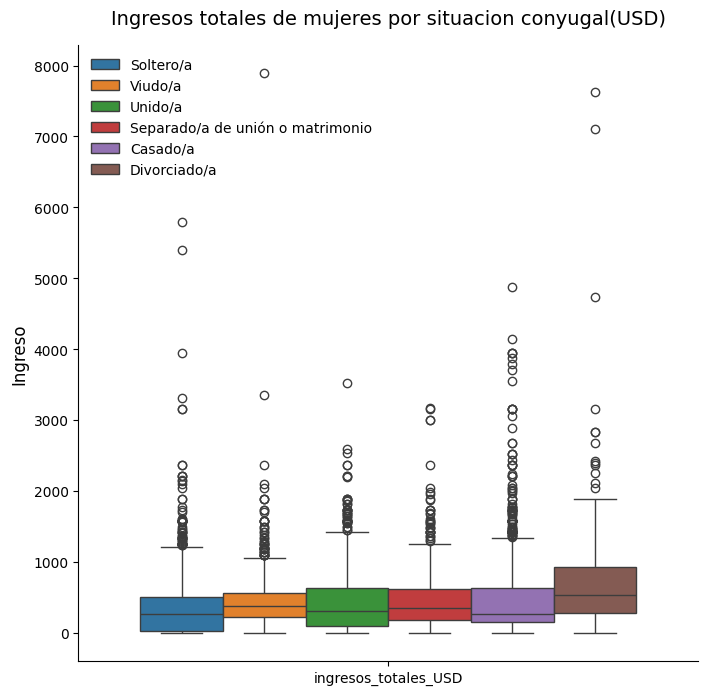

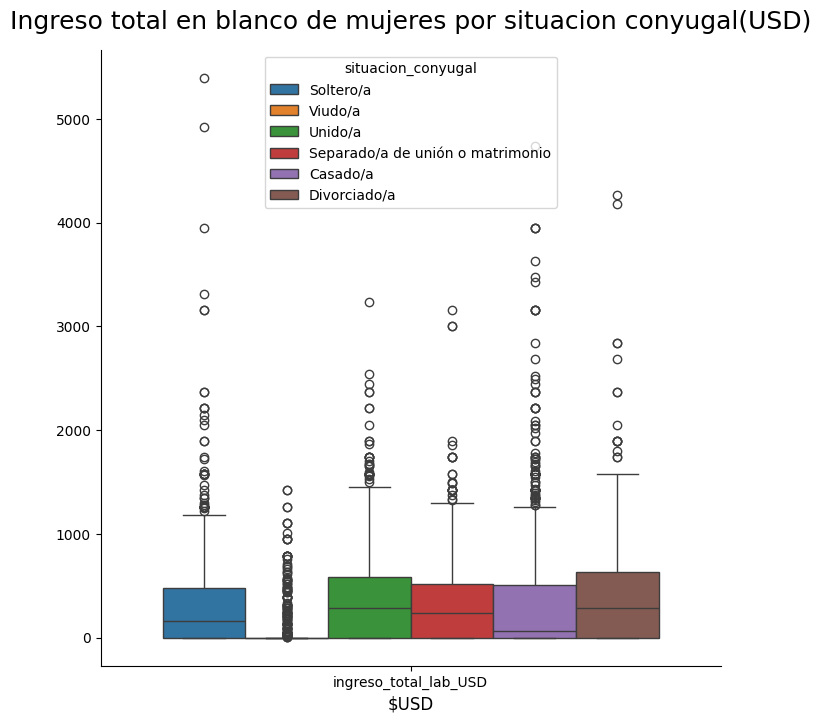

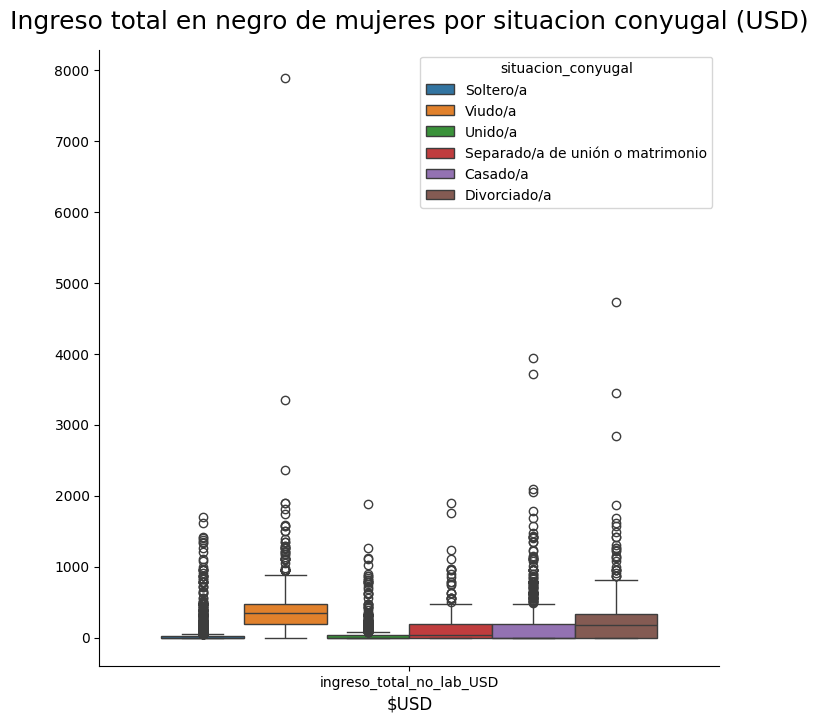

In [144]:
boxplot_situacionConyugal_ingresos_totales = datoslab_fem.melt(id_vars='situacion_conyugal', value_vars=['ingresos_totales_USD'])

plt.figure(figsize=(8, 8))
sns.boxplot(x="variable", y="value", data=boxplot_situacionConyugal_ingresos_totales, hue='situacion_conyugal')
plt.title('Ingresos totales de mujeres por situacion conyugal(USD)', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('', size=12)
plt.ylabel('Ingreso', size=12)
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_situacionConyugal_ingresos_total_lab = datoslab_fem.melt(id_vars='situacion_conyugal', value_vars=['ingreso_total_lab_USD'])

# Subgráfico 2
lab = sns.boxplot(x="variable", y="value", data=boxplot_situacionConyugal_ingresos_total_lab, hue='situacion_conyugal')
plt.title('Ingreso total en blanco de mujeres por situacion conyugal(USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#lab.axvline(x = mediatotaleslab, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_situacionConyugal_ingresos_total_no_lab = datoslab_fem.melt(id_vars='situacion_conyugal', value_vars=['ingreso_total_no_lab_USD'])

# Subgráfico 3
nolab=sns.boxplot(x="variable", y="value", data=boxplot_situacionConyugal_ingresos_total_no_lab, hue='situacion_conyugal')
plt.title('Ingreso total en negro de mujeres por situacion conyugal (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#nolab.axvline(x = mediatotalesnolab, color="red")
sns.despine()
plt.show()

### Ingresos por cat_ocupacional (dividido por sexo, NO son jefes o jefas del hogar)

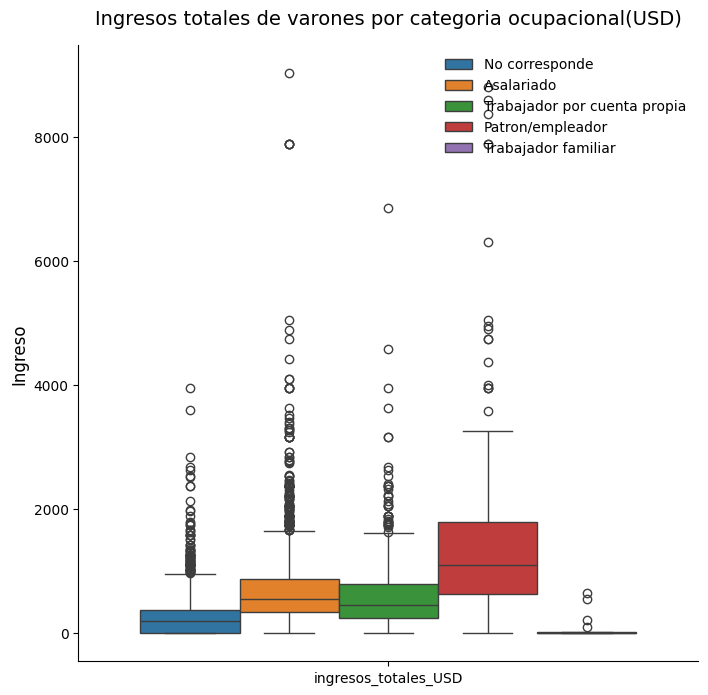

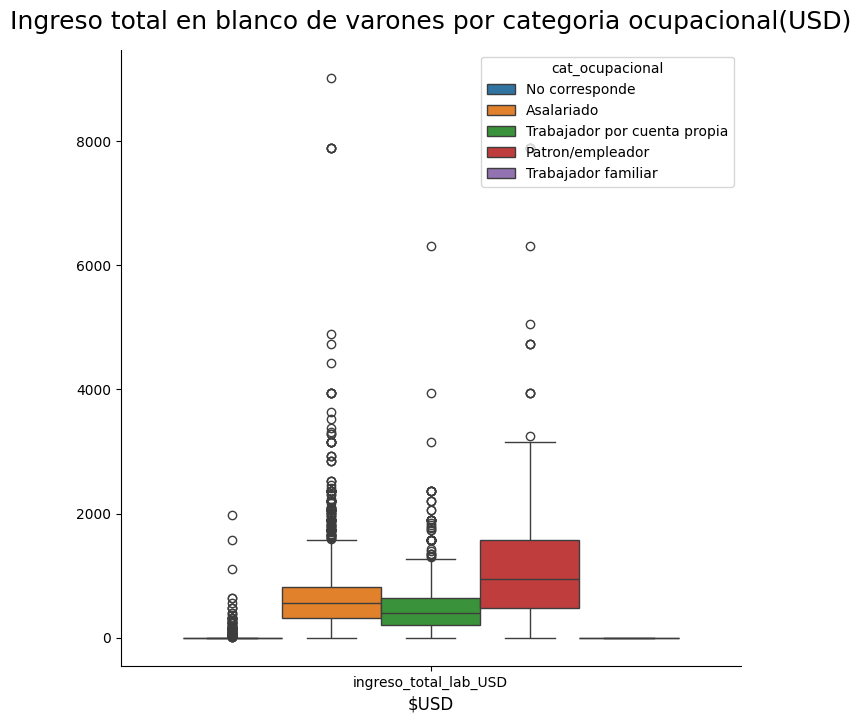

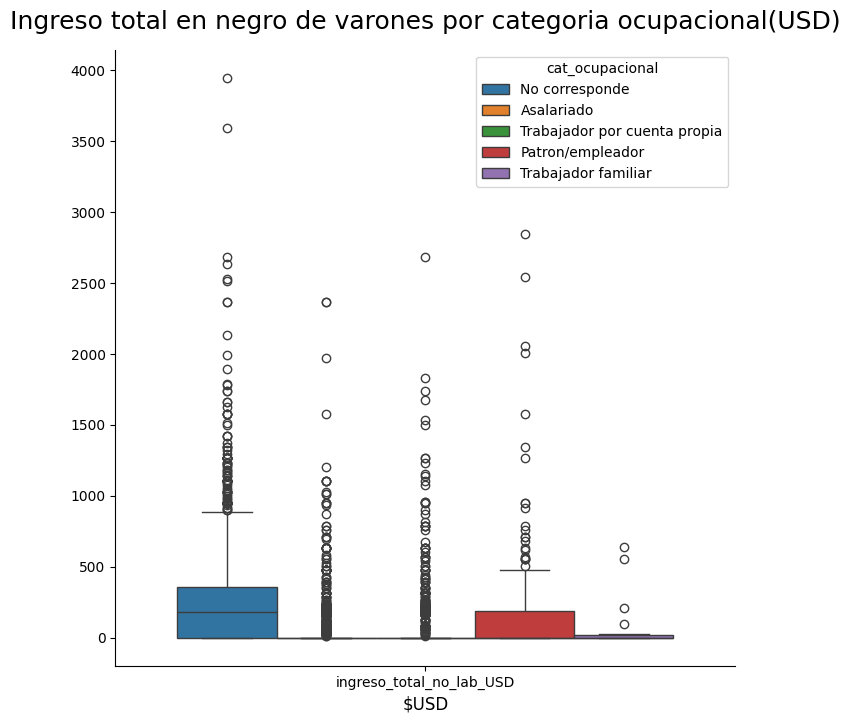

In [146]:
boxplot_ocupacion_ingresos_totales = datoslab_masc.melt(id_vars='cat_ocupacional', value_vars=['ingresos_totales_USD'])

plt.figure(figsize=(8, 8))
sns.boxplot(x="variable", y="value", data=boxplot_ocupacion_ingresos_totales, hue='cat_ocupacional')
plt.title('Ingresos totales de varones por categoria ocupacional(USD)', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('', size=12)
plt.ylabel('Ingreso', size=12)
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_ocupacion_ingresos_total_lab = datoslab_masc.melt(id_vars='cat_ocupacional', value_vars=['ingreso_total_lab_USD'])

# Subgráfico 2
lab = sns.boxplot(x="variable", y="value", data=boxplot_ocupacion_ingresos_total_lab, hue='cat_ocupacional')
plt.title('Ingreso total en blanco de varones por categoria ocupacional(USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#lab.axvline(x = mediatotaleslab, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_ocupacion_ingresos_total_no_lab = datoslab_masc.melt(id_vars='cat_ocupacional', value_vars=['ingreso_total_no_lab_USD'])

# Subgráfico 3
nolab=sns.boxplot(x="variable", y="value", data=boxplot_ocupacion_ingresos_total_no_lab, hue='cat_ocupacional')
plt.title('Ingreso total en negro de varones por categoria ocupacional(USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#nolab.axvline(x = mediatotalesnolab, color="red")
sns.despine()
plt.show()

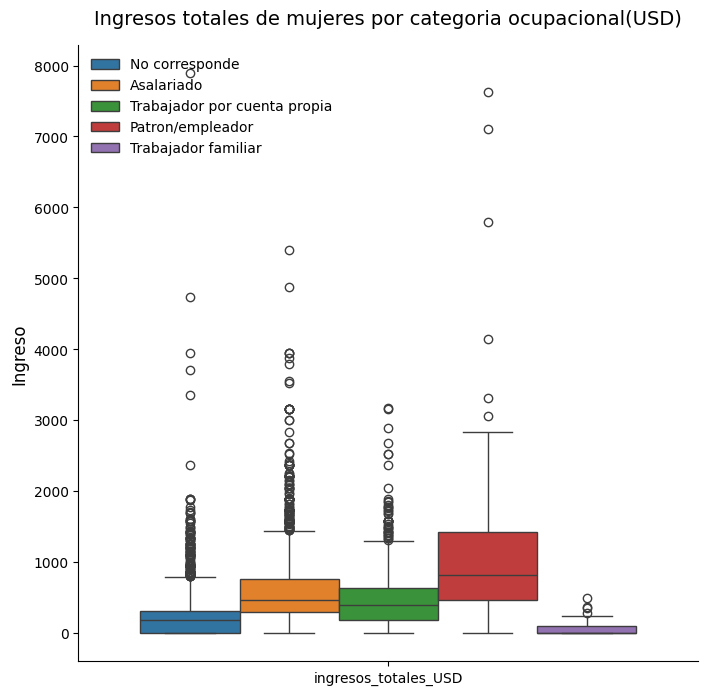

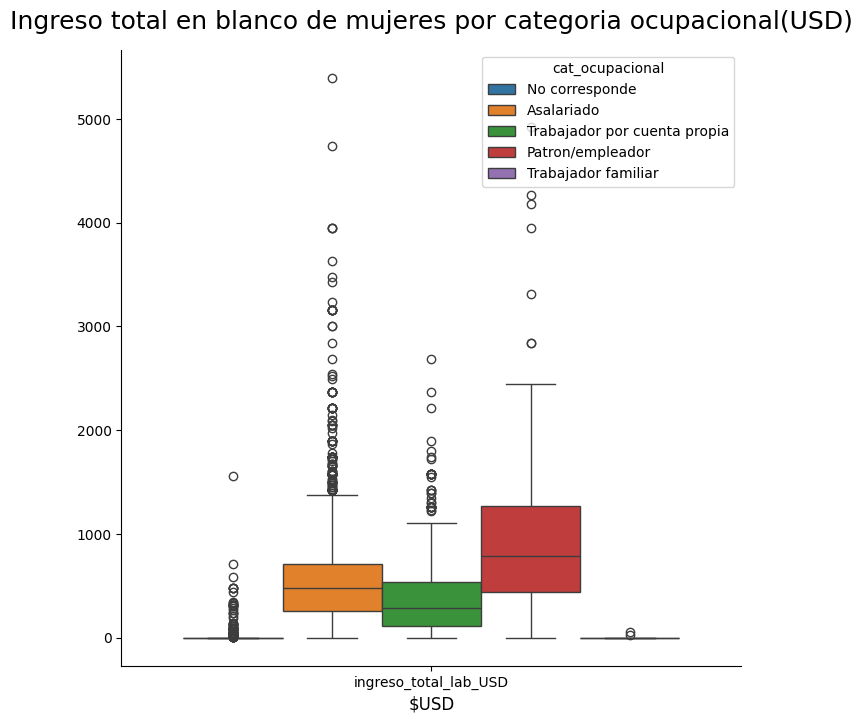

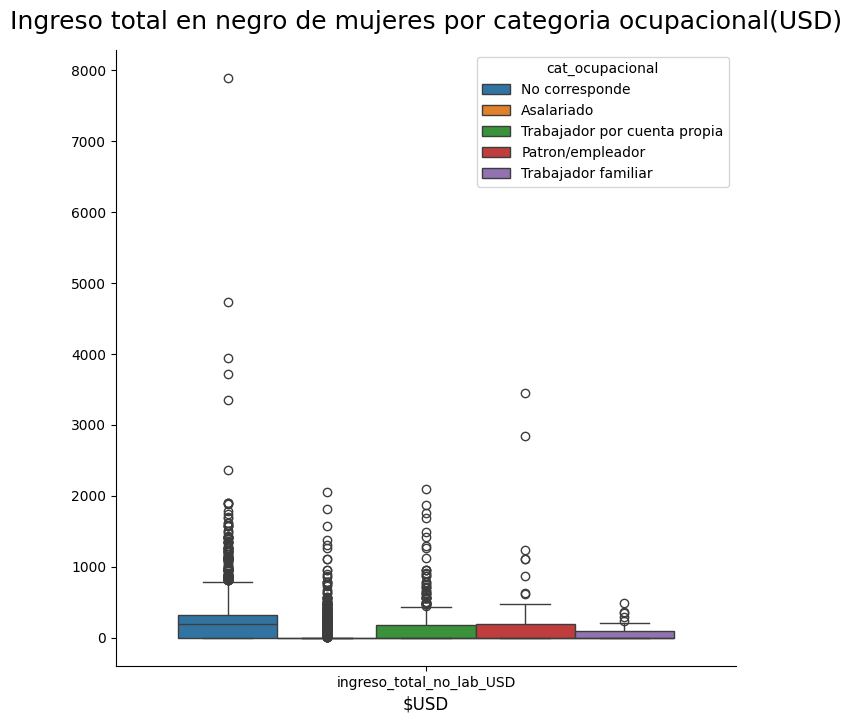

In [148]:
boxplot_ocupacion_ingresos_totales = datoslab_fem.melt(id_vars='cat_ocupacional', value_vars=['ingresos_totales_USD'])

plt.figure(figsize=(8, 8))
sns.boxplot(x="variable", y="value", data=boxplot_ocupacion_ingresos_totales, hue='cat_ocupacional')
plt.title('Ingresos totales de mujeres por categoria ocupacional(USD)', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('', size=12)
plt.ylabel('Ingreso', size=12)
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_ocupacion_ingresos_total_lab = datoslab_fem.melt(id_vars='cat_ocupacional', value_vars=['ingreso_total_lab_USD'])

# Subgráfico 2
lab = sns.boxplot(x="variable", y="value", data=boxplot_ocupacion_ingresos_total_lab, hue='cat_ocupacional')
plt.title('Ingreso total en blanco de mujeres por categoria ocupacional(USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#lab.axvline(x = mediatotaleslab, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_ocupacion_ingresos_total_no_lab = datoslab_fem.melt(id_vars='cat_ocupacional', value_vars=['ingreso_total_no_lab_USD'])

# Subgráfico 3
nolab=sns.boxplot(x="variable", y="value", data=boxplot_ocupacion_ingresos_total_no_lab, hue='cat_ocupacional')
plt.title('Ingreso total en negro de mujeres por categoria ocupacional(USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#nolab.axvline(x = mediatotalesnolab, color="red")
sns.despine()
plt.show()

### Ingresos por educacion (dividido por sexo, NO son jefes o jefas)

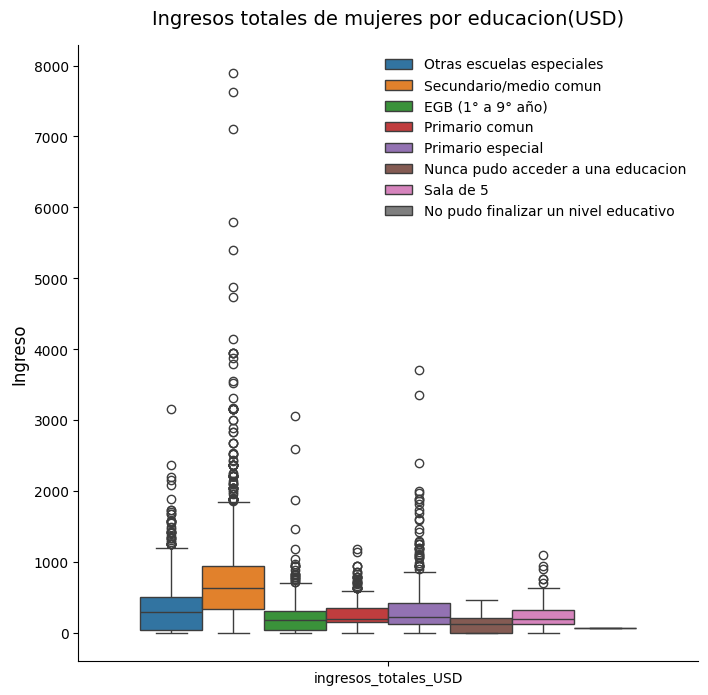

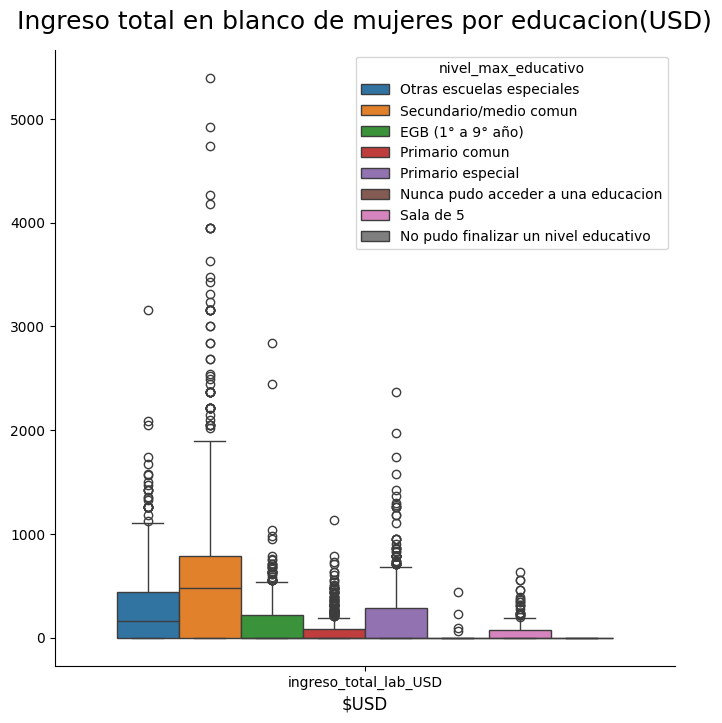

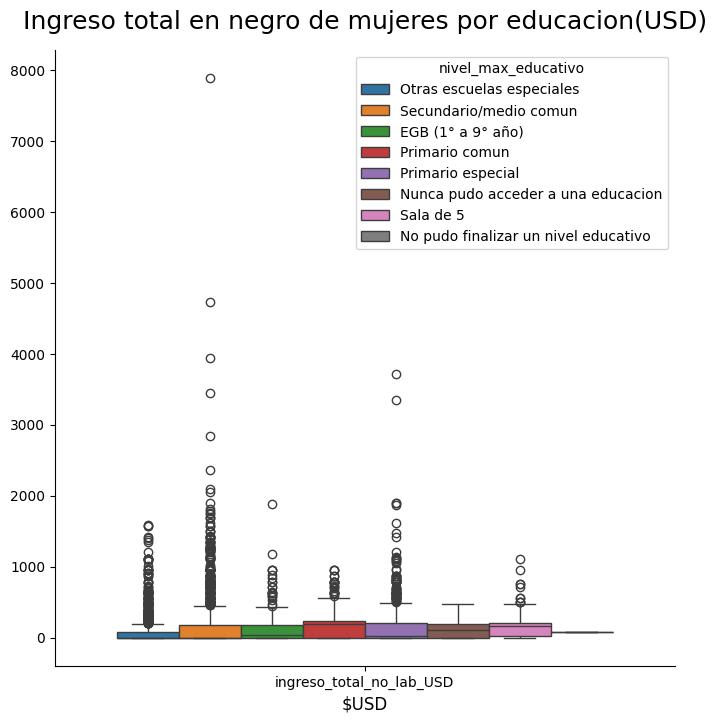

In [152]:
boxplot_educacion_ingresos_totales = datoslab_fem.melt(id_vars='nivel_max_educativo', value_vars=['ingresos_totales_USD'])

plt.figure(figsize=(8, 8))
sns.boxplot(x="variable", y="value", data=boxplot_educacion_ingresos_totales, hue='nivel_max_educativo')
plt.title('Ingresos totales de mujeres por educacion(USD)', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('', size=12)
plt.ylabel('Ingreso', size=12)
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_educacion_ingresos_total_lab = datoslab_fem.melt(id_vars='nivel_max_educativo', value_vars=['ingreso_total_lab_USD'])

# Subgráfico 2
lab = sns.boxplot(x="variable", y="value", data=boxplot_educacion_ingresos_total_lab, hue='nivel_max_educativo')
plt.title('Ingreso total en blanco de mujeres por educacion(USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#lab.axvline(x = mediatotaleslab, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_educacion_ingresos_total_no_lab = datoslab_fem.melt(id_vars='nivel_max_educativo', value_vars=['ingreso_total_no_lab_USD'])

# Subgráfico 3
nolab=sns.boxplot(x="variable", y="value", data=boxplot_educacion_ingresos_total_no_lab, hue='nivel_max_educativo')
plt.title('Ingreso total en negro de mujeres por educacion(USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#nolab.axvline(x = mediatotalesnolab, color="red")
sns.despine()
plt.show()


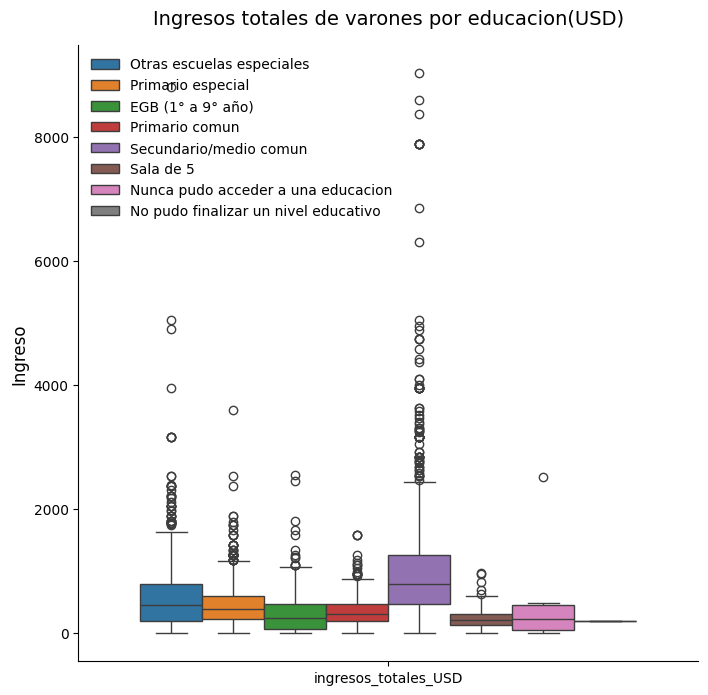

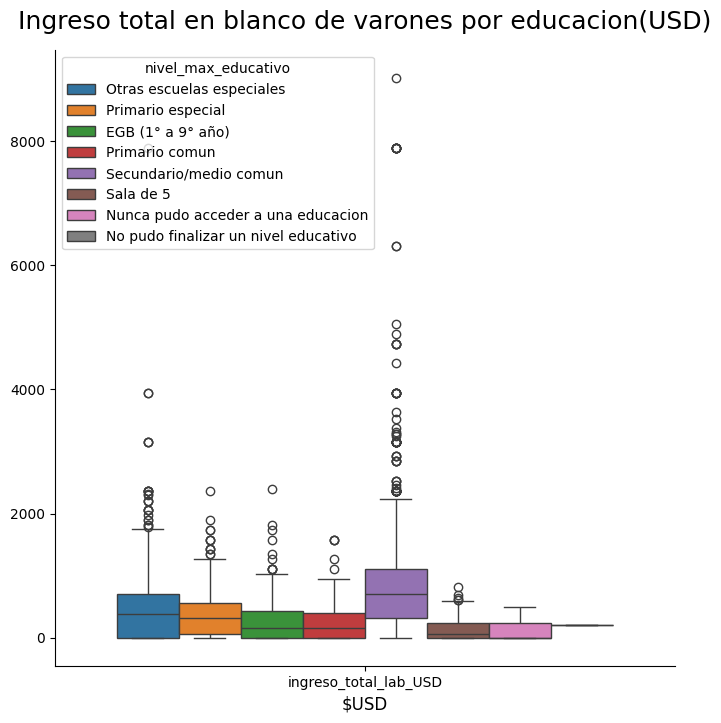

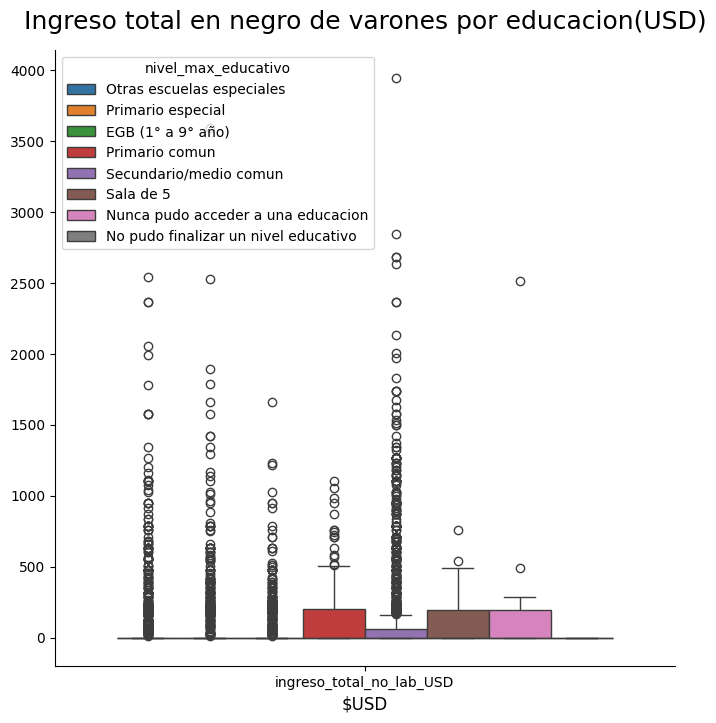

In [154]:
boxplot_educacion_ingresos_totales = datoslab_masc.melt(id_vars='nivel_max_educativo', value_vars=['ingresos_totales_USD'])

plt.figure(figsize=(8, 8))
sns.boxplot(x="variable", y="value", data=boxplot_educacion_ingresos_totales, hue='nivel_max_educativo')
plt.title('Ingresos totales de varones por educacion(USD)', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('', size=12)
plt.ylabel('Ingreso', size=12)
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_educacion_ingresos_total_lab = datoslab_masc.melt(id_vars='nivel_max_educativo', value_vars=['ingreso_total_lab_USD'])

# Subgráfico 2
lab = sns.boxplot(x="variable", y="value", data=boxplot_educacion_ingresos_total_lab, hue='nivel_max_educativo')
plt.title('Ingreso total en blanco de varones por educacion(USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#lab.axvline(x = mediatotaleslab, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(8, 8)) 
boxplot_educacion_ingresos_total_no_lab = datoslab_masc.melt(id_vars='nivel_max_educativo', value_vars=['ingreso_total_no_lab_USD'])

# Subgráfico 3
nolab=sns.boxplot(x="variable", y="value", data=boxplot_educacion_ingresos_total_no_lab, hue='nivel_max_educativo')
plt.title('Ingreso total en negro de varones por educacion(USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
#nolab.axvline(x = mediatotalesnolab, color="red")
sns.despine()
plt.show()


### Pasando a Cuantitativa el nivel_max_educativo

In [155]:
datoslab['nivel_max_educativo'].unique()

array(['Otras escuelas especiales', 'Secundario/medio comun',
       'EGB (1° a 9° año)', 'Primario especial', 'Primario comun',
       'Nunca pudo acceder a una educacion', 'Sala de 5',
       'No pudo finalizar un nivel educativo'], dtype=object)

In [157]:
datoslab_copia = datoslab.copy()
datoslab_copia

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,cantidad_hijos_nac_vivos,ingreso_total_lab_USD,ingreso_total_no_lab_USD,ingresos_totales_USD,ingresos_familiares_USD,ingreso_per_capita_familiar_USD
0,1,1,1,5,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,0,0.000000,94.711918,94.711918,284.135754,142.067877
1,1,1,2,5,Resto de la Ciudad,18,Mujer,Otro no familiar,Soltero/a,Padre no vive en el hogar,...,Otras escuelas especiales,12,Otra provincia,Solo plan de medicina prepaga por contratación...,0,0.000000,189.423836,189.423836,284.135754,142.067877
2,2,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,Otras escuelas especiales,12,CABA,Solo plan de medicina prepaga por contratación...,0,0.000000,0.000000,0.000000,1578.531965,526.172060
3,2,1,2,2,Resto de la Ciudad,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,...,Secundario/medio comun,17,CABA,Solo prepaga o mutual via OS,2,1104.972376,473.559590,1578.531965,1578.531965,526.172060
5,3,1,1,10,Resto de la Ciudad,18,Mujer,Jefe,Unido/a,Padre no vive en el hogar,...,EGB (1° a 9° año),8,CABA,Solo obra social,1,0.000000,39.463299,39.463299,734.017364,244.672455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14314,5794,1,1,10,Resto de la Ciudad,99,Varon,Jefe,Casado/a,No corresponde,...,Sala de 5,5,Pais no limitrofe,Solo obra social,0,0.000000,378.847672,378.847672,899.763220,224.940805
14315,5794,1,2,10,Resto de la Ciudad,78,Mujer,Otro familiar,Soltero/a,No corresponde,...,EGB (1° a 9° año),9,Partido GBA,Solo obra social,0,0.000000,173.638516,173.638516,899.763220,224.940805
14316,5794,1,3,10,Resto de la Ciudad,60,Mujer,Hijo/a - Hijastro/a,Separado/a de unión o matrimonio,No corresponde,...,Primario especial,12,CABA,Solo obra social,2,0.000000,173.638516,173.638516,899.763220,224.940805
14317,5794,1,4,10,Resto de la Ciudad,92,Mujer,Conyugue o pareja,Casado/a,No corresponde,...,Primario comun,7,CABA,Solo obra social,1,0.000000,173.638516,173.638516,899.763220,224.940805


In [160]:
jerarquia = {'Nunca pudo acceder a una educacion':1,
             'No pudo finalizar un nivel educativo':2,
             'Sala de 5': 3, 
             'Primario comun' : 4, 
             'Otras escuelas especiales' : 7,
             'Primario especial' : 6,
             'EGB (1° a 9° año)' : 5,
             'Secundario/medio comun' : 8}

# Mapear los valores categóricos a valores numéricos

datoslab_copia['nivel_max_edu_numerico'] = datoslab_copia['nivel_max_educativo'].map(jerarquia)
datoslab_copia.head(5)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,años_escolaridad,lugar_nacimiento,afiliacion_salud,cantidad_hijos_nac_vivos,ingreso_total_lab_USD,ingreso_total_no_lab_USD,ingresos_totales_USD,ingresos_familiares_USD,ingreso_per_capita_familiar_USD,nivel_max_edu_numerico
0,1,1,1,5,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,12,PBA excepto GBA,Solo obra social,0,0.000000,94.711918,94.711918,284.135754,142.067877,7
1,1,1,2,5,Resto de la Ciudad,18,Mujer,Otro no familiar,Soltero/a,Padre no vive en el hogar,...,12,Otra provincia,Solo plan de medicina prepaga por contratación...,0,0.000000,189.423836,189.423836,284.135754,142.067877,7
2,2,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,12,CABA,Solo plan de medicina prepaga por contratación...,0,0.000000,0.000000,0.000000,1578.531965,526.172060,7
3,2,1,2,2,Resto de la Ciudad,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,...,17,CABA,Solo prepaga o mutual via OS,2,1104.972376,473.559590,1578.531965,1578.531965,526.172060,8
5,3,1,1,10,Resto de la Ciudad,18,Mujer,Jefe,Unido/a,Padre no vive en el hogar,...,8,CABA,Solo obra social,1,0.000000,39.463299,39.463299,734.017364,244.672455,5


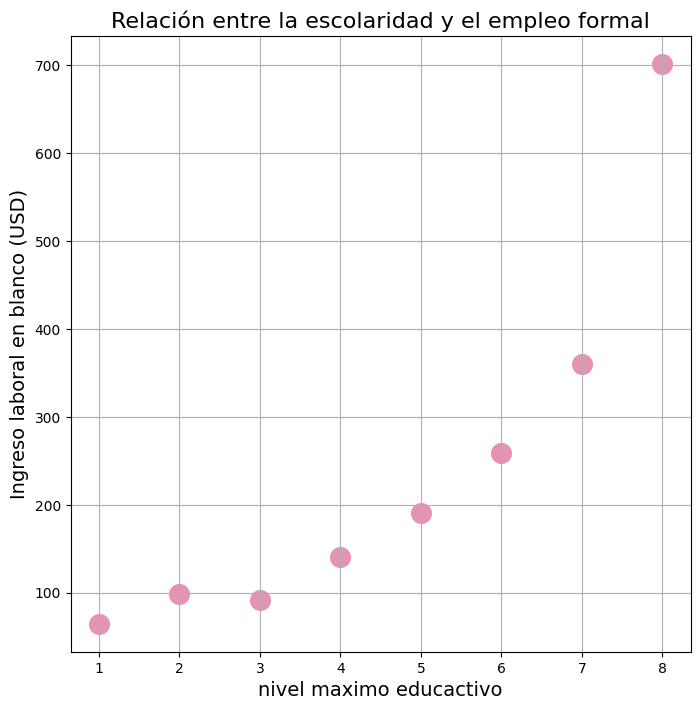

In [161]:
# Relación del nivel max educativo y el empleo formal de las personas
# Realizamos un data frame que contenga las medias de ingreso en blanco por la nueva jerarquia de educacion
medias_escolaridad2 = datoslab_copia.groupby(["nivel_max_edu_numerico"])["ingreso_total_lab_USD"].mean()
medias_escolaridad2
medias_escolaridad2 = medias_escolaridad2.to_frame() #Convertir serie en data frame
medias_escolaridad2 = medias_escolaridad2.reset_index()

# Graficamos la relación entre dos variables
plt.figure(figsize=(8, 8))
plt.scatter('nivel_max_edu_numerico','ingreso_total_lab_USD', marker='o', data=medias_escolaridad2, s=200, color="#E493B3")  # Crear el gráfico de dispersión
plt.xlabel('nivel maximo educactivo', size=14)  # Etiqueta del eje x
plt.ylabel('Ingreso laboral en blanco (USD)', size=14)  # Etiqueta del eje y
plt.title('Relación entre la escolaridad y el empleo formal', size=16)  # Título del gráfico
plt.grid(True)  # Mostrar rejilla
plt.show()  # Mostrar el gráfico

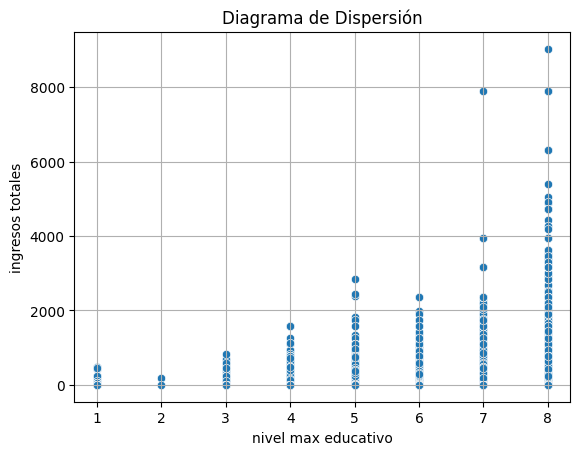

In [164]:
sns.scatterplot(data=datoslab_copia, x='nivel_max_edu_numerico', y='ingreso_total_lab_USD')

plt.xlabel('nivel max educativo')
plt.ylabel('ingresos totales')
plt.title('Diagrama de Dispersión')
plt.grid(True)  # Mostrar rejilla

plt.show()

### Cantidad de hijos por comuna

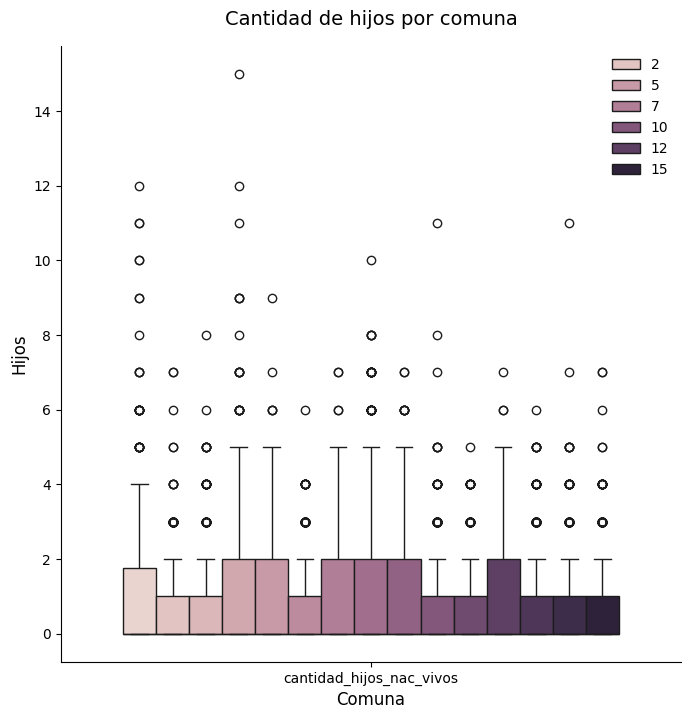

In [123]:
# Ingresos totales por sexo
boxplot_comuna = datoslab.melt(id_vars='comuna', value_vars=['cantidad_hijos_nac_vivos'])
boxplot_comuna

plt.figure(figsize=(8, 8))
sns.boxplot(x="variable", y="value", data=boxplot_comuna, hue='comuna')
plt.title('Cantidad de hijos por comuna', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('Comuna', size=12)
plt.ylabel('Hijos', size=12)
sns.despine()
plt.show()

#### Relación de la escolaridad y el empleo formal de las personas (datos mayores de edad)

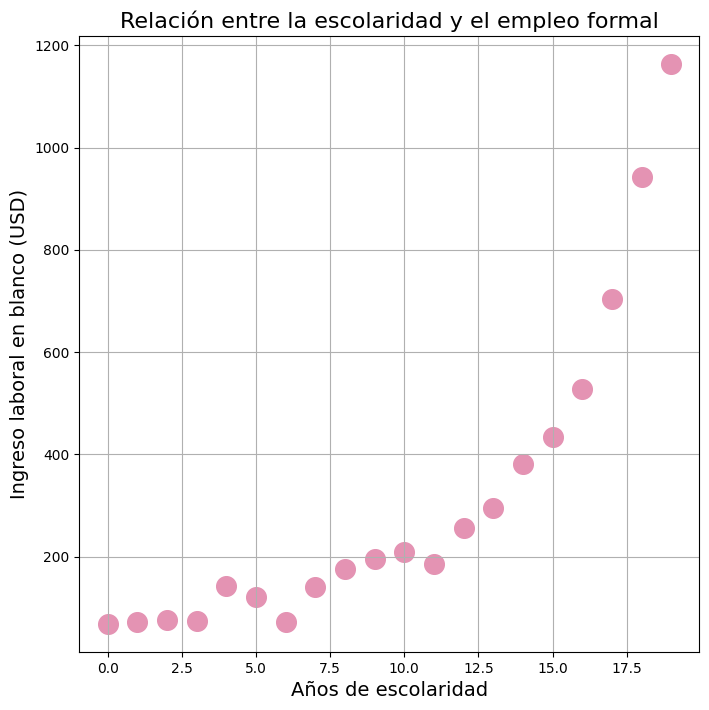

In [124]:
# Relación de la escolaridad y el empleo formal de las personas
# Realizamos un data frame que contenga las medias de ingreso en blanco por año de escolaridad
medias_escolaridad1 = datoslab.groupby(["años_escolaridad"])["ingreso_total_lab_USD"].mean()
medias_escolaridad1
medias_escolaridad1 = medias_escolaridad1.to_frame() #Convertir serie en data frame
medias_escolaridad1 = medias_escolaridad1.reset_index()

# Graficamos la relación entre dos variables
plt.figure(figsize=(8, 8))
plt.scatter('años_escolaridad','ingreso_total_lab_USD', marker='o', data=medias_escolaridad1, s=200, color="#E493B3")  # Crear el gráfico de dispersión
plt.xlabel('Años de escolaridad', size=14)  # Etiqueta del eje x
plt.ylabel('Ingreso laboral en blanco (USD)', size=14)  # Etiqueta del eje y
plt.title('Relación entre la escolaridad y el empleo formal', size=16)  # Título del gráfico
plt.grid(True)  # Mostrar rejilla
plt.show()  # Mostrar el gráfico

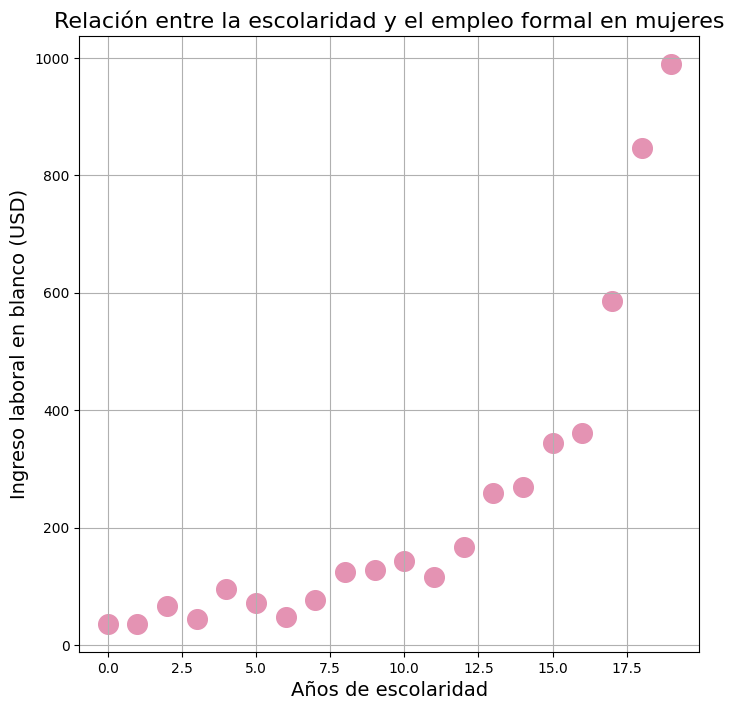

In [125]:
# Relación de la escolaridad y el empleo formal de las personas
# Realizamos un data frame que contenga las medias de ingreso en blanco por año de escolaridad
medias_escolaridad1 = datoslab_fem.groupby(["años_escolaridad"])["ingreso_total_lab_USD"].mean()
medias_escolaridad1
medias_escolaridad1 = medias_escolaridad1.to_frame() #Convertir serie en data frame
medias_escolaridad1 = medias_escolaridad1.reset_index()

# Graficamos la relación entre dos variables
plt.figure(figsize=(8, 8))
plt.scatter('años_escolaridad','ingreso_total_lab_USD', marker='o', data=medias_escolaridad1, s=200, color="#E493B3")  # Crear el gráfico de dispersión
plt.xlabel('Años de escolaridad', size=14)  # Etiqueta del eje x
plt.ylabel('Ingreso laboral en blanco (USD)', size=14)  # Etiqueta del eje y
plt.title('Relación entre la escolaridad y el empleo formal en mujeres', size=16)  # Título del gráfico
plt.grid(True)  # Mostrar rejilla
plt.show()  # Mostrar el gráfico

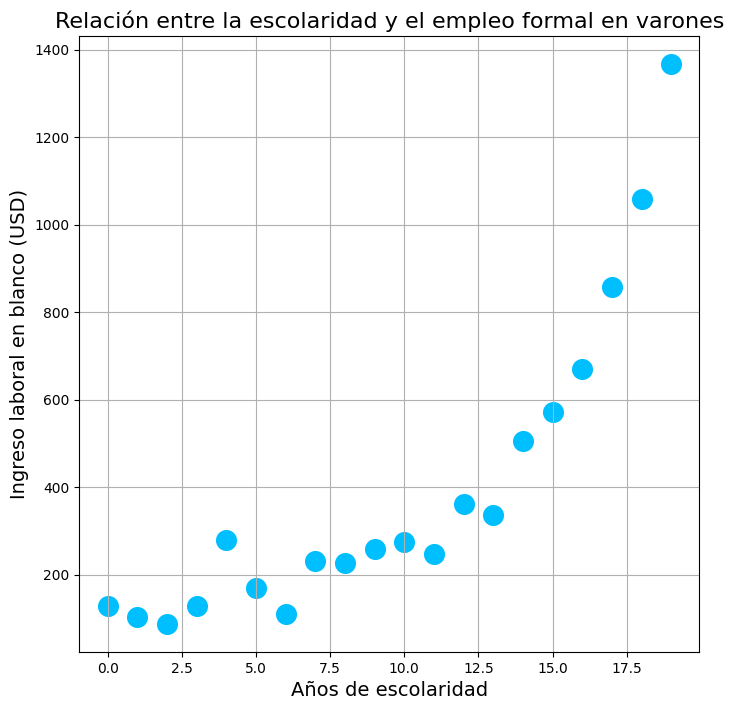

In [126]:
# Relación de la escolaridad y el empleo formal de las personas
# Realizamos un data frame que contenga las medias de ingreso en blanco por año de escolaridad
medias_escolaridad1 = datoslab_masc.groupby(["años_escolaridad"])["ingreso_total_lab_USD"].mean()
medias_escolaridad1
medias_escolaridad1 = medias_escolaridad1.to_frame() #Convertir serie en data frame
medias_escolaridad1 = medias_escolaridad1.reset_index()

# Graficamos la relación entre dos variables
plt.figure(figsize=(8, 8))
plt.scatter('años_escolaridad','ingreso_total_lab_USD', marker='o', data=medias_escolaridad1, s=200, color="#00BFFF")  # Crear el gráfico de dispersión
plt.xlabel('Años de escolaridad', size=14)  # Etiqueta del eje x
plt.ylabel('Ingreso laboral en blanco (USD)', size=14)  # Etiqueta del eje y
plt.title('Relación entre la escolaridad y el empleo formal en varones', size=16)  # Título del gráfico
plt.grid(True)  # Mostrar rejilla
plt.show()  # Mostrar el gráfico

In [127]:
datoslab[["años_escolaridad","ingreso_total_lab_USD"]].corr(method='pearson')

,años_escolaridad,ingreso_total_lab_USD
años_escolaridad,1.000000,0.398626
ingreso_total_lab_USD,0.398626,1.000000


A partir del gráfico y del valor del coeficiente de correlación de Pearson podemos decir que existe una relación positiva entre la escolaridad de las personas y el ingreso en blanco que perciben. La relación parece ser no lineal y exponencial.

## Transformación de variables categóricas

### Sexo

In [128]:
datos["sexo"].unique()

array(['Mujer', 'Varon'], dtype=object)

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
encoder= LabelEncoder()

In [131]:
datos.loc[:,"sexo"]= encoder.fit_transform(datos["sexo"])

In [132]:
datos["sexo"].unique()

array([0, 1], dtype=object)

### parentesco_jefe

In [133]:
datos["parentesco_jefe"].unique()

array(['Jefe', 'Otro no familiar', 'Padre/Madre/Suegro/a',
       'Otro familiar', 'Conyugue o pareja', 'Hijo/a - Hijastro/a',
       'Nieto/a', 'Yerno/nuera', 'Servicio domestico y sus familiares'],
      dtype=object)

In [134]:
encoder= LabelEncoder()

In [135]:
datos.loc[:,"parentesco_jefe"]= encoder.fit_transform(datos["parentesco_jefe"])

In [136]:
datos['parentesco_jefe'].unique()

array([2, 5, 6, 4, 0, 1, 3, 8, 7], dtype=object)